<a href="https://colab.research.google.com/github/Shifath472533/All-Image-captioning-models-and-links-for-data-sets-in-Bangla/blob/master/ResNet_English_and_Bangla_(Machine_Translated)_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Mounting <b>google drive</b></h3>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Setting up <b>dependencies</b></h3>

In [3]:
!pip install --upgrade pip
!pip install pycocotools
!pip install git+https://github.com/salaniz/pycocoevalcap          #this is for pycocoevalcap library to calulate metrics
!pip install git+https://github.com/Maluuba/nlg-eval.git@master    #this is for nlgeval library to calulate metrics
!nlg-eval --setup

     |████████████████████████████████| 1.4MB 3.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
  Cloning https://github.com/salaniz/pycocoevalcap to /tmp/pip-req-build-jrwlynpo
  Running command git clone -q https://github.com/salaniz/pycocoevalcap /tmp/pip-req-build-jrwlynpo
  Created wheel for pycocoevalcap: filename=pycocoevalcap-1.1-py3-none-any.whl size=104310172 sha256=767328f3a943c041dead1594fbce596cf84f4bb88a8ecec7465c10c2880b3273
  Stored in directory: /tmp/pip-ephem-wheel-cache-uylxjdl4/wheels/df/74/69/758b2491ca93bf681a1509671df34df9cf5ff605edf6e112ed
Successfully built pycocoevalcap
  Cloning https://github.com/Maluuba/nlg-eval.git (to revision master) to /tmp/pip-req-build-68ciphbu
  Running command git clone -q https://github.com/Maluuba/nlg-eval.git /tmp/pip-req-build-68ciphbu
     |████████████████████████████████| 449 kB 3.5 MB/s 
  Created wheel for nlg-eval: filename=nlg_eval-2.3-py3-none-any.wh

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Importing <b>Libraries</b></h3>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.applications import vgg16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
from numpy import array
import pickle
import numpy as np
import os
import cv2

Using TensorFlow backend.


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Importing Libraries for <b>pycocoevalcap</b></h3>

In [0]:
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.spice.spice import Spice

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Importing Libraries for <b>nlgeval</b></h3>

In [0]:
from __future__ import unicode_literals
import os
import unittest
import nlgeval
from nlgeval import NLGEval

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Loading **image directory** and counting the <b>No. of images</b></h3>

In [0]:
cap_per_img = {}
defected_cap = {}

In [11]:
cnt_img = 0
#image directory
img_dir = "/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Flickr8k/Flicker8k_Dataset"

for filename in os.listdir(img_dir):
  cap_per_img[filename] = []
  defected_cap[filename] = []
  cnt_img+=1
    
print("Number of images : " , cnt_img)
print("Number of captions should be : " , cnt_img*5)

Number of images :  8091
Number of captions should be :  40455


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Checking If captions are defected and print if it is with Image names</h3>

In [12]:
token_dir = "/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Flickr8k/Flickr8k_english_bangla.token.txt"

cnt_cap = 0

with open (token_dir, "r",encoding="utf-16") as fileHandler:
        for line in fileHandler:
            sentence = line.strip()
            sentences = sentence.split("\t")
            ans = sentences[0]
            ans1 = ans.split("#")
            # print(ans1[0] , " : ",ans1[1])
            if ans1[0] in cap_per_img:
              cap_per_img[ans1[0]].append(ans1[1])
              cnt_cap+=1
            else:
              defected_cap[ans1[0]].append(ans1[1])

if(cnt_img*10 == cnt_cap):
  print("All captions are okay.")
elif(len(defected_cap) > 0):
  print("Defected captions : ")
  for img_nm in defected_cap:
    print("Image Name : ",img_nm,"  Number : ",defected_cap[img_nm])          


All captions are okay.


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Loading the directories of **token.csv** , **train.txt** , **test.txt** and **validation.txt** files and converting them to pandas &nbsp;&nbsp;dataframe</h3>

In [0]:
image_tokens=pd.read_csv("/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Flickr8k/Flickr8k_english_bangla.token.txt", encoding = "utf-16",sep='\t',names=["img_id","img_caption"])
train_image_names=pd.read_csv("/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Flickr8k/Flickr_8k.trainImages.txt",encoding = "utf-16",names=["img_id"])
test_image_names=pd.read_csv("/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Flickr8k/Flickr_8k.testImages.txt",encoding = "utf-16",names=["img_id"])
val_image_names=pd.read_csv("/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Flickr8k/Flickr_8k.devImages.txt",encoding = "utf-16",names=["img_id"])

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Visualizing the <b>image_tokens</b></h3>

In [14]:
image_tokens.head(5)

,img_id,img_caption
0,1000268201_693b08cb0e.jpg#0,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg#0,গোলাপী পোশাকে একটি শিশু প্রবেশের পথে সিঁড়ির এ...
2,1000268201_693b08cb0e.jpg#1,A girl going into a wooden building .
3,1000268201_693b08cb0e.jpg#1,একটি মেয়ে কাঠের ভবনে .ুকছে।
4,1000268201_693b08cb0e.jpg#2,A little girl climbing into a wooden playhouse .


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Visualizing the <b>train image names</b></h3>

In [15]:
train_image_names.head(5)

,img_id
0,2513260012_03d33305cf.jpg
1,2903617548_d3e38d7f88.jpg
2,3338291921_fe7ae0c8f8.jpg
3,488416045_1c6d903fe0.jpg
4,2644326817_8f45080b87.jpg


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Visualizing one of the <b>train images</b></h3>

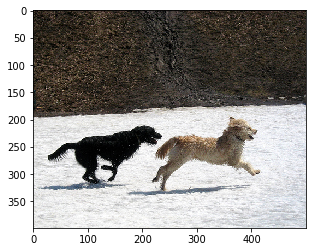

In [16]:
img=cv2.imread(img_dir+ "/" +train_image_names.img_id[0])
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Removing the #0 , #1 #2 , #3 , #4 from the <b>image ids</b></h3>

In [0]:
image_tokens["img_id"]=image_tokens["img_id"].map(lambda x: x[:len(x)-2])

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Visualizing the <b>image_tokens</b> again</h3>

In [18]:
image_tokens.head(5)

,img_id,img_caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,গোলাপী পোশাকে একটি শিশু প্রবেশের পথে সিঁড়ির এ...
2,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
3,1000268201_693b08cb0e.jpg,একটি মেয়ে কাঠের ভবনে .ুকছে।
4,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .


In [0]:
image_tokens["img_caption"]=image_tokens["img_caption"].map(lambda x: str(x))

In [0]:
image_tokens["img_caption"]=image_tokens["img_caption"].map(lambda x: "<start> " + x.strip() + " <end>")

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Visualizing the <b>image_tokens</b> again with <b>`<start>`</b> and <b>`<end>`</b> </h3>

In [21]:
image_tokens.head()

,img_id,img_caption
0,1000268201_693b08cb0e.jpg,<start> A child in a pink dress is climbing up...
1,1000268201_693b08cb0e.jpg,<start> গোলাপী পোশাকে একটি শিশু প্রবেশের পথে স...
2,1000268201_693b08cb0e.jpg,<start> A girl going into a wooden building . ...
3,1000268201_693b08cb0e.jpg,<start> একটি মেয়ে কাঠের ভবনে .ুকছে। <end>
4,1000268201_693b08cb0e.jpg,<start> A little girl climbing into a wooden p...


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Creating **train dictionary** having key as the image id and value as a list of its captions</h3>

In [22]:
train_captions={}
for i in tqdm(range(len(train_image_names))):
  l=[caption for caption in(image_tokens[image_tokens["img_id"]==train_image_names["img_id"].iloc[i]].img_caption)]
  train_captions[train_image_names["img_id"].iloc[i]]=l

100%|██████████| 6000/6000 [00:32<00:00, 182.54it/s]


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Creating **test dictionary** having key as the image id and value as a list of its captions</h3>

In [23]:
test_captions={}
for i in tqdm(range(len(test_image_names))):
  l=[caption for caption in(image_tokens[image_tokens["img_id"]==test_image_names["img_id"].iloc[i]].img_caption)]
  test_captions[test_image_names["img_id"].iloc[i]]=l

100%|██████████| 1000/1000 [00:05<00:00, 181.52it/s]


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Creating **validation dictionary** having key as the image id and value as a list of its captions</h3>

In [24]:
validation_captions={}
for i in tqdm(range(len(val_image_names))):
  l=[caption for caption in(image_tokens[image_tokens["img_id"]==val_image_names["img_id"].iloc[i]].img_caption)]
  validation_captions[val_image_names["img_id"].iloc[i]]=l

100%|██████████| 1000/1000 [00:05<00:00, 181.09it/s]


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Importing the **ResNet50** model and printing the <b>summary</b></h3>

In [25]:
model=ResNet50(include_top=False, weights='imagenet',pooling='avg',input_shape=(224,224,3))
model.summary()













94658560/94653016 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
______________

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining the path to save the <b>pickle file</b></h3>

In [0]:
pickle_path = "/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Flickr8k/"

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Extracting image encodings(features) from **ResNet50** and forming dict **train_features** and encoding as a <b>pkl</b> &nbsp;&nbsp;file</h3>

In [0]:
path=img_dir+"/"
train_features={}
c=0
for image_name in tqdm(train_captions):
  img_path=path+image_name
  img=image.load_img(img_path,target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x)
  train_features[image_name]=features.squeeze()

In [0]:
print("After Extracting Features length of train_features : ")
print(len(train_features))

In [0]:
with open( pickle_path+"encoded_train_images_bangla_english.pkl", "wb" ) as pickle_f:
    pickle.dump(train_features, pickle_f )

In [0]:
train_features = {}
pickle_in = open(pickle_path + "encoded_train_images_bangla_english.pkl","rb")
train_features = pickle.load(pickle_in)

In [28]:
print("After Extracting from pkl file length of train_features : ")
print(len(train_features))

After Extracting from pkl file length of train_features : 
6000


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Extracting image encodings(features) from **ResNet50** and forming dict <b>test_features</b> and encoding as a <b>pkl</b> &nbsp;&nbsp;file</h3>

In [0]:
path=img_dir+"/"
test_features={}
c=0
for image_name in tqdm(test_captions):
  img_path=path+image_name
  img=image.load_img(img_path,target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x)
  test_features[image_name]=features.squeeze()

In [0]:
with open( pickle_path+"encoded_test_images_bangla_english.pkl", "wb" ) as pickle_f1:
    pickle.dump(test_features, pickle_f1 )

In [0]:
test_features = {}
pickle_in = open(pickle_path + "encoded_test_images_bangla_english.pkl","rb")
test_features = pickle.load(pickle_in)

In [30]:
print("After Extracting from pkl file length of test_features : ")
print(len(test_features))

After Extracting from pkl file length of test_features : 
1000


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Extracting image encodings(features) from **ResNet50** and forming dict <b>validation_features</b> and encoding as a <b>&nbsp;&nbsp;pkl</b> file</h3>

In [0]:
path=img_dir+"/"
validation_features={}
c=0
for image_name in tqdm(validation_captions):
  img_path=path+image_name
  img=image.load_img(img_path,target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x)
  validation_features[image_name]=features.squeeze()

In [0]:
with open( pickle_path+"encoded_validation_images_bangla_english.pkl", "wb" ) as pickle_f2:
    pickle.dump(validation_features, pickle_f2 )

In [0]:
validation_features = {}
pickle_in = open(pickle_path + "encoded_validation_images_bangla_english.pkl","rb")
validation_features = pickle.load(pickle_in)

In [32]:
print("After Extracting from pkl file length of validation_features : ")
print(len(validation_features))

After Extracting from pkl file length of validation_features : 
1000


In [33]:
print(train_captions)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
all_captions=[]
for img_id in tqdm(train_captions):
  for captions in train_captions[img_id]:
    all_captions.append(str(captions))

all_words=" ".join(all_captions)
print()
print(len(all_words))
unique_words=list(set(all_words.strip().split(" ")))
print(len(unique_words))

100%|██████████| 6000/6000 [00:00<00:00, 213858.71it/s]


4162902
21934


In [35]:
x = all_captions[14381]
print(x)

<start> সাইকেলে চড়ে একজন লোক পাহাড়ে চড়ে। <end>


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining **max_length** and **vocabulary size**</h3>

In [0]:
vocab_size=len(unique_words)+1
max_length=40

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Forming dictionaries containg mapping of **words to indices** and <b>indices to words</b></h3>

In [0]:
words_to_indices={val:index+1 for index, val in enumerate(unique_words)}
indices_to_words = { index+1:val for index, val in enumerate(unique_words)}
words_to_indices["Unk"]=0
indices_to_words[0]="Unk"

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Forming dictionary having <b>encoded captions</b></h3>

In [38]:
train_encoded_captions={}
for img_id in tqdm(train_captions):
  train_encoded_captions[img_id]=[]
  for i in range(5):
    print(img_id)
    train_encoded_captions[img_id].append([words_to_indices[s] for s in train_captions[img_id][i].split(" ")])

  0%|          | 0/6000 [00:00<?, ?it/s]

2513260012_03d33305cf.jpg
2513260012_03d33305cf.jpg
2513260012_03d33305cf.jpg
2513260012_03d33305cf.jpg
2513260012_03d33305cf.jpg
2903617548_d3e38d7f88.jpg
2903617548_d3e38d7f88.jpg
2903617548_d3e38d7f88.jpg
2903617548_d3e38d7f88.jpg
2903617548_d3e38d7f88.jpg
3338291921_fe7ae0c8f8.jpg
3338291921_fe7ae0c8f8.jpg
3338291921_fe7ae0c8f8.jpg
3338291921_fe7ae0c8f8.jpg
3338291921_fe7ae0c8f8.jpg
488416045_1c6d903fe0.jpg
488416045_1c6d903fe0.jpg
488416045_1c6d903fe0.jpg
488416045_1c6d903fe0.jpg
488416045_1c6d903fe0.jpg
2644326817_8f45080b87.jpg
2644326817_8f45080b87.jpg
2644326817_8f45080b87.jpg
2644326817_8f45080b87.jpg
2644326817_8f45080b87.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
2501968935_02f2cd8079.jpg
2501968935_02f2cd8079.jpg
2501968935_02f2cd8079.jpg
2501968935_02f2cd8079.jpg
2501968935_02f2cd8079.jpg
2699342860_5288e203ea.jpg
2699342860_5288e203ea.jpg
2699342860_5288e203ea.jpg
2699342860_5288e203ea.

  3%|▎         | 195/6000 [00:00<00:03, 1932.85it/s]


2876994989_a4ebbd8491.jpg
2876994989_a4ebbd8491.jpg
2876994989_a4ebbd8491.jpg
2876994989_a4ebbd8491.jpg
2339516180_12493e8ecf.jpg
2339516180_12493e8ecf.jpg
2339516180_12493e8ecf.jpg
2339516180_12493e8ecf.jpg
2339516180_12493e8ecf.jpg
3301438465_10121a2412.jpg
3301438465_10121a2412.jpg
3301438465_10121a2412.jpg
3301438465_10121a2412.jpg
3301438465_10121a2412.jpg
101669240_b2d3e7f17b.jpg
101669240_b2d3e7f17b.jpg
101669240_b2d3e7f17b.jpg
101669240_b2d3e7f17b.jpg
101669240_b2d3e7f17b.jpg
300500054_56653bf217.jpg
300500054_56653bf217.jpg
300500054_56653bf217.jpg
300500054_56653bf217.jpg
300500054_56653bf217.jpg
1956678973_223cb1b847.jpg
1956678973_223cb1b847.jpg
1956678973_223cb1b847.jpg
1956678973_223cb1b847.jpg
1956678973_223cb1b847.jpg
1213336750_2269b51397.jpg
1213336750_2269b51397.jpg
1213336750_2269b51397.jpg
1213336750_2269b51397.jpg
1213336750_2269b51397.jpg
478750151_e0adb5030a.jpg
478750151_e0adb5030a.jpg
478750151_e0adb5030a.jpg
478750151_e0adb5030a.jpg
478750151_e0adb5030a.jpg


  6%|▋         | 387/6000 [00:00<00:02, 1928.02it/s]


2925737498_57585a7ed9.jpg
2925737498_57585a7ed9.jpg
2925737498_57585a7ed9.jpg
2925737498_57585a7ed9.jpg
2925737498_57585a7ed9.jpg
2784625888_71a421e171.jpg
2784625888_71a421e171.jpg
2784625888_71a421e171.jpg
2784625888_71a421e171.jpg
2784625888_71a421e171.jpg
3159424456_f316bdc1d5.jpg
3159424456_f316bdc1d5.jpg
3159424456_f316bdc1d5.jpg
3159424456_f316bdc1d5.jpg
3159424456_f316bdc1d5.jpg
2707835735_6537b27e8f.jpg
2707835735_6537b27e8f.jpg
2707835735_6537b27e8f.jpg
2707835735_6537b27e8f.jpg
2707835735_6537b27e8f.jpg
236518934_c62a133077.jpg
236518934_c62a133077.jpg
236518934_c62a133077.jpg
236518934_c62a133077.jpg
236518934_c62a133077.jpg
1463638541_c02cfa04dc.jpg
1463638541_c02cfa04dc.jpg
1463638541_c02cfa04dc.jpg
1463638541_c02cfa04dc.jpg
1463638541_c02cfa04dc.jpg
2635938723_11b85e6763.jpg
2635938723_11b85e6763.jpg
2635938723_11b85e6763.jpg
2635938723_11b85e6763.jpg
2635938723_11b85e6763.jpg
421808539_57abee6d55.jpg
421808539_57abee6d55.jpg
421808539_57abee6d55.jpg
421808539_57abee6d5

 10%|▉         | 578/6000 [00:00<00:02, 1914.50it/s]

242558556_12f4d1cabc.jpg
242558556_12f4d1cabc.jpg
242558556_12f4d1cabc.jpg
2376878930_dd3e7cc544.jpg
2376878930_dd3e7cc544.jpg
2376878930_dd3e7cc544.jpg
2376878930_dd3e7cc544.jpg
2376878930_dd3e7cc544.jpg
124195430_d14028660f.jpg
124195430_d14028660f.jpg
124195430_d14028660f.jpg
124195430_d14028660f.jpg
124195430_d14028660f.jpg
3603870481_1ebc696d91.jpg
3603870481_1ebc696d91.jpg
3603870481_1ebc696d91.jpg
3603870481_1ebc696d91.jpg
3603870481_1ebc696d91.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1771490732_0ab5f029ac.jpg
1732217138_aa0199ef87.jpg
1732217138_aa0199ef87.jpg
1732217138_aa0199ef87.jpg
1732217138_aa0199ef87.jpg
1732217138_aa0199ef87.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
1576185717_f841ddc3da.jpg
2250555512_71670078f5.jpg
2250555512_71670078f5.jpg
2250555512_71670078f5.jpg
2250555512_71670078f5.jpg
2250555512_71670078f5.jpg
2442243868_abe8f74fb

 13%|█▎        | 763/6000 [00:00<00:02, 1889.12it/s]


374103966_2987706be1.jpg
374103966_2987706be1.jpg
374103966_2987706be1.jpg
374103966_2987706be1.jpg
374103966_2987706be1.jpg
150582765_bad8dec237.jpg
150582765_bad8dec237.jpg
150582765_bad8dec237.jpg
150582765_bad8dec237.jpg
150582765_bad8dec237.jpg
2686432878_0697dbc048.jpg
2686432878_0697dbc048.jpg
2686432878_0697dbc048.jpg
2686432878_0697dbc048.jpg
2686432878_0697dbc048.jpg
2685139184_4ff45e0f76.jpg
2685139184_4ff45e0f76.jpg
2685139184_4ff45e0f76.jpg
2685139184_4ff45e0f76.jpg
2685139184_4ff45e0f76.jpg
359173181_a75c950aeb.jpg
359173181_a75c950aeb.jpg
359173181_a75c950aeb.jpg
359173181_a75c950aeb.jpg
359173181_a75c950aeb.jpg
241109594_3cb90fe2a3.jpg
241109594_3cb90fe2a3.jpg
241109594_3cb90fe2a3.jpg
241109594_3cb90fe2a3.jpg
241109594_3cb90fe2a3.jpg
3673035152_da7ed916d9.jpg
3673035152_da7ed916d9.jpg
3673035152_da7ed916d9.jpg
3673035152_da7ed916d9.jpg
3673035152_da7ed916d9.jpg
3558796959_fc4450be56.jpg
3558796959_fc4450be56.jpg
3558796959_fc4450be56.jpg
3558796959_fc4450be56.jpg
35587

 16%|█▌        | 961/6000 [00:00<00:02, 1906.60it/s]

1354318519_2f9baed754.jpg
1354318519_2f9baed754.jpg
1354318519_2f9baed754.jpg
1354318519_2f9baed754.jpg
2305437797_e6c3460190.jpg
2305437797_e6c3460190.jpg
2305437797_e6c3460190.jpg
2305437797_e6c3460190.jpg
2305437797_e6c3460190.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2275372714_017c269742.jpg
2717686269_80c4b5ac9e.jpg
2717686269_80c4b5ac9e.jpg
2717686269_80c4b5ac9e.jpg
2717686269_80c4b5ac9e.jpg
2717686269_80c4b5ac9e.jpg
2635908229_b9fc90d3fb.jpg
2635908229_b9fc90d3fb.jpg
2635908229_b9fc90d3fb.jpg
2635908229_b9fc90d3fb.jpg
2635908229_b9fc90d3fb.jpg
3516653997_98ec551a67.jpg
3516653997_98ec551a67.jpg
3516653997_98ec551a67.jpg
3516653997_98ec551a67.jpg
3516653997_98ec551a67.jpg
3217909454_7baa0edbb2.jpg
3217909454_7baa0edbb2.jpg
3217909454_7baa0edbb2.jpg
3217909454_7baa0edbb2.jpg
3217909454_7baa0edbb2.jpg
783994497_4f6885454d.jpg
783994497_4f6885454d.jpg
783994497_4f6885454d.jpg
783994497_4f6885454d.jpg
783994497_4f6885

 19%|█▉        | 1157/6000 [00:00<00:02, 1921.46it/s]

3406802138_ef77bbddd0.jpg
3406802138_ef77bbddd0.jpg
3556485995_9cd40269e9.jpg
3556485995_9cd40269e9.jpg
3556485995_9cd40269e9.jpg
3556485995_9cd40269e9.jpg
3556485995_9cd40269e9.jpg
3326454455_960e5442e9.jpg
3326454455_960e5442e9.jpg
3326454455_960e5442e9.jpg
3326454455_960e5442e9.jpg
3326454455_960e5442e9.jpg
162152393_52ecd33fc5.jpg
162152393_52ecd33fc5.jpg
162152393_52ecd33fc5.jpg
162152393_52ecd33fc5.jpg
162152393_52ecd33fc5.jpg
3424927725_c4d1fcfac3.jpg
3424927725_c4d1fcfac3.jpg
3424927725_c4d1fcfac3.jpg
3424927725_c4d1fcfac3.jpg
3424927725_c4d1fcfac3.jpg
3690107455_0fdb4ecee7.jpg
3690107455_0fdb4ecee7.jpg
3690107455_0fdb4ecee7.jpg
3690107455_0fdb4ecee7.jpg
3690107455_0fdb4ecee7.jpg
3487820317_3728e7569e.jpg
3487820317_3728e7569e.jpg
3487820317_3728e7569e.jpg
3487820317_3728e7569e.jpg
3487820317_3728e7569e.jpg
3485486737_953f9d3be2.jpg
3485486737_953f9d3be2.jpg
3485486737_953f9d3be2.jpg
3485486737_953f9d3be2.jpg
3485486737_953f9d3be2.jpg
2064780645_8f28a1529f.jpg
2064780645_8f28a1

 23%|██▎       | 1354/6000 [00:00<00:02, 1926.02it/s]


3244586044_205d5ae2ba.jpg
3244586044_205d5ae2ba.jpg
3027365101_3818be6e16.jpg
3027365101_3818be6e16.jpg
3027365101_3818be6e16.jpg
3027365101_3818be6e16.jpg
3027365101_3818be6e16.jpg
2247138288_7355861203.jpg
2247138288_7355861203.jpg
2247138288_7355861203.jpg
2247138288_7355861203.jpg
2247138288_7355861203.jpg
2205336881_d9ee4179d3.jpg
2205336881_d9ee4179d3.jpg
2205336881_d9ee4179d3.jpg
2205336881_d9ee4179d3.jpg
2205336881_d9ee4179d3.jpg
3640104986_5d8c9a9948.jpg
3640104986_5d8c9a9948.jpg
3640104986_5d8c9a9948.jpg
3640104986_5d8c9a9948.jpg
3640104986_5d8c9a9948.jpg
3493479159_609ebe1b35.jpg
3493479159_609ebe1b35.jpg
3493479159_609ebe1b35.jpg
3493479159_609ebe1b35.jpg
3493479159_609ebe1b35.jpg
3671262694_29fbeb9d95.jpg
3671262694_29fbeb9d95.jpg
3671262694_29fbeb9d95.jpg
3671262694_29fbeb9d95.jpg
3671262694_29fbeb9d95.jpg
2426215757_e008a91fcb.jpg
2426215757_e008a91fcb.jpg
2426215757_e008a91fcb.jpg
2426215757_e008a91fcb.jpg
2426215757_e008a91fcb.jpg
3638992163_a085cc0c24.jpg
3638992163_

 26%|██▌       | 1551/6000 [00:00<00:02, 1929.19it/s]

2759211664_d21393b668.jpg
2759211664_d21393b668.jpg
2759211664_d21393b668.jpg
2759211664_d21393b668.jpg
2759211664_d21393b668.jpg
3398745929_8cd3bbb8a8.jpg
3398745929_8cd3bbb8a8.jpg
3398745929_8cd3bbb8a8.jpg
3398745929_8cd3bbb8a8.jpg
3398745929_8cd3bbb8a8.jpg
2863180332_372510aa49.jpg
2863180332_372510aa49.jpg
2863180332_372510aa49.jpg
2863180332_372510aa49.jpg
2863180332_372510aa49.jpg
2873070704_2141a7a86a.jpg
2873070704_2141a7a86a.jpg
2873070704_2141a7a86a.jpg
2873070704_2141a7a86a.jpg
2873070704_2141a7a86a.jpg
1358892595_7a37c45788.jpg
1358892595_7a37c45788.jpg
1358892595_7a37c45788.jpg
1358892595_7a37c45788.jpg
1358892595_7a37c45788.jpg
1176580356_9810d877bf.jpg
1176580356_9810d877bf.jpg
1176580356_9810d877bf.jpg
1176580356_9810d877bf.jpg
1176580356_9810d877bf.jpg
476760133_c33d2bd83d.jpg
476760133_c33d2bd83d.jpg
476760133_c33d2bd83d.jpg
476760133_c33d2bd83d.jpg
476760133_c33d2bd83d.jpg
42637987_866635edf6.jpg
42637987_866635edf6.jpg
42637987_866635edf6.jpg
42637987_866635edf6.jpg

 29%|██▉       | 1749/6000 [00:00<00:02, 1943.97it/s]


2939007933_8a6ef2d073.jpg
2939007933_8a6ef2d073.jpg
2939007933_8a6ef2d073.jpg
3215315009_47577bf8f7.jpg
3215315009_47577bf8f7.jpg
3215315009_47577bf8f7.jpg
3215315009_47577bf8f7.jpg
3215315009_47577bf8f7.jpg
3009383694_e045c6169e.jpg
3009383694_e045c6169e.jpg
3009383694_e045c6169e.jpg
3009383694_e045c6169e.jpg
3009383694_e045c6169e.jpg
256444892_efcb3bd824.jpg
256444892_efcb3bd824.jpg
256444892_efcb3bd824.jpg
256444892_efcb3bd824.jpg
256444892_efcb3bd824.jpg
3066429707_842e50b8f7.jpg
3066429707_842e50b8f7.jpg
3066429707_842e50b8f7.jpg
3066429707_842e50b8f7.jpg
3066429707_842e50b8f7.jpg
3245504245_27931f5ec1.jpg
3245504245_27931f5ec1.jpg
3245504245_27931f5ec1.jpg
3245504245_27931f5ec1.jpg
3245504245_27931f5ec1.jpg
3611672054_45edd3e08f.jpg
3611672054_45edd3e08f.jpg
3611672054_45edd3e08f.jpg
3611672054_45edd3e08f.jpg
3611672054_45edd3e08f.jpg
3625957413_e475943aa3.jpg
3625957413_e475943aa3.jpg
3625957413_e475943aa3.jpg
3625957413_e475943aa3.jpg
3625957413_e475943aa3.jpg
3282434895_1c1ef

 32%|███▏      | 1948/6000 [00:01<00:02, 1957.43it/s]

3415228562_4efa9c9b70.jpg
3415228562_4efa9c9b70.jpg
3289433994_4c67aab384.jpg
3289433994_4c67aab384.jpg
3289433994_4c67aab384.jpg
3289433994_4c67aab384.jpg
3289433994_4c67aab384.jpg
2392460773_2aa01eb340.jpg
2392460773_2aa01eb340.jpg
2392460773_2aa01eb340.jpg
2392460773_2aa01eb340.jpg
2392460773_2aa01eb340.jpg
1418503947_953d373632.jpg
1418503947_953d373632.jpg
1418503947_953d373632.jpg
1418503947_953d373632.jpg
1418503947_953d373632.jpg
2407091303_931c918490.jpg
2407091303_931c918490.jpg
2407091303_931c918490.jpg
2407091303_931c918490.jpg
2407091303_931c918490.jpg
2994107810_af56326389.jpg
2994107810_af56326389.jpg
2994107810_af56326389.jpg
2994107810_af56326389.jpg
2994107810_af56326389.jpg
3342855466_44038a8aa3.jpg
3342855466_44038a8aa3.jpg
3342855466_44038a8aa3.jpg
3342855466_44038a8aa3.jpg
3342855466_44038a8aa3.jpg
143680442_2f03f76944.jpg
143680442_2f03f76944.jpg
143680442_2f03f76944.jpg
143680442_2f03f76944.jpg
143680442_2f03f76944.jpg
330325191_63e11d9c93.jpg
330325191_63e11d9c

 36%|███▌      | 2144/6000 [00:01<00:01, 1958.11it/s]

2873188959_ff023defa9.jpg
2873188959_ff023defa9.jpg
2873188959_ff023defa9.jpg
2873188959_ff023defa9.jpg
2471493912_2d4746b834.jpg
2471493912_2d4746b834.jpg
2471493912_2d4746b834.jpg
2471493912_2d4746b834.jpg
2471493912_2d4746b834.jpg
2065309381_705b774f51.jpg
2065309381_705b774f51.jpg
2065309381_705b774f51.jpg
2065309381_705b774f51.jpg
2065309381_705b774f51.jpg
3400082864_9c737c1450.jpg
3400082864_9c737c1450.jpg
3400082864_9c737c1450.jpg
3400082864_9c737c1450.jpg
3400082864_9c737c1450.jpg
3517466790_17c7753a1a.jpg
3517466790_17c7753a1a.jpg
3517466790_17c7753a1a.jpg
3517466790_17c7753a1a.jpg
3517466790_17c7753a1a.jpg
2367317953_503317493e.jpg
2367317953_503317493e.jpg
2367317953_503317493e.jpg
2367317953_503317493e.jpg
2367317953_503317493e.jpg
3145869775_85dfae43bd.jpg
3145869775_85dfae43bd.jpg
3145869775_85dfae43bd.jpg
3145869775_85dfae43bd.jpg
3145869775_85dfae43bd.jpg
1562478713_505ab6d924.jpg
1562478713_505ab6d924.jpg
1562478713_505ab6d924.jpg
1562478713_505ab6d924.jpg
1562478713_5

 39%|███▉      | 2341/6000 [00:01<00:01, 1956.31it/s]

3421177332_a05741cfa4.jpg
3421177332_a05741cfa4.jpg
3421177332_a05741cfa4.jpg
3421177332_a05741cfa4.jpg
3421177332_a05741cfa4.jpg
2416964653_db3c2b6a0e.jpg
2416964653_db3c2b6a0e.jpg
2416964653_db3c2b6a0e.jpg
2416964653_db3c2b6a0e.jpg
2416964653_db3c2b6a0e.jpg
3051754615_3d6494c2ae.jpg
3051754615_3d6494c2ae.jpg
3051754615_3d6494c2ae.jpg
3051754615_3d6494c2ae.jpg
3051754615_3d6494c2ae.jpg
3627216820_4952bacbcb.jpg
3627216820_4952bacbcb.jpg
3627216820_4952bacbcb.jpg
3627216820_4952bacbcb.jpg
3627216820_4952bacbcb.jpg
3268908792_c24529fe88.jpg
3268908792_c24529fe88.jpg
3268908792_c24529fe88.jpg
3268908792_c24529fe88.jpg
3268908792_c24529fe88.jpg
95734036_bef6d1a871.jpg
95734036_bef6d1a871.jpg
95734036_bef6d1a871.jpg
95734036_bef6d1a871.jpg
95734036_bef6d1a871.jpg
3330654550_3efe9a71af.jpg
3330654550_3efe9a71af.jpg
3330654550_3efe9a71af.jpg
3330654550_3efe9a71af.jpg
3330654550_3efe9a71af.jpg
2423856014_8df0e7f656.jpg
2423856014_8df0e7f656.jpg
2423856014_8df0e7f656.jpg
2423856014_8df0e7f656.

 42%|████▏     | 2538/6000 [00:01<00:01, 1949.44it/s]


3170551725_1276644eab.jpg
3170551725_1276644eab.jpg
3170551725_1276644eab.jpg
3170551725_1276644eab.jpg
3170551725_1276644eab.jpg
3331797838_b3e33dbe17.jpg
3331797838_b3e33dbe17.jpg
3331797838_b3e33dbe17.jpg
3331797838_b3e33dbe17.jpg
3331797838_b3e33dbe17.jpg
3255737244_1f8948fc07.jpg
3255737244_1f8948fc07.jpg
3255737244_1f8948fc07.jpg
3255737244_1f8948fc07.jpg
3255737244_1f8948fc07.jpg
2502856739_490db7a657.jpg
2502856739_490db7a657.jpg
2502856739_490db7a657.jpg
2502856739_490db7a657.jpg
2502856739_490db7a657.jpg
3413973568_6630e5cdac.jpg
3413973568_6630e5cdac.jpg
3413973568_6630e5cdac.jpg
3413973568_6630e5cdac.jpg
3413973568_6630e5cdac.jpg
3106883334_419f3fb16f.jpg
3106883334_419f3fb16f.jpg
3106883334_419f3fb16f.jpg
3106883334_419f3fb16f.jpg
3106883334_419f3fb16f.jpg
2780031669_a0345cfc26.jpg
2780031669_a0345cfc26.jpg
2780031669_a0345cfc26.jpg
2780031669_a0345cfc26.jpg
2780031669_a0345cfc26.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_c7956accd5.jpg
1206506157_

 49%|████▉     | 2929/6000 [00:01<00:02, 1401.11it/s]


3478176372_7c510a0cef.jpg
3478176372_7c510a0cef.jpg
3708748633_e7e3cf4e84.jpg
3708748633_e7e3cf4e84.jpg
3708748633_e7e3cf4e84.jpg
3708748633_e7e3cf4e84.jpg
3708748633_e7e3cf4e84.jpg
766346887_a9a9d0637a.jpg
766346887_a9a9d0637a.jpg
766346887_a9a9d0637a.jpg
766346887_a9a9d0637a.jpg
766346887_a9a9d0637a.jpg
2681215810_00b0642f7b.jpg
2681215810_00b0642f7b.jpg
2681215810_00b0642f7b.jpg
2681215810_00b0642f7b.jpg
2681215810_00b0642f7b.jpg
2218743570_9d6614c51c.jpg
2218743570_9d6614c51c.jpg
2218743570_9d6614c51c.jpg
2218743570_9d6614c51c.jpg
2218743570_9d6614c51c.jpg
2607130765_97833d6ce1.jpg
2607130765_97833d6ce1.jpg
2607130765_97833d6ce1.jpg
2607130765_97833d6ce1.jpg
2607130765_97833d6ce1.jpg
872512911_ca383b40e4.jpg
872512911_ca383b40e4.jpg
872512911_ca383b40e4.jpg
872512911_ca383b40e4.jpg
872512911_ca383b40e4.jpg
3671935691_57bdd0e778.jpg
3671935691_57bdd0e778.jpg
3671935691_57bdd0e778.jpg
3671935691_57bdd0e778.jpg
3671935691_57bdd0e778.jpg
3098714492_19939e3b19.jpg
3098714492_19939e3b19

 55%|█████▌    | 3321/6000 [00:01<00:01, 1633.22it/s]

347186933_880caaf53b.jpg
347186933_880caaf53b.jpg
241345522_c3c266a02a.jpg
241345522_c3c266a02a.jpg
241345522_c3c266a02a.jpg
241345522_c3c266a02a.jpg
241345522_c3c266a02a.jpg
2405599120_ec5f32af6f.jpg
2405599120_ec5f32af6f.jpg
2405599120_ec5f32af6f.jpg
2405599120_ec5f32af6f.jpg
2405599120_ec5f32af6f.jpg
2775744946_1ab5d500a2.jpg
2775744946_1ab5d500a2.jpg
2775744946_1ab5d500a2.jpg
2775744946_1ab5d500a2.jpg
2775744946_1ab5d500a2.jpg
1003163366_44323f5815.jpg
1003163366_44323f5815.jpg
1003163366_44323f5815.jpg
1003163366_44323f5815.jpg
1003163366_44323f5815.jpg
3626998066_3ae11ee278.jpg
3626998066_3ae11ee278.jpg
3626998066_3ae11ee278.jpg
3626998066_3ae11ee278.jpg
3626998066_3ae11ee278.jpg
742073622_1206be8f7f.jpg
742073622_1206be8f7f.jpg
742073622_1206be8f7f.jpg
742073622_1206be8f7f.jpg
742073622_1206be8f7f.jpg
2754898893_95239c1f19.jpg
2754898893_95239c1f19.jpg
2754898893_95239c1f19.jpg
2754898893_95239c1f19.jpg
2754898893_95239c1f19.jpg
2255685792_f70474c6db.jpg
2255685792_f70474c6db.jp

 62%|██████▏   | 3703/6000 [00:02<00:01, 1758.12it/s]

1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
1989145280_3b54452188.jpg
2564663851_3a9832e4fc.jpg
2564663851_3a9832e4fc.jpg
2564663851_3a9832e4fc.jpg
2564663851_3a9832e4fc.jpg
2564663851_3a9832e4fc.jpg
2682194299_92005b26c6.jpg
2682194299_92005b26c6.jpg
2682194299_92005b26c6.jpg
2682194299_92005b26c6.jpg
2682194299_92005b26c6.jpg
3052104757_d1cf646935.jpg
3052104757_d1cf646935.jpg
3052104757_d1cf646935.jpg
3052104757_d1cf646935.jpg
3052104757_d1cf646935.jpg
3640417354_b0b3e4aec9.jpg
3640417354_b0b3e4aec9.jpg
3640417354_b0b3e4aec9.jpg
3640417354_b0b3e4aec9.jpg
3640417354_b0b3e4aec9.jpg
95728664_06c43b90f1.jpg
95728664_06c43b90f1.jpg
95728664_06c43b90f1.jpg
95728664_06c43b90f1.jpg
95728664_06c43b90f1.jpg
56494233_1824005879.jpg
56494233_1824005879.jpg
56494233_1824005879.jpg
56494233_1824005879.jpg
56494233_1824005879.jpg
3316046339_8e504be038.jpg
3316046339_8e504be038.jpg
3316046339_8e504be038.jpg
3316046339_8e504be038.jpg
3316046339_8e504be038.jpg
241347

 68%|██████▊   | 4101/6000 [00:02<00:01, 1868.53it/s]

3726730085_2468ee9220.jpg
3726730085_2468ee9220.jpg
3726730085_2468ee9220.jpg
3383491811_fd9d3a891d.jpg
3383491811_fd9d3a891d.jpg
3383491811_fd9d3a891d.jpg
3383491811_fd9d3a891d.jpg
3383491811_fd9d3a891d.jpg
1117972841_2b9261f95f.jpg
1117972841_2b9261f95f.jpg
1117972841_2b9261f95f.jpg
1117972841_2b9261f95f.jpg
1117972841_2b9261f95f.jpg
2831846986_5534425cfa.jpg
2831846986_5534425cfa.jpg
2831846986_5534425cfa.jpg
2831846986_5534425cfa.jpg
2831846986_5534425cfa.jpg
2899594400_61b4f6c114.jpg
2899594400_61b4f6c114.jpg
2899594400_61b4f6c114.jpg
2899594400_61b4f6c114.jpg
2899594400_61b4f6c114.jpg
3335547029_74d620fa6c.jpg
3335547029_74d620fa6c.jpg
3335547029_74d620fa6c.jpg
3335547029_74d620fa6c.jpg
3335547029_74d620fa6c.jpg
2423550887_ffc9bbcf71.jpg
2423550887_ffc9bbcf71.jpg
2423550887_ffc9bbcf71.jpg
2423550887_ffc9bbcf71.jpg
2423550887_ffc9bbcf71.jpg
3374054694_fa56f29267.jpg
3374054694_fa56f29267.jpg
3374054694_fa56f29267.jpg
3374054694_fa56f29267.jpg
3374054694_fa56f29267.jpg
3243233886_2

 75%|███████▍  | 4492/6000 [00:02<00:00, 1900.91it/s]


396179143_e1511336e1.jpg
396179143_e1511336e1.jpg
396179143_e1511336e1.jpg
396179143_e1511336e1.jpg
749840385_e004bf3b7c.jpg
749840385_e004bf3b7c.jpg
749840385_e004bf3b7c.jpg
749840385_e004bf3b7c.jpg
749840385_e004bf3b7c.jpg
3605100550_01214a1224.jpg
3605100550_01214a1224.jpg
3605100550_01214a1224.jpg
3605100550_01214a1224.jpg
3605100550_01214a1224.jpg
441921713_1cafc7d7d2.jpg
441921713_1cafc7d7d2.jpg
441921713_1cafc7d7d2.jpg
441921713_1cafc7d7d2.jpg
441921713_1cafc7d7d2.jpg
461019788_bc0993dabd.jpg
461019788_bc0993dabd.jpg
461019788_bc0993dabd.jpg
461019788_bc0993dabd.jpg
461019788_bc0993dabd.jpg
393810324_1c33760a95.jpg
393810324_1c33760a95.jpg
393810324_1c33760a95.jpg
393810324_1c33760a95.jpg
393810324_1c33760a95.jpg
3427402225_234d712eeb.jpg
3427402225_234d712eeb.jpg
3427402225_234d712eeb.jpg
3427402225_234d712eeb.jpg
3427402225_234d712eeb.jpg
446514680_ff5ca15ece.jpg
446514680_ff5ca15ece.jpg
446514680_ff5ca15ece.jpg
446514680_ff5ca15ece.jpg
446514680_ff5ca15ece.jpg
206087108_d455

 81%|████████▏ | 4884/6000 [00:02<00:00, 1924.75it/s]

3632258003_6a0a69bf3a.jpg
3632258003_6a0a69bf3a.jpg
3632258003_6a0a69bf3a.jpg
3420064875_0349a75d69.jpg
3420064875_0349a75d69.jpg
3420064875_0349a75d69.jpg
3420064875_0349a75d69.jpg
3420064875_0349a75d69.jpg
2578834476_118585730d.jpg
2578834476_118585730d.jpg
2578834476_118585730d.jpg
2578834476_118585730d.jpg
2578834476_118585730d.jpg
3280644151_3d89cb1e0e.jpg
3280644151_3d89cb1e0e.jpg
3280644151_3d89cb1e0e.jpg
3280644151_3d89cb1e0e.jpg
3280644151_3d89cb1e0e.jpg
3143980056_7a64a94b58.jpg
3143980056_7a64a94b58.jpg
3143980056_7a64a94b58.jpg
3143980056_7a64a94b58.jpg
3143980056_7a64a94b58.jpg
615916000_5044047d71.jpg
615916000_5044047d71.jpg
615916000_5044047d71.jpg
615916000_5044047d71.jpg
615916000_5044047d71.jpg
3110018626_307a123b59.jpg
3110018626_307a123b59.jpg
3110018626_307a123b59.jpg
3110018626_307a123b59.jpg
3110018626_307a123b59.jpg
2911658792_6a6ef07e3a.jpg
2911658792_6a6ef07e3a.jpg
2911658792_6a6ef07e3a.jpg
2911658792_6a6ef07e3a.jpg
2911658792_6a6ef07e3a.jpg
3721881082_afe9fc

 88%|████████▊ | 5271/6000 [00:02<00:00, 1906.58it/s]

2346189044_546ed84aa9.jpg
2346189044_546ed84aa9.jpg
2346189044_546ed84aa9.jpg
2346189044_546ed84aa9.jpg
1562478333_43d13e5427.jpg
1562478333_43d13e5427.jpg
1562478333_43d13e5427.jpg
1562478333_43d13e5427.jpg
1562478333_43d13e5427.jpg
302241178_a582c1b953.jpg
302241178_a582c1b953.jpg
302241178_a582c1b953.jpg
302241178_a582c1b953.jpg
302241178_a582c1b953.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
143684568_3c59299bae.jpg
3273325447_81c94000da.jpg
3273325447_81c94000da.jpg
3273325447_81c94000da.jpg
3273325447_81c94000da.jpg
3273325447_81c94000da.jpg
271660510_dd4ba34b35.jpg
271660510_dd4ba34b35.jpg
271660510_dd4ba34b35.jpg
271660510_dd4ba34b35.jpg
271660510_dd4ba34b35.jpg
2773400732_5b65a25857.jpg
2773400732_5b65a25857.jpg
2773400732_5b65a25857.jpg
2773400732_5b65a25857.jpg
2773400732_5b65a25857.jpg
3051125715_db76cebd1e.jpg
3051125715_db76cebd1e.jpg
3051125715_db76cebd1e.jpg
3051125715_db76cebd1e.jpg
3051125715_db76cebd1e.jpg
3

 94%|█████████▍| 5661/6000 [00:03<00:00, 1922.51it/s]


3442272060_f9155194c2.jpg
1418019748_51c7d59c11.jpg
1418019748_51c7d59c11.jpg
1418019748_51c7d59c11.jpg
1418019748_51c7d59c11.jpg
1418019748_51c7d59c11.jpg
103195344_5d2dc613a3.jpg
103195344_5d2dc613a3.jpg
103195344_5d2dc613a3.jpg
103195344_5d2dc613a3.jpg
103195344_5d2dc613a3.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2085726719_a57a75dbe5.jpg
2419797375_553f867472.jpg
2419797375_553f867472.jpg
2419797375_553f867472.jpg
2419797375_553f867472.jpg
2419797375_553f867472.jpg
3711030008_3872d0b03f.jpg
3711030008_3872d0b03f.jpg
3711030008_3872d0b03f.jpg
3711030008_3872d0b03f.jpg
3711030008_3872d0b03f.jpg
3463922449_f6040a2931.jpg
3463922449_f6040a2931.jpg
3463922449_f6040a2931.jpg
3463922449_f6040a2931.jpg
3463922449_f6040a2931.jpg
1324816249_86600a6759.jpg
1324816249_86600a6759.jpg
1324816249_86600a6759.jpg
1324816249_86600a6759.jpg
1324816249_86600a6759.jpg
3238654429_d899e34287.jpg
3238654429_d899e34287.jpg
3238654429_d899e

100%|██████████| 6000/6000 [00:03<00:00, 1824.76it/s]


1057251835_6ded4ada9c.jpg
1057251835_6ded4ada9c.jpg
1057251835_6ded4ada9c.jpg
1057251835_6ded4ada9c.jpg
1057251835_6ded4ada9c.jpg
1303335399_b3facd47ab.jpg
1303335399_b3facd47ab.jpg
1303335399_b3facd47ab.jpg
1303335399_b3facd47ab.jpg
1303335399_b3facd47ab.jpg
1287931016_fb015e2e10.jpg
1287931016_fb015e2e10.jpg
1287931016_fb015e2e10.jpg
1287931016_fb015e2e10.jpg
1287931016_fb015e2e10.jpg
269630255_c3ec75c792.jpg
269630255_c3ec75c792.jpg
269630255_c3ec75c792.jpg
269630255_c3ec75c792.jpg
269630255_c3ec75c792.jpg
2797438951_88a3ed7541.jpg
2797438951_88a3ed7541.jpg
2797438951_88a3ed7541.jpg
2797438951_88a3ed7541.jpg
2797438951_88a3ed7541.jpg
2144846312_d4c738dc6c.jpg
2144846312_d4c738dc6c.jpg
2144846312_d4c738dc6c.jpg
2144846312_d4c738dc6c.jpg
2144846312_d4c738dc6c.jpg
2473737724_355599a263.jpg
2473737724_355599a263.jpg
2473737724_355599a263.jpg
2473737724_355599a263.jpg
2473737724_355599a263.jpg
2301379282_5fbcf230d1.jpg
2301379282_5fbcf230d1.jpg
2301379282_5fbcf230d1.jpg
2301379282_5fbcf

In [39]:
for img_id in tqdm(train_encoded_captions):
  train_encoded_captions[img_id]=pad_sequences(train_encoded_captions[img_id], maxlen=max_length, padding='post')

100%|██████████| 6000/6000 [00:00<00:00, 26685.91it/s]


In [0]:
def data_generator(train_encoded_captions,train_features,num_of_photos):
  X1, X2, Y = list(), list(), list()
  max_length=40
  n=0
  for img_id in tqdm(train_encoded_captions):
    n+=1
    for i in range(2):
      for j in range(1,40):
        curr_sequence=train_encoded_captions[img_id][i][0:j].tolist()
        next_word=train_encoded_captions[img_id][i][j]
        curr_sequence=pad_sequences([curr_sequence], maxlen=max_length, padding='post')[0]
        one_hot_next_word=to_categorical([next_word],vocab_size)[0]
        X1.append(train_features[img_id])
        X2.append(curr_sequence)
        Y.append(one_hot_next_word)
    if(n==num_of_photos):
      yield [[array(X1), array(X2)], array(Y)]
      X1, X2, Y = list(), list(), list()
      n=0

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Importing **Libraries**</h3>

In [0]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.layers.merge import add
from keras.layers.embeddings import Embedding

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining <b>Model</b> for generating captions</h3>

In [42]:
input_1=Input(shape=(2048,))
dropout_1=Dropout(0.2)(input_1)
dense_1=Dense(256,activation='relu')(dropout_1)

input_2=Input(shape=(max_length,))
embedding_1=Embedding(vocab_size,256)(input_2)
dropout_2=Dropout(0.2)(embedding_1)
#lstm_1=LSTM(256)(dropout_2)

#changes done to integrate 1D- Convolutional layer
conv_1D = Conv1D(filters=256, kernel_size=3, activation='relu')(dropout_2)
pool_1 = GlobalMaxPooling1D()(conv_1D)

add_1=add([dense_1,pool_1])
#add_2=add([add_1,pool_1])
dense_2=Dense(256,activation='relu')(add_1)
dense_3=Dense(vocab_size,activation='softmax')(dense_2)

model=Model(inputs=[input_1,input_2],outputs=dense_3)
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 40, 256)      5615360     input_3[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 40, 256)      0           embedding_

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Fitting the model with <b>epoch 1</b></h3>

In [44]:
epochs=1
no_of_photos=5
steps=len(train_encoded_captions)//no_of_photos
for i in range(epochs):
  generator=data_generator(train_encoded_captions,train_features,no_of_photos)
  model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




  0%|          | 0/6000 [00:00<?, ?it/s]

Epoch 1/1


  1%|          | 59/6000 [00:00<00:53, 110.71it/s]

   2/1200 [..............................] - ETA: 20:22 - loss: 9.7416 - acc: 0.3564     

  1%|          | 69/6000 [00:02<05:20, 18.48it/s] 

   4/1200 [..............................] - ETA: 11:38 - loss: 8.9303 - acc: 0.5404

  1%|▏         | 77/6000 [00:02<04:38, 21.30it/s]

   5/1200 [..............................] - ETA: 9:53 - loss: 8.2903 - acc: 0.5672 

  1%|▏         | 83/6000 [00:02<04:00, 24.65it/s]

   6/1200 [..............................] - ETA: 8:42 - loss: 7.5892 - acc: 0.5756

  1%|▏         | 89/6000 [00:02<03:46, 26.07it/s]

   7/1200 [..............................] - ETA: 7:54 - loss: 6.9215 - acc: 0.5938

  2%|▏         | 94/6000 [00:02<03:32, 27.78it/s]

   8/1200 [..............................] - ETA: 7:16 - loss: 6.6464 - acc: 0.5984

  2%|▏         | 99/6000 [00:02<03:09, 31.14it/s]

   9/1200 [..............................] - ETA: 6:47 - loss: 6.2148 - acc: 0.6177

  2%|▏         | 104/6000 [00:03<03:01, 32.41it/s]

  10/1200 [..............................] - ETA: 6:22 - loss: 6.0052 - acc: 0.6241

  2%|▏         | 109/6000 [00:03<03:07, 31.39it/s]

  11/1200 [..............................] - ETA: 6:02 - loss: 5.7405 - acc: 0.6340

  2%|▏         | 113/6000 [00:03<02:55, 33.51it/s]

  12/1200 [..............................] - ETA: 5:46 - loss: 5.6443 - acc: 0.6316

  2%|▏         | 117/6000 [00:03<03:16, 29.98it/s]

  13/1200 [..............................] - ETA: 5:32 - loss: 5.4771 - acc: 0.6357

  2%|▏         | 122/6000 [00:03<02:55, 33.52it/s]

  14/1200 [..............................] - ETA: 5:20 - loss: 5.3929 - acc: 0.6385

  2%|▏         | 126/6000 [00:03<03:03, 31.95it/s]

  15/1200 [..............................] - ETA: 5:10 - loss: 5.3290 - acc: 0.6381

  2%|▏         | 130/6000 [00:03<03:21, 29.13it/s]

  16/1200 [..............................] - ETA: 5:01 - loss: 5.1768 - acc: 0.6442

  2%|▏         | 135/6000 [00:04<03:00, 32.55it/s]

  17/1200 [..............................] - ETA: 4:55 - loss: 5.0614 - acc: 0.6496

  2%|▏         | 140/6000 [00:04<03:18, 29.59it/s]

  18/1200 [..............................] - ETA: 4:49 - loss: 5.0267 - acc: 0.6480

  2%|▏         | 145/6000 [00:04<03:12, 30.44it/s]

  19/1200 [..............................] - ETA: 4:43 - loss: 4.9566 - acc: 0.6497

  2%|▎         | 150/6000 [00:04<03:06, 31.44it/s]

  20/1200 [..............................] - ETA: 4:36 - loss: 4.8734 - acc: 0.6521

  3%|▎         | 155/6000 [00:04<03:00, 32.43it/s]

  21/1200 [..............................] - ETA: 4:31 - loss: 4.8141 - acc: 0.6547

  3%|▎         | 160/6000 [00:04<02:46, 35.06it/s]

  22/1200 [..............................] - ETA: 4:26 - loss: 4.7608 - acc: 0.6555

  3%|▎         | 165/6000 [00:05<03:00, 32.28it/s]

  23/1200 [..............................] - ETA: 4:21 - loss: 4.6957 - acc: 0.6580

  3%|▎         | 170/6000 [00:05<02:48, 34.65it/s]

  24/1200 [..............................] - ETA: 4:17 - loss: 4.6011 - acc: 0.6628

  3%|▎         | 175/6000 [00:05<02:46, 34.93it/s]

  25/1200 [..............................] - ETA: 4:13 - loss: 4.5740 - acc: 0.6625

  3%|▎         | 180/6000 [00:05<02:46, 34.96it/s]

  26/1200 [..............................] - ETA: 4:09 - loss: 4.5094 - acc: 0.6649

  3%|▎         | 185/6000 [00:05<02:43, 35.50it/s]

  27/1200 [..............................] - ETA: 4:06 - loss: 4.4451 - acc: 0.6672

  3%|▎         | 190/6000 [00:05<02:43, 35.53it/s]

  28/1200 [..............................] - ETA: 4:02 - loss: 4.4240 - acc: 0.6661

  3%|▎         | 195/6000 [00:05<02:38, 36.62it/s]

  29/1200 [..............................] - ETA: 3:59 - loss: 4.3772 - acc: 0.6681

  3%|▎         | 200/6000 [00:05<02:39, 36.32it/s]

  30/1200 [..............................] - ETA: 3:56 - loss: 4.3319 - acc: 0.6700

  3%|▎         | 205/6000 [00:06<02:36, 37.00it/s]

  31/1200 [..............................] - ETA: 3:54 - loss: 4.2849 - acc: 0.6722

  4%|▎         | 210/6000 [00:06<02:37, 36.80it/s]

  32/1200 [..............................] - ETA: 3:51 - loss: 4.2582 - acc: 0.6736

  4%|▎         | 215/6000 [00:06<02:38, 36.60it/s]

  33/1200 [..............................] - ETA: 3:49 - loss: 4.2276 - acc: 0.6748

  4%|▎         | 220/6000 [00:06<02:32, 37.94it/s]

  34/1200 [..............................] - ETA: 3:47 - loss: 4.1796 - acc: 0.6761

  4%|▍         | 225/6000 [00:06<02:48, 34.33it/s]

  35/1200 [..............................] - ETA: 3:45 - loss: 4.1597 - acc: 0.6758

  4%|▍         | 230/6000 [00:06<02:47, 34.46it/s]

  36/1200 [..............................] - ETA: 3:44 - loss: 4.1221 - acc: 0.6774

  4%|▍         | 235/6000 [00:06<02:37, 36.66it/s]

  37/1200 [..............................] - ETA: 3:43 - loss: 4.0875 - acc: 0.6788

  4%|▍         | 240/6000 [00:07<02:57, 32.46it/s]

  38/1200 [..............................] - ETA: 3:41 - loss: 4.0669 - acc: 0.6783

  4%|▍         | 245/6000 [00:07<02:51, 33.60it/s]

  39/1200 [..............................] - ETA: 3:39 - loss: 4.0229 - acc: 0.6807

  4%|▍         | 250/6000 [00:07<02:48, 34.18it/s]

  40/1200 [>.............................] - ETA: 3:37 - loss: 3.9999 - acc: 0.6812

  4%|▍         | 255/6000 [00:07<02:45, 34.82it/s]

  41/1200 [>.............................] - ETA: 3:36 - loss: 3.9658 - acc: 0.6828

  4%|▍         | 260/6000 [00:07<02:43, 35.21it/s]

  42/1200 [>.............................] - ETA: 3:34 - loss: 3.9095 - acc: 0.6861

  4%|▍         | 265/6000 [00:07<02:40, 35.75it/s]

  43/1200 [>.............................] - ETA: 3:33 - loss: 3.8815 - acc: 0.6875

  4%|▍         | 270/6000 [00:07<02:38, 36.10it/s]

  44/1200 [>.............................] - ETA: 3:31 - loss: 3.8568 - acc: 0.6885

  5%|▍         | 275/6000 [00:08<02:36, 36.70it/s]

  45/1200 [>.............................] - ETA: 3:30 - loss: 3.8253 - acc: 0.6902

  5%|▍         | 280/6000 [00:08<02:28, 38.59it/s]

  46/1200 [>.............................] - ETA: 3:29 - loss: 3.8219 - acc: 0.6895

  5%|▍         | 285/6000 [00:08<02:41, 35.42it/s]

  47/1200 [>.............................] - ETA: 3:27 - loss: 3.8112 - acc: 0.6889

  5%|▍         | 290/6000 [00:08<02:40, 35.58it/s]

  48/1200 [>.............................] - ETA: 3:26 - loss: 3.7870 - acc: 0.6898

  5%|▍         | 295/6000 [00:08<02:38, 36.04it/s]

  49/1200 [>.............................] - ETA: 3:25 - loss: 3.7686 - acc: 0.6897

  5%|▌         | 300/6000 [00:08<02:40, 35.58it/s]

  50/1200 [>.............................] - ETA: 3:24 - loss: 3.7480 - acc: 0.6905

  5%|▌         | 305/6000 [00:08<02:39, 35.76it/s]

  51/1200 [>.............................] - ETA: 3:23 - loss: 3.7363 - acc: 0.6905

  5%|▌         | 310/6000 [00:09<02:29, 38.18it/s]

  52/1200 [>.............................] - ETA: 3:22 - loss: 3.7206 - acc: 0.6908

  5%|▌         | 315/6000 [00:09<02:41, 35.25it/s]

  53/1200 [>.............................] - ETA: 3:21 - loss: 3.6923 - acc: 0.6930

  5%|▌         | 320/6000 [00:09<02:35, 36.48it/s]

  54/1200 [>.............................] - ETA: 3:20 - loss: 3.6750 - acc: 0.6938

  5%|▌         | 325/6000 [00:09<02:48, 33.69it/s]

  55/1200 [>.............................] - ETA: 3:20 - loss: 3.6555 - acc: 0.6945

  6%|▌         | 330/6000 [00:09<02:48, 33.67it/s]

  56/1200 [>.............................] - ETA: 3:19 - loss: 3.6478 - acc: 0.6935

  6%|▌         | 335/6000 [00:09<02:50, 33.28it/s]

  57/1200 [>.............................] - ETA: 3:18 - loss: 3.6275 - acc: 0.6942

  6%|▌         | 340/6000 [00:09<02:45, 34.22it/s]

  58/1200 [>.............................] - ETA: 3:17 - loss: 3.6078 - acc: 0.6942

  6%|▌         | 345/6000 [00:10<02:44, 34.46it/s]

  59/1200 [>.............................] - ETA: 3:17 - loss: 3.6012 - acc: 0.6934

  6%|▌         | 350/6000 [00:10<02:41, 35.08it/s]

  60/1200 [>.............................] - ETA: 3:16 - loss: 3.5863 - acc: 0.6930

  6%|▌         | 355/6000 [00:10<02:31, 37.25it/s]

  61/1200 [>.............................] - ETA: 3:15 - loss: 3.5659 - acc: 0.6933

  6%|▌         | 360/6000 [00:10<02:44, 34.22it/s]

  62/1200 [>.............................] - ETA: 3:14 - loss: 3.5457 - acc: 0.6937

  6%|▌         | 365/6000 [00:10<02:41, 34.94it/s]

  63/1200 [>.............................] - ETA: 3:13 - loss: 3.5276 - acc: 0.6937

  6%|▌         | 370/6000 [00:10<02:38, 35.55it/s]

  64/1200 [>.............................] - ETA: 3:13 - loss: 3.5060 - acc: 0.6945

  6%|▋         | 375/6000 [00:10<02:41, 34.91it/s]

  65/1200 [>.............................] - ETA: 3:12 - loss: 3.4875 - acc: 0.6947

  6%|▋         | 380/6000 [00:11<02:41, 34.83it/s]

  66/1200 [>.............................] - ETA: 3:12 - loss: 3.4718 - acc: 0.6944

  6%|▋         | 385/6000 [00:11<02:32, 36.89it/s]

  67/1200 [>.............................] - ETA: 3:11 - loss: 3.4569 - acc: 0.6940

  6%|▋         | 390/6000 [00:11<02:48, 33.38it/s]

  68/1200 [>.............................] - ETA: 3:11 - loss: 3.4487 - acc: 0.6928

  7%|▋         | 395/6000 [00:11<02:45, 33.77it/s]

  69/1200 [>.............................] - ETA: 3:10 - loss: 3.4426 - acc: 0.6910

  7%|▋         | 400/6000 [00:11<02:42, 34.50it/s]

  70/1200 [>.............................] - ETA: 3:09 - loss: 3.4186 - acc: 0.6920

  7%|▋         | 405/6000 [00:11<02:38, 35.21it/s]

  71/1200 [>.............................] - ETA: 3:09 - loss: 3.3997 - acc: 0.6921

  7%|▋         | 410/6000 [00:11<02:27, 37.79it/s]

  72/1200 [>.............................] - ETA: 3:08 - loss: 3.3768 - acc: 0.6932

  7%|▋         | 415/6000 [00:12<02:41, 34.56it/s]

  73/1200 [>.............................] - ETA: 3:07 - loss: 3.3618 - acc: 0.6930

  7%|▋         | 420/6000 [00:12<02:34, 36.02it/s]

  74/1200 [>.............................] - ETA: 3:07 - loss: 3.3451 - acc: 0.6932

  7%|▋         | 425/6000 [00:12<02:36, 35.67it/s]

  75/1200 [>.............................] - ETA: 3:06 - loss: 3.3263 - acc: 0.6937

  7%|▋         | 430/6000 [00:12<02:36, 35.59it/s]

  76/1200 [>.............................] - ETA: 3:05 - loss: 3.3121 - acc: 0.6936

  7%|▋         | 435/6000 [00:12<02:30, 36.98it/s]

  77/1200 [>.............................] - ETA: 3:05 - loss: 3.2921 - acc: 0.6940

  7%|▋         | 440/6000 [00:12<02:19, 39.75it/s]

  78/1200 [>.............................] - ETA: 3:04 - loss: 3.2731 - acc: 0.6946

  7%|▋         | 445/6000 [00:12<02:32, 36.37it/s]

  79/1200 [>.............................] - ETA: 3:04 - loss: 3.2531 - acc: 0.6954

  8%|▊         | 450/6000 [00:13<02:34, 35.82it/s]

  80/1200 [=>............................] - ETA: 3:03 - loss: 3.2486 - acc: 0.6940

  8%|▊         | 455/6000 [00:13<02:27, 37.61it/s]

  81/1200 [=>............................] - ETA: 3:03 - loss: 3.2292 - acc: 0.6949

  8%|▊         | 460/6000 [00:13<02:36, 35.47it/s]

  82/1200 [=>............................] - ETA: 3:03 - loss: 3.2147 - acc: 0.6949

  8%|▊         | 465/6000 [00:13<02:48, 32.89it/s]

  83/1200 [=>............................] - ETA: 3:02 - loss: 3.2063 - acc: 0.6944

  8%|▊         | 470/6000 [00:13<02:46, 33.26it/s]

  84/1200 [=>............................] - ETA: 3:02 - loss: 3.1943 - acc: 0.6940

  8%|▊         | 475/6000 [00:13<02:46, 33.26it/s]

  85/1200 [=>............................] - ETA: 3:01 - loss: 3.1835 - acc: 0.6939

  8%|▊         | 480/6000 [00:13<02:41, 34.27it/s]

  86/1200 [=>............................] - ETA: 3:01 - loss: 3.1700 - acc: 0.6942

  8%|▊         | 485/6000 [00:14<02:32, 36.13it/s]

  87/1200 [=>............................] - ETA: 3:01 - loss: 3.1568 - acc: 0.6943

  8%|▊         | 490/6000 [00:14<02:47, 32.82it/s]

  88/1200 [=>............................] - ETA: 3:00 - loss: 3.1421 - acc: 0.6948

  8%|▊         | 495/6000 [00:14<02:44, 33.57it/s]

  89/1200 [=>............................] - ETA: 3:00 - loss: 3.1282 - acc: 0.6950

  8%|▊         | 500/6000 [00:14<02:33, 35.84it/s]

  90/1200 [=>............................] - ETA: 3:00 - loss: 3.1156 - acc: 0.6952

  8%|▊         | 505/6000 [00:14<02:47, 32.80it/s]

  91/1200 [=>............................] - ETA: 2:59 - loss: 3.1036 - acc: 0.6955

  8%|▊         | 510/6000 [00:14<02:47, 32.77it/s]

  92/1200 [=>............................] - ETA: 2:59 - loss: 3.0914 - acc: 0.6957

  9%|▊         | 515/6000 [00:14<02:53, 31.66it/s]

  93/1200 [=>............................] - ETA: 2:59 - loss: 3.0757 - acc: 0.6962

  9%|▊         | 520/6000 [00:15<02:48, 32.50it/s]

  94/1200 [=>............................] - ETA: 2:59 - loss: 3.0705 - acc: 0.6954

  9%|▉         | 525/6000 [00:15<02:34, 35.38it/s]

  95/1200 [=>............................] - ETA: 2:58 - loss: 3.0601 - acc: 0.6955

  9%|▉         | 530/6000 [00:15<02:35, 35.14it/s]

  96/1200 [=>............................] - ETA: 2:58 - loss: 3.0446 - acc: 0.6963

  9%|▉         | 535/6000 [00:15<02:45, 33.11it/s]

  97/1200 [=>............................] - ETA: 2:57 - loss: 3.0312 - acc: 0.6969

  9%|▉         | 540/6000 [00:15<02:39, 34.17it/s]

  98/1200 [=>............................] - ETA: 2:57 - loss: 3.0237 - acc: 0.6965

  9%|▉         | 545/6000 [00:15<02:32, 35.76it/s]

  99/1200 [=>............................] - ETA: 2:57 - loss: 3.0121 - acc: 0.6970

  9%|▉         | 550/6000 [00:15<02:32, 35.74it/s]

 100/1200 [=>............................] - ETA: 2:56 - loss: 3.0029 - acc: 0.6972

  9%|▉         | 555/6000 [00:16<02:22, 38.13it/s]

 101/1200 [=>............................] - ETA: 2:56 - loss: 2.9988 - acc: 0.6968

  9%|▉         | 560/6000 [00:16<02:34, 35.17it/s]

 102/1200 [=>............................] - ETA: 2:55 - loss: 2.9873 - acc: 0.6971

  9%|▉         | 565/6000 [00:16<02:33, 35.33it/s]

 103/1200 [=>............................] - ETA: 2:55 - loss: 2.9907 - acc: 0.6957

 10%|▉         | 570/6000 [00:16<02:38, 34.32it/s]

 104/1200 [=>............................] - ETA: 2:55 - loss: 2.9787 - acc: 0.6962

 10%|▉         | 575/6000 [00:16<02:33, 35.41it/s]

 105/1200 [=>............................] - ETA: 2:54 - loss: 2.9677 - acc: 0.6965

 10%|▉         | 580/6000 [00:16<02:35, 34.85it/s]

 106/1200 [=>............................] - ETA: 2:54 - loss: 2.9604 - acc: 0.6964

 10%|▉         | 585/6000 [00:16<02:34, 35.16it/s]

 107/1200 [=>............................] - ETA: 2:54 - loss: 2.9472 - acc: 0.6971

 10%|▉         | 590/6000 [00:17<02:33, 35.21it/s]

 108/1200 [=>............................] - ETA: 2:53 - loss: 2.9364 - acc: 0.6976

 10%|▉         | 595/6000 [00:17<02:33, 35.13it/s]

 109/1200 [=>............................] - ETA: 2:53 - loss: 2.9286 - acc: 0.6979

 10%|█         | 600/6000 [00:17<02:40, 33.67it/s]

 110/1200 [=>............................] - ETA: 2:53 - loss: 2.9167 - acc: 0.6985

 10%|█         | 605/6000 [00:17<02:27, 36.61it/s]

 111/1200 [=>............................] - ETA: 2:53 - loss: 2.9044 - acc: 0.6992

 10%|█         | 610/6000 [00:17<02:42, 33.12it/s]

 112/1200 [=>............................] - ETA: 2:52 - loss: 2.8974 - acc: 0.6991

 10%|█         | 615/6000 [00:17<02:35, 34.56it/s]

 113/1200 [=>............................] - ETA: 2:52 - loss: 2.8863 - acc: 0.6995

 10%|█         | 620/6000 [00:17<02:25, 36.88it/s]

 114/1200 [=>............................] - ETA: 2:52 - loss: 2.8784 - acc: 0.6997

 10%|█         | 625/6000 [00:18<02:26, 36.78it/s]

 115/1200 [=>............................] - ETA: 2:51 - loss: 2.8659 - acc: 0.7006

 10%|█         | 630/6000 [00:18<02:37, 34.02it/s]

 116/1200 [=>............................] - ETA: 2:51 - loss: 2.8575 - acc: 0.7008

 11%|█         | 635/6000 [00:18<02:37, 34.16it/s]

 117/1200 [=>............................] - ETA: 2:51 - loss: 2.8504 - acc: 0.7009

 11%|█         | 640/6000 [00:18<02:23, 37.27it/s]

 118/1200 [=>............................] - ETA: 2:50 - loss: 2.8462 - acc: 0.7006

 11%|█         | 645/6000 [00:18<02:32, 35.08it/s]

 119/1200 [=>............................] - ETA: 2:50 - loss: 2.8350 - acc: 0.7012

 11%|█         | 650/6000 [00:18<02:32, 35.16it/s]

 120/1200 [==>...........................] - ETA: 2:49 - loss: 2.8296 - acc: 0.7011

 11%|█         | 655/6000 [00:18<02:27, 36.35it/s]

 121/1200 [==>...........................] - ETA: 2:49 - loss: 2.8261 - acc: 0.7008

 11%|█         | 660/6000 [00:19<02:30, 35.37it/s]

 122/1200 [==>...........................] - ETA: 2:49 - loss: 2.8146 - acc: 0.7017

 11%|█         | 665/6000 [00:19<02:28, 35.88it/s]

 123/1200 [==>...........................] - ETA: 2:49 - loss: 2.8113 - acc: 0.7016

 11%|█         | 670/6000 [00:19<02:28, 35.97it/s]

 124/1200 [==>...........................] - ETA: 2:48 - loss: 2.8060 - acc: 0.7014

 11%|█▏        | 675/6000 [00:19<02:28, 35.80it/s]

 125/1200 [==>...........................] - ETA: 2:48 - loss: 2.8000 - acc: 0.7015

 11%|█▏        | 680/6000 [00:19<02:28, 35.91it/s]

 126/1200 [==>...........................] - ETA: 2:48 - loss: 2.7914 - acc: 0.7019

 11%|█▏        | 685/6000 [00:19<02:28, 35.73it/s]

 127/1200 [==>...........................] - ETA: 2:47 - loss: 2.7840 - acc: 0.7020

 12%|█▏        | 690/6000 [00:19<02:20, 37.73it/s]

 128/1200 [==>...........................] - ETA: 2:47 - loss: 2.7736 - acc: 0.7027

 12%|█▏        | 695/6000 [00:20<02:24, 36.83it/s]

 129/1200 [==>...........................] - ETA: 2:47 - loss: 2.7673 - acc: 0.7027

 12%|█▏        | 700/6000 [00:20<02:40, 33.02it/s]

 130/1200 [==>...........................] - ETA: 2:47 - loss: 2.7611 - acc: 0.7030

 12%|█▏        | 705/6000 [00:20<02:36, 33.86it/s]

 131/1200 [==>...........................] - ETA: 2:46 - loss: 2.7605 - acc: 0.7023

 12%|█▏        | 710/6000 [00:20<02:41, 32.85it/s]

 132/1200 [==>...........................] - ETA: 2:46 - loss: 2.7515 - acc: 0.7028

 12%|█▏        | 716/6000 [00:20<02:22, 37.02it/s]

 133/1200 [==>...........................] - ETA: 2:46 - loss: 2.7442 - acc: 0.7030

 12%|█▏        | 720/6000 [00:20<02:45, 31.88it/s]

 134/1200 [==>...........................] - ETA: 2:46 - loss: 2.7393 - acc: 0.7031

 12%|█▏        | 725/6000 [00:20<02:38, 33.19it/s]

 135/1200 [==>...........................] - ETA: 2:45 - loss: 2.7338 - acc: 0.7033

 12%|█▏        | 730/6000 [00:21<02:35, 33.97it/s]

 136/1200 [==>...........................] - ETA: 2:45 - loss: 2.7315 - acc: 0.7031

 12%|█▏        | 735/6000 [00:21<02:30, 34.98it/s]

 137/1200 [==>...........................] - ETA: 2:45 - loss: 2.7264 - acc: 0.7033

 12%|█▏        | 740/6000 [00:21<02:28, 35.51it/s]

 138/1200 [==>...........................] - ETA: 2:44 - loss: 2.7238 - acc: 0.7032

 12%|█▏        | 745/6000 [00:21<02:28, 35.43it/s]

 139/1200 [==>...........................] - ETA: 2:44 - loss: 2.7193 - acc: 0.7033

 12%|█▎        | 750/6000 [00:21<02:18, 37.88it/s]

 140/1200 [==>...........................] - ETA: 2:44 - loss: 2.7135 - acc: 0.7034

 13%|█▎        | 755/6000 [00:21<02:30, 34.81it/s]

 141/1200 [==>...........................] - ETA: 2:44 - loss: 2.7072 - acc: 0.7038

 13%|█▎        | 760/6000 [00:21<02:28, 35.38it/s]

 142/1200 [==>...........................] - ETA: 2:43 - loss: 2.7032 - acc: 0.7038

 13%|█▎        | 765/6000 [00:22<02:24, 36.12it/s]

 143/1200 [==>...........................] - ETA: 2:43 - loss: 2.6971 - acc: 0.7041

 13%|█▎        | 770/6000 [00:22<02:24, 36.26it/s]

 144/1200 [==>...........................] - ETA: 2:43 - loss: 2.6969 - acc: 0.7036

 13%|█▎        | 775/6000 [00:22<02:25, 35.79it/s]

 145/1200 [==>...........................] - ETA: 2:42 - loss: 2.6944 - acc: 0.7036

 13%|█▎        | 780/6000 [00:22<02:20, 37.12it/s]

 146/1200 [==>...........................] - ETA: 2:42 - loss: 2.6924 - acc: 0.7032

 13%|█▎        | 785/6000 [00:22<02:19, 37.33it/s]

 147/1200 [==>...........................] - ETA: 2:42 - loss: 2.6865 - acc: 0.7035

 13%|█▎        | 790/6000 [00:22<02:18, 37.73it/s]

 148/1200 [==>...........................] - ETA: 2:41 - loss: 2.6792 - acc: 0.7039

 13%|█▎        | 795/6000 [00:22<02:15, 38.45it/s]

 149/1200 [==>...........................] - ETA: 2:41 - loss: 2.6748 - acc: 0.7041

 13%|█▎        | 800/6000 [00:22<02:19, 37.18it/s]

 150/1200 [==>...........................] - ETA: 2:41 - loss: 2.6684 - acc: 0.7045

 13%|█▎        | 805/6000 [00:23<02:13, 38.82it/s]

 151/1200 [==>...........................] - ETA: 2:40 - loss: 2.6631 - acc: 0.7047

 14%|█▎        | 810/6000 [00:23<02:14, 38.46it/s]

 152/1200 [==>...........................] - ETA: 2:40 - loss: 2.6578 - acc: 0.7048

 14%|█▎        | 815/6000 [00:23<02:07, 40.78it/s]

 153/1200 [==>...........................] - ETA: 2:40 - loss: 2.6537 - acc: 0.7049

 14%|█▎        | 820/6000 [00:23<02:23, 36.02it/s]

 154/1200 [==>...........................] - ETA: 2:40 - loss: 2.6480 - acc: 0.7052

 14%|█▍        | 825/6000 [00:23<02:12, 39.17it/s]

 155/1200 [==>...........................] - ETA: 2:39 - loss: 2.6407 - acc: 0.7057

 14%|█▍        | 830/6000 [00:23<02:25, 35.45it/s]

 156/1200 [==>...........................] - ETA: 2:39 - loss: 2.6360 - acc: 0.7059

 14%|█▍        | 835/6000 [00:23<02:21, 36.55it/s]

 157/1200 [==>...........................] - ETA: 2:39 - loss: 2.6331 - acc: 0.7059

 14%|█▍        | 840/6000 [00:23<02:09, 39.70it/s]

 158/1200 [==>...........................] - ETA: 2:39 - loss: 2.6305 - acc: 0.7058

 14%|█▍        | 845/6000 [00:24<02:23, 36.04it/s]

 159/1200 [==>...........................] - ETA: 2:38 - loss: 2.6257 - acc: 0.7059

 14%|█▍        | 850/6000 [00:24<02:16, 37.82it/s]

 160/1200 [===>..........................] - ETA: 2:38 - loss: 2.6214 - acc: 0.7060

 14%|█▍        | 855/6000 [00:24<02:15, 37.86it/s]

 161/1200 [===>..........................] - ETA: 2:38 - loss: 2.6159 - acc: 0.7062

 14%|█▍        | 860/6000 [00:24<02:07, 40.41it/s]

 162/1200 [===>..........................] - ETA: 2:37 - loss: 2.6134 - acc: 0.7061

 14%|█▍        | 865/6000 [00:24<02:09, 39.51it/s]

 163/1200 [===>..........................] - ETA: 2:37 - loss: 2.6101 - acc: 0.7061

 14%|█▍        | 870/6000 [00:24<02:20, 36.42it/s]

 164/1200 [===>..........................] - ETA: 2:37 - loss: 2.6056 - acc: 0.7063

 15%|█▍        | 875/6000 [00:24<02:17, 37.39it/s]

 165/1200 [===>..........................] - ETA: 2:37 - loss: 2.6018 - acc: 0.7064

 15%|█▍        | 880/6000 [00:25<02:18, 36.85it/s]

 166/1200 [===>..........................] - ETA: 2:36 - loss: 2.5998 - acc: 0.7064

 15%|█▍        | 885/6000 [00:25<02:10, 39.29it/s]

 167/1200 [===>..........................] - ETA: 2:36 - loss: 2.5967 - acc: 0.7064

 15%|█▍        | 890/6000 [00:25<02:22, 35.88it/s]

 168/1200 [===>..........................] - ETA: 2:36 - loss: 2.5938 - acc: 0.7064

 15%|█▍        | 895/6000 [00:25<02:22, 35.83it/s]

 169/1200 [===>..........................] - ETA: 2:36 - loss: 2.5891 - acc: 0.7066

 15%|█▌        | 900/6000 [00:25<02:23, 35.60it/s]

 170/1200 [===>..........................] - ETA: 2:35 - loss: 2.5854 - acc: 0.7066

 15%|█▌        | 905/6000 [00:25<02:12, 38.53it/s]

 171/1200 [===>..........................] - ETA: 2:35 - loss: 2.5828 - acc: 0.7066

 15%|█▌        | 910/6000 [00:25<02:22, 35.60it/s]

 172/1200 [===>..........................] - ETA: 2:35 - loss: 2.5773 - acc: 0.7069

 15%|█▌        | 915/6000 [00:26<02:18, 36.61it/s]

 173/1200 [===>..........................] - ETA: 2:35 - loss: 2.5748 - acc: 0.7069

 15%|█▌        | 920/6000 [00:26<02:21, 35.82it/s]

 174/1200 [===>..........................] - ETA: 2:34 - loss: 2.5710 - acc: 0.7068

 15%|█▌        | 925/6000 [00:26<02:19, 36.49it/s]

 175/1200 [===>..........................] - ETA: 2:34 - loss: 2.5649 - acc: 0.7073

 16%|█▌        | 930/6000 [00:26<02:20, 36.05it/s]

 176/1200 [===>..........................] - ETA: 2:34 - loss: 2.5587 - acc: 0.7076

 16%|█▌        | 935/6000 [00:26<02:19, 36.27it/s]

 177/1200 [===>..........................] - ETA: 2:34 - loss: 2.5522 - acc: 0.7081

 16%|█▌        | 940/6000 [00:26<02:20, 36.13it/s]

 178/1200 [===>..........................] - ETA: 2:34 - loss: 2.5492 - acc: 0.7082

 16%|█▌        | 945/6000 [00:26<02:19, 36.19it/s]

 179/1200 [===>..........................] - ETA: 2:33 - loss: 2.5442 - acc: 0.7085

 16%|█▌        | 950/6000 [00:27<02:19, 36.10it/s]

 180/1200 [===>..........................] - ETA: 2:33 - loss: 2.5372 - acc: 0.7091

 16%|█▌        | 955/6000 [00:27<02:20, 35.82it/s]

 181/1200 [===>..........................] - ETA: 2:33 - loss: 2.5329 - acc: 0.7093

 16%|█▌        | 960/6000 [00:27<02:17, 36.69it/s]

 182/1200 [===>..........................] - ETA: 2:33 - loss: 2.5288 - acc: 0.7095

 16%|█▌        | 965/6000 [00:27<02:18, 36.47it/s]

 183/1200 [===>..........................] - ETA: 2:32 - loss: 2.5298 - acc: 0.7090

 16%|█▌        | 970/6000 [00:27<02:16, 36.95it/s]

 184/1200 [===>..........................] - ETA: 2:32 - loss: 2.5228 - acc: 0.7097

 16%|█▋        | 975/6000 [00:27<02:19, 36.11it/s]

 185/1200 [===>..........................] - ETA: 2:32 - loss: 2.5197 - acc: 0.7099

 16%|█▋        | 980/6000 [00:27<02:20, 35.79it/s]

 186/1200 [===>..........................] - ETA: 2:32 - loss: 2.5165 - acc: 0.7101

 16%|█▋        | 985/6000 [00:27<02:26, 34.35it/s]

 187/1200 [===>..........................] - ETA: 2:32 - loss: 2.5125 - acc: 0.7104

 16%|█▋        | 990/6000 [00:28<02:25, 34.43it/s]

 188/1200 [===>..........................] - ETA: 2:31 - loss: 2.5062 - acc: 0.7109

 17%|█▋        | 995/6000 [00:28<02:21, 35.48it/s]

 189/1200 [===>..........................] - ETA: 2:31 - loss: 2.5017 - acc: 0.7113

 17%|█▋        | 1000/6000 [00:28<02:23, 34.79it/s]

 190/1200 [===>..........................] - ETA: 2:31 - loss: 2.4976 - acc: 0.7113

 17%|█▋        | 1005/6000 [00:28<02:23, 34.89it/s]

 191/1200 [===>..........................] - ETA: 2:31 - loss: 2.4953 - acc: 0.7113

 17%|█▋        | 1011/6000 [00:28<02:07, 39.02it/s]

 192/1200 [===>..........................] - ETA: 2:31 - loss: 2.4949 - acc: 0.7110

 17%|█▋        | 1016/6000 [00:28<02:20, 35.52it/s]

 193/1200 [===>..........................] - ETA: 2:31 - loss: 2.4898 - acc: 0.7114

 17%|█▋        | 1020/6000 [00:28<02:17, 36.20it/s]

 194/1200 [===>..........................] - ETA: 2:30 - loss: 2.4863 - acc: 0.7116

 17%|█▋        | 1025/6000 [00:29<02:29, 33.30it/s]

 195/1200 [===>..........................] - ETA: 2:30 - loss: 2.4826 - acc: 0.7119

 17%|█▋        | 1030/6000 [00:29<02:24, 34.39it/s]

 196/1200 [===>..........................] - ETA: 2:30 - loss: 2.4809 - acc: 0.7118

 17%|█▋        | 1035/6000 [00:29<02:23, 34.50it/s]

 197/1200 [===>..........................] - ETA: 2:30 - loss: 2.4808 - acc: 0.7114

 17%|█▋        | 1040/6000 [00:29<02:12, 37.39it/s]

 198/1200 [===>..........................] - ETA: 2:30 - loss: 2.4788 - acc: 0.7116

 17%|█▋        | 1045/6000 [00:29<02:14, 36.96it/s]

 199/1200 [===>..........................] - ETA: 2:29 - loss: 2.4745 - acc: 0.7119

 18%|█▊        | 1050/6000 [00:29<02:25, 33.92it/s]

 200/1200 [====>.........................] - ETA: 2:29 - loss: 2.4714 - acc: 0.7118

 18%|█▊        | 1055/6000 [00:29<02:21, 34.97it/s]

 201/1200 [====>.........................] - ETA: 2:29 - loss: 2.4688 - acc: 0.7120

 18%|█▊        | 1060/6000 [00:30<02:20, 35.21it/s]

 202/1200 [====>.........................] - ETA: 2:29 - loss: 2.4632 - acc: 0.7125

 18%|█▊        | 1065/6000 [00:30<02:21, 34.84it/s]

 203/1200 [====>.........................] - ETA: 2:29 - loss: 2.4579 - acc: 0.7129

 18%|█▊        | 1070/6000 [00:30<02:21, 34.85it/s]

 204/1200 [====>.........................] - ETA: 2:28 - loss: 2.4563 - acc: 0.7130

 18%|█▊        | 1075/6000 [00:30<02:24, 34.00it/s]

 205/1200 [====>.........................] - ETA: 2:28 - loss: 2.4526 - acc: 0.7132

 18%|█▊        | 1080/6000 [00:30<02:23, 34.33it/s]

 206/1200 [====>.........................] - ETA: 2:28 - loss: 2.4481 - acc: 0.7135

 18%|█▊        | 1085/6000 [00:30<02:18, 35.59it/s]

 207/1200 [====>.........................] - ETA: 2:28 - loss: 2.4446 - acc: 0.7137

 18%|█▊        | 1090/6000 [00:30<02:16, 36.10it/s]

 208/1200 [====>.........................] - ETA: 2:28 - loss: 2.4436 - acc: 0.7136

 18%|█▊        | 1095/6000 [00:31<02:15, 36.31it/s]

 209/1200 [====>.........................] - ETA: 2:27 - loss: 2.4385 - acc: 0.7141

 18%|█▊        | 1100/6000 [00:31<02:14, 36.56it/s]

 210/1200 [====>.........................] - ETA: 2:27 - loss: 2.4355 - acc: 0.7141

 18%|█▊        | 1105/6000 [00:31<02:10, 37.39it/s]

 211/1200 [====>.........................] - ETA: 2:27 - loss: 2.4325 - acc: 0.7142

 18%|█▊        | 1110/6000 [00:31<02:14, 36.41it/s]

 212/1200 [====>.........................] - ETA: 2:27 - loss: 2.4320 - acc: 0.7142

 19%|█▊        | 1115/6000 [00:31<02:12, 36.86it/s]

 213/1200 [====>.........................] - ETA: 2:27 - loss: 2.4299 - acc: 0.7142

 19%|█▊        | 1120/6000 [00:31<02:04, 39.33it/s]

 214/1200 [====>.........................] - ETA: 2:26 - loss: 2.4268 - acc: 0.7143

 19%|█▉        | 1125/6000 [00:31<02:18, 35.17it/s]

 215/1200 [====>.........................] - ETA: 2:26 - loss: 2.4231 - acc: 0.7144

 19%|█▉        | 1130/6000 [00:32<02:17, 35.49it/s]

 216/1200 [====>.........................] - ETA: 2:26 - loss: 2.4228 - acc: 0.7141

 19%|█▉        | 1135/6000 [00:32<02:13, 36.52it/s]

 217/1200 [====>.........................] - ETA: 2:26 - loss: 2.4186 - acc: 0.7144

 19%|█▉        | 1140/6000 [00:32<02:03, 39.26it/s]

 218/1200 [====>.........................] - ETA: 2:25 - loss: 2.4137 - acc: 0.7148

 19%|█▉        | 1145/6000 [00:32<02:05, 38.64it/s]

 219/1200 [====>.........................] - ETA: 2:25 - loss: 2.4088 - acc: 0.7152

 19%|█▉        | 1150/6000 [00:32<02:19, 34.82it/s]

 220/1200 [====>.........................] - ETA: 2:25 - loss: 2.4036 - acc: 0.7157

 19%|█▉        | 1155/6000 [00:32<02:14, 36.05it/s]

 221/1200 [====>.........................] - ETA: 2:25 - loss: 2.4021 - acc: 0.7158

 19%|█▉        | 1160/6000 [00:32<02:13, 36.29it/s]

 222/1200 [====>.........................] - ETA: 2:25 - loss: 2.3985 - acc: 0.7161

 19%|█▉        | 1165/6000 [00:32<02:14, 35.98it/s]

 223/1200 [====>.........................] - ETA: 2:24 - loss: 2.3979 - acc: 0.7160

 20%|█▉        | 1170/6000 [00:33<02:11, 36.73it/s]

 224/1200 [====>.........................] - ETA: 2:24 - loss: 2.3925 - acc: 0.7165

 20%|█▉        | 1175/6000 [00:33<02:11, 36.66it/s]

 225/1200 [====>.........................] - ETA: 2:24 - loss: 2.3887 - acc: 0.7169

 20%|█▉        | 1180/6000 [00:33<02:11, 36.54it/s]

 226/1200 [====>.........................] - ETA: 2:24 - loss: 2.3889 - acc: 0.7166

 20%|█▉        | 1185/6000 [00:33<02:11, 36.58it/s]

 227/1200 [====>.........................] - ETA: 2:24 - loss: 2.3892 - acc: 0.7164

 20%|█▉        | 1190/6000 [00:33<02:17, 34.88it/s]

 228/1200 [====>.........................] - ETA: 2:24 - loss: 2.3862 - acc: 0.7167

 20%|█▉        | 1195/6000 [00:33<02:17, 35.01it/s]

 229/1200 [====>.........................] - ETA: 2:23 - loss: 2.3841 - acc: 0.7168

 20%|██        | 1200/6000 [00:33<02:13, 35.94it/s]

 230/1200 [====>.........................] - ETA: 2:23 - loss: 2.3832 - acc: 0.7167

 20%|██        | 1205/6000 [00:34<02:12, 36.08it/s]

 231/1200 [====>.........................] - ETA: 2:23 - loss: 2.3813 - acc: 0.7167

 20%|██        | 1210/6000 [00:34<02:12, 36.03it/s]

 232/1200 [====>.........................] - ETA: 2:23 - loss: 2.3791 - acc: 0.7169

 20%|██        | 1215/6000 [00:34<02:14, 35.49it/s]

 233/1200 [====>.........................] - ETA: 2:23 - loss: 2.3780 - acc: 0.7168

 20%|██        | 1220/6000 [00:34<02:13, 35.76it/s]

 234/1200 [====>.........................] - ETA: 2:22 - loss: 2.3743 - acc: 0.7171

 20%|██        | 1225/6000 [00:34<02:11, 36.27it/s]

 235/1200 [====>.........................] - ETA: 2:22 - loss: 2.3724 - acc: 0.7172

 20%|██        | 1230/6000 [00:34<02:11, 36.23it/s]

 236/1200 [====>.........................] - ETA: 2:22 - loss: 2.3700 - acc: 0.7174

 21%|██        | 1235/6000 [00:34<02:11, 36.35it/s]

 237/1200 [====>.........................] - ETA: 2:22 - loss: 2.3692 - acc: 0.7174

 21%|██        | 1240/6000 [00:35<02:10, 36.38it/s]

 238/1200 [====>.........................] - ETA: 2:22 - loss: 2.3649 - acc: 0.7177

 21%|██        | 1245/6000 [00:35<02:10, 36.44it/s]

 239/1200 [====>.........................] - ETA: 2:21 - loss: 2.3627 - acc: 0.7179

 21%|██        | 1250/6000 [00:35<02:11, 36.21it/s]

 240/1200 [=====>........................] - ETA: 2:21 - loss: 2.3605 - acc: 0.7179

 21%|██        | 1255/6000 [00:35<02:13, 35.56it/s]

 241/1200 [=====>........................] - ETA: 2:21 - loss: 2.3611 - acc: 0.7177

 21%|██        | 1260/6000 [00:35<02:13, 35.57it/s]

 242/1200 [=====>........................] - ETA: 2:21 - loss: 2.3577 - acc: 0.7180

 21%|██        | 1265/6000 [00:35<02:03, 38.39it/s]

 243/1200 [=====>........................] - ETA: 2:21 - loss: 2.3543 - acc: 0.7183

 21%|██        | 1270/6000 [00:35<02:16, 34.77it/s]

 244/1200 [=====>........................] - ETA: 2:21 - loss: 2.3542 - acc: 0.7180

 21%|██▏       | 1275/6000 [00:36<02:10, 36.21it/s]

 245/1200 [=====>........................] - ETA: 2:20 - loss: 2.3504 - acc: 0.7185

 21%|██▏       | 1280/6000 [00:36<02:08, 36.75it/s]

 246/1200 [=====>........................] - ETA: 2:20 - loss: 2.3485 - acc: 0.7185

 21%|██▏       | 1285/6000 [00:36<02:08, 36.60it/s]

 247/1200 [=====>........................] - ETA: 2:20 - loss: 2.3451 - acc: 0.7188

 22%|██▏       | 1290/6000 [00:36<02:06, 37.11it/s]

 248/1200 [=====>........................] - ETA: 2:20 - loss: 2.3435 - acc: 0.7189

 22%|██▏       | 1295/6000 [00:36<02:09, 36.39it/s]

 249/1200 [=====>........................] - ETA: 2:20 - loss: 2.3421 - acc: 0.7190

 22%|██▏       | 1300/6000 [00:36<02:09, 36.33it/s]

 250/1200 [=====>........................] - ETA: 2:19 - loss: 2.3391 - acc: 0.7192

 22%|██▏       | 1305/6000 [00:36<02:09, 36.16it/s]

 251/1200 [=====>........................] - ETA: 2:19 - loss: 2.3354 - acc: 0.7195

 22%|██▏       | 1310/6000 [00:37<02:11, 35.72it/s]

 252/1200 [=====>........................] - ETA: 2:19 - loss: 2.3318 - acc: 0.7198

 22%|██▏       | 1315/6000 [00:37<02:03, 37.93it/s]

 253/1200 [=====>........................] - ETA: 2:19 - loss: 2.3293 - acc: 0.7200

 22%|██▏       | 1320/6000 [00:37<02:18, 33.67it/s]

 254/1200 [=====>........................] - ETA: 2:19 - loss: 2.3270 - acc: 0.7203

 22%|██▏       | 1325/6000 [00:37<02:14, 34.81it/s]

 255/1200 [=====>........................] - ETA: 2:19 - loss: 2.3269 - acc: 0.7203

 22%|██▏       | 1330/6000 [00:37<02:11, 35.51it/s]

 256/1200 [=====>........................] - ETA: 2:18 - loss: 2.3233 - acc: 0.7206

 22%|██▏       | 1335/6000 [00:37<02:12, 35.33it/s]

 257/1200 [=====>........................] - ETA: 2:18 - loss: 2.3201 - acc: 0.7208

 22%|██▏       | 1340/6000 [00:37<02:10, 35.83it/s]

 258/1200 [=====>........................] - ETA: 2:18 - loss: 2.3162 - acc: 0.7211

 22%|██▏       | 1345/6000 [00:37<02:11, 35.32it/s]

 259/1200 [=====>........................] - ETA: 2:18 - loss: 2.3157 - acc: 0.7211

 22%|██▎       | 1350/6000 [00:38<02:02, 38.11it/s]

 260/1200 [=====>........................] - ETA: 2:18 - loss: 2.3154 - acc: 0.7210

 23%|██▎       | 1355/6000 [00:38<02:13, 34.91it/s]

 261/1200 [=====>........................] - ETA: 2:18 - loss: 2.3139 - acc: 0.7211

 23%|██▎       | 1361/6000 [00:38<01:58, 39.01it/s]

 262/1200 [=====>........................] - ETA: 2:17 - loss: 2.3133 - acc: 0.7209

 23%|██▎       | 1366/6000 [00:38<02:00, 38.30it/s]

 263/1200 [=====>........................] - ETA: 2:17 - loss: 2.3095 - acc: 0.7213

 23%|██▎       | 1370/6000 [00:38<02:18, 33.50it/s]

 264/1200 [=====>........................] - ETA: 2:17 - loss: 2.3080 - acc: 0.7214

 23%|██▎       | 1375/6000 [00:38<02:13, 34.76it/s]

 265/1200 [=====>........................] - ETA: 2:17 - loss: 2.3041 - acc: 0.7218

 23%|██▎       | 1380/6000 [00:38<02:02, 37.84it/s]

 266/1200 [=====>........................] - ETA: 2:17 - loss: 2.3023 - acc: 0.7220

 23%|██▎       | 1385/6000 [00:39<02:12, 34.74it/s]

 267/1200 [=====>........................] - ETA: 2:16 - loss: 2.2983 - acc: 0.7224

 23%|██▎       | 1390/6000 [00:39<02:11, 35.03it/s]

 268/1200 [=====>........................] - ETA: 2:16 - loss: 2.2956 - acc: 0.7225

 23%|██▎       | 1395/6000 [00:39<02:01, 37.82it/s]

 269/1200 [=====>........................] - ETA: 2:16 - loss: 2.2933 - acc: 0.7227

 23%|██▎       | 1400/6000 [00:39<02:11, 34.89it/s]

 270/1200 [=====>........................] - ETA: 2:16 - loss: 2.2887 - acc: 0.7232

 23%|██▎       | 1405/6000 [00:39<02:06, 36.39it/s]

 271/1200 [=====>........................] - ETA: 2:16 - loss: 2.2859 - acc: 0.7233

 24%|██▎       | 1410/6000 [00:39<02:04, 36.88it/s]

 272/1200 [=====>........................] - ETA: 2:15 - loss: 2.2829 - acc: 0.7236

 24%|██▎       | 1415/6000 [00:39<02:04, 36.72it/s]

 273/1200 [=====>........................] - ETA: 2:15 - loss: 2.2802 - acc: 0.7238

 24%|██▎       | 1420/6000 [00:40<02:01, 37.58it/s]

 274/1200 [=====>........................] - ETA: 2:15 - loss: 2.2790 - acc: 0.7239

 24%|██▍       | 1425/6000 [00:40<01:53, 40.18it/s]

 275/1200 [=====>........................] - ETA: 2:15 - loss: 2.2768 - acc: 0.7240

 24%|██▍       | 1430/6000 [00:40<02:04, 36.66it/s]

 276/1200 [=====>........................] - ETA: 2:15 - loss: 2.2735 - acc: 0.7243

 24%|██▍       | 1436/6000 [00:40<01:52, 40.68it/s]

 277/1200 [=====>........................] - ETA: 2:15 - loss: 2.2717 - acc: 0.7245

 24%|██▍       | 1441/6000 [00:40<01:58, 38.34it/s]

 278/1200 [=====>........................] - ETA: 2:14 - loss: 2.2707 - acc: 0.7245

 24%|██▍       | 1446/6000 [00:40<02:07, 35.64it/s]

 279/1200 [=====>........................] - ETA: 2:14 - loss: 2.2686 - acc: 0.7245

 24%|██▍       | 1450/6000 [00:40<02:10, 34.84it/s]

 280/1200 [======>.......................] - ETA: 2:14 - loss: 2.2661 - acc: 0.7248

 24%|██▍       | 1455/6000 [00:40<02:07, 35.70it/s]

 281/1200 [======>.......................] - ETA: 2:14 - loss: 2.2625 - acc: 0.7250

 24%|██▍       | 1460/6000 [00:41<02:03, 36.64it/s]

 282/1200 [======>.......................] - ETA: 2:14 - loss: 2.2597 - acc: 0.7253

 24%|██▍       | 1465/6000 [00:41<02:06, 35.94it/s]

 283/1200 [======>.......................] - ETA: 2:13 - loss: 2.2570 - acc: 0.7255

 24%|██▍       | 1470/6000 [00:41<02:03, 36.60it/s]

 284/1200 [======>.......................] - ETA: 2:13 - loss: 2.2564 - acc: 0.7255

 25%|██▍       | 1475/6000 [00:41<02:01, 37.25it/s]

 285/1200 [======>.......................] - ETA: 2:13 - loss: 2.2534 - acc: 0.7257

 25%|██▍       | 1480/6000 [00:41<01:58, 38.19it/s]

 286/1200 [======>.......................] - ETA: 2:13 - loss: 2.2519 - acc: 0.7258

 25%|██▍       | 1485/6000 [00:41<01:51, 40.67it/s]

 287/1200 [======>.......................] - ETA: 2:13 - loss: 2.2498 - acc: 0.7259

 25%|██▍       | 1490/6000 [00:41<02:00, 37.45it/s]

 288/1200 [======>.......................] - ETA: 2:12 - loss: 2.2474 - acc: 0.7261

 25%|██▍       | 1495/6000 [00:41<01:54, 39.51it/s]

 289/1200 [======>.......................] - ETA: 2:12 - loss: 2.2456 - acc: 0.7263

 25%|██▌       | 1500/6000 [00:42<02:05, 35.90it/s]

 290/1200 [======>.......................] - ETA: 2:12 - loss: 2.2415 - acc: 0.7267

 25%|██▌       | 1505/6000 [00:42<02:02, 36.56it/s]

 291/1200 [======>.......................] - ETA: 2:12 - loss: 2.2394 - acc: 0.7268

 25%|██▌       | 1510/6000 [00:42<01:57, 38.33it/s]

 292/1200 [======>.......................] - ETA: 2:12 - loss: 2.2377 - acc: 0.7268

 25%|██▌       | 1515/6000 [00:42<01:50, 40.75it/s]

 293/1200 [======>.......................] - ETA: 2:11 - loss: 2.2366 - acc: 0.7268

 25%|██▌       | 1520/6000 [00:42<02:00, 37.09it/s]

 294/1200 [======>.......................] - ETA: 2:11 - loss: 2.2341 - acc: 0.7270

 25%|██▌       | 1525/6000 [00:42<02:00, 37.09it/s]

 295/1200 [======>.......................] - ETA: 2:11 - loss: 2.2312 - acc: 0.7273

 26%|██▌       | 1530/6000 [00:42<01:57, 37.90it/s]

 296/1200 [======>.......................] - ETA: 2:11 - loss: 2.2300 - acc: 0.7274

 26%|██▌       | 1535/6000 [00:43<01:57, 38.04it/s]

 297/1200 [======>.......................] - ETA: 2:11 - loss: 2.2266 - acc: 0.7276

 26%|██▌       | 1540/6000 [00:43<01:57, 37.84it/s]

 298/1200 [======>.......................] - ETA: 2:11 - loss: 2.2245 - acc: 0.7278

 26%|██▌       | 1545/6000 [00:43<01:58, 37.44it/s]

 299/1200 [======>.......................] - ETA: 2:10 - loss: 2.2212 - acc: 0.7280

 26%|██▌       | 1550/6000 [00:43<01:51, 39.81it/s]

 300/1200 [======>.......................] - ETA: 2:10 - loss: 2.2189 - acc: 0.7282

 26%|██▌       | 1555/6000 [00:43<02:05, 35.54it/s]

 301/1200 [======>.......................] - ETA: 2:10 - loss: 2.2148 - acc: 0.7286

 26%|██▌       | 1562/6000 [00:43<01:47, 41.11it/s]

 302/1200 [======>.......................] - ETA: 2:10 - loss: 2.2124 - acc: 0.7287

 26%|██▌       | 1567/6000 [00:43<02:00, 36.75it/s]

 303/1200 [======>.......................] - ETA: 2:10 - loss: 2.2109 - acc: 0.7288

 26%|██▌       | 1572/6000 [00:43<01:51, 39.65it/s]

 304/1200 [======>.......................] - ETA: 2:10 - loss: 2.2079 - acc: 0.7290

 26%|██▋       | 1577/6000 [00:44<02:05, 35.30it/s]

 305/1200 [======>.......................] - ETA: 2:09 - loss: 2.2055 - acc: 0.7292

 26%|██▋       | 1581/6000 [00:44<02:06, 34.95it/s]

 306/1200 [======>.......................] - ETA: 2:09 - loss: 2.2045 - acc: 0.7293

 26%|██▋       | 1585/6000 [00:44<02:11, 33.54it/s]

 307/1200 [======>.......................] - ETA: 2:09 - loss: 2.2019 - acc: 0.7295

 26%|██▋       | 1590/6000 [00:44<02:06, 34.82it/s]

 308/1200 [======>.......................] - ETA: 2:09 - loss: 2.1996 - acc: 0.7297

 27%|██▋       | 1595/6000 [00:44<02:03, 35.65it/s]

 309/1200 [======>.......................] - ETA: 2:09 - loss: 2.1967 - acc: 0.7299

 27%|██▋       | 1600/6000 [00:44<02:02, 36.02it/s]

 310/1200 [======>.......................] - ETA: 2:08 - loss: 2.1950 - acc: 0.7299

 27%|██▋       | 1605/6000 [00:44<02:01, 36.05it/s]

 311/1200 [======>.......................] - ETA: 2:08 - loss: 2.1919 - acc: 0.7302

 27%|██▋       | 1610/6000 [00:45<02:00, 36.39it/s]

 312/1200 [======>.......................] - ETA: 2:08 - loss: 2.1910 - acc: 0.7302

 27%|██▋       | 1615/6000 [00:45<02:00, 36.47it/s]

 313/1200 [======>.......................] - ETA: 2:08 - loss: 2.1874 - acc: 0.7305

 27%|██▋       | 1620/6000 [00:45<02:01, 35.94it/s]

 314/1200 [======>.......................] - ETA: 2:08 - loss: 2.1849 - acc: 0.7306

 27%|██▋       | 1625/6000 [00:45<01:59, 36.60it/s]

 315/1200 [======>.......................] - ETA: 2:08 - loss: 2.1841 - acc: 0.7306

 27%|██▋       | 1630/6000 [00:45<01:51, 39.05it/s]

 316/1200 [======>.......................] - ETA: 2:07 - loss: 2.1812 - acc: 0.7309

 27%|██▋       | 1635/6000 [00:45<02:02, 35.64it/s]

 317/1200 [======>.......................] - ETA: 2:07 - loss: 2.1780 - acc: 0.7311

 27%|██▋       | 1640/6000 [00:45<02:05, 34.82it/s]

 318/1200 [======>.......................] - ETA: 2:07 - loss: 2.1778 - acc: 0.7310

 27%|██▋       | 1645/6000 [00:46<02:01, 35.79it/s]

 319/1200 [======>.......................] - ETA: 2:07 - loss: 2.1741 - acc: 0.7314

 28%|██▊       | 1650/6000 [00:46<02:01, 35.76it/s]

 320/1200 [=======>......................] - ETA: 2:07 - loss: 2.1733 - acc: 0.7314

 28%|██▊       | 1655/6000 [00:46<02:00, 36.17it/s]

 321/1200 [=======>......................] - ETA: 2:07 - loss: 2.1720 - acc: 0.7314

 28%|██▊       | 1660/6000 [00:46<01:58, 36.63it/s]

 322/1200 [=======>......................] - ETA: 2:07 - loss: 2.1717 - acc: 0.7313

 28%|██▊       | 1665/6000 [00:46<01:53, 38.13it/s]

 323/1200 [=======>......................] - ETA: 2:06 - loss: 2.1697 - acc: 0.7315

 28%|██▊       | 1670/6000 [00:46<02:05, 34.47it/s]

 324/1200 [=======>......................] - ETA: 2:06 - loss: 2.1695 - acc: 0.7314

 28%|██▊       | 1675/6000 [00:46<02:00, 35.79it/s]

 325/1200 [=======>......................] - ETA: 2:06 - loss: 2.1676 - acc: 0.7315

 28%|██▊       | 1680/6000 [00:47<02:00, 35.79it/s]

 326/1200 [=======>......................] - ETA: 2:06 - loss: 2.1675 - acc: 0.7315

 28%|██▊       | 1685/6000 [00:47<02:02, 35.11it/s]

 327/1200 [=======>......................] - ETA: 2:06 - loss: 2.1649 - acc: 0.7316

 28%|██▊       | 1690/6000 [00:47<02:00, 35.71it/s]

 328/1200 [=======>......................] - ETA: 2:06 - loss: 2.1636 - acc: 0.7317

 28%|██▊       | 1695/6000 [00:47<01:59, 35.88it/s]

 329/1200 [=======>......................] - ETA: 2:05 - loss: 2.1623 - acc: 0.7318

 28%|██▊       | 1700/6000 [00:47<01:57, 36.53it/s]

 330/1200 [=======>......................] - ETA: 2:05 - loss: 2.1602 - acc: 0.7320

 28%|██▊       | 1705/6000 [00:47<01:55, 37.16it/s]

 331/1200 [=======>......................] - ETA: 2:05 - loss: 2.1583 - acc: 0.7321

 28%|██▊       | 1710/6000 [00:47<01:48, 39.63it/s]

 332/1200 [=======>......................] - ETA: 2:05 - loss: 2.1577 - acc: 0.7321

 29%|██▊       | 1715/6000 [00:47<01:55, 37.11it/s]

 333/1200 [=======>......................] - ETA: 2:05 - loss: 2.1563 - acc: 0.7322

 29%|██▊       | 1720/6000 [00:48<01:52, 37.91it/s]

 334/1200 [=======>......................] - ETA: 2:04 - loss: 2.1547 - acc: 0.7323

 29%|██▉       | 1725/6000 [00:48<01:53, 37.79it/s]

 335/1200 [=======>......................] - ETA: 2:04 - loss: 2.1526 - acc: 0.7324

 29%|██▉       | 1730/6000 [00:48<01:51, 38.33it/s]

 336/1200 [=======>......................] - ETA: 2:04 - loss: 2.1523 - acc: 0.7324

 29%|██▉       | 1735/6000 [00:48<01:53, 37.61it/s]

 337/1200 [=======>......................] - ETA: 2:04 - loss: 2.1502 - acc: 0.7326

 29%|██▉       | 1740/6000 [00:48<01:52, 37.75it/s]

 338/1200 [=======>......................] - ETA: 2:04 - loss: 2.1478 - acc: 0.7328

 29%|██▉       | 1745/6000 [00:48<01:54, 37.02it/s]

 339/1200 [=======>......................] - ETA: 2:04 - loss: 2.1476 - acc: 0.7328

 29%|██▉       | 1750/6000 [00:48<01:56, 36.54it/s]

 340/1200 [=======>......................] - ETA: 2:03 - loss: 2.1456 - acc: 0.7328

 29%|██▉       | 1755/6000 [00:49<01:55, 36.70it/s]

 341/1200 [=======>......................] - ETA: 2:03 - loss: 2.1431 - acc: 0.7331

 29%|██▉       | 1761/6000 [00:49<01:42, 41.19it/s]

 342/1200 [=======>......................] - ETA: 2:03 - loss: 2.1417 - acc: 0.7332

 29%|██▉       | 1766/6000 [00:49<01:54, 36.92it/s]

 343/1200 [=======>......................] - ETA: 2:03 - loss: 2.1393 - acc: 0.7333

 30%|██▉       | 1770/6000 [00:49<01:54, 36.97it/s]

 344/1200 [=======>......................] - ETA: 2:03 - loss: 2.1376 - acc: 0.7335

 30%|██▉       | 1775/6000 [00:49<01:47, 39.25it/s]

 345/1200 [=======>......................] - ETA: 2:03 - loss: 2.1356 - acc: 0.7336

 30%|██▉       | 1780/6000 [00:49<01:50, 38.25it/s]

 346/1200 [=======>......................] - ETA: 2:02 - loss: 2.1337 - acc: 0.7338

 30%|██▉       | 1785/6000 [00:49<01:59, 35.41it/s]

 347/1200 [=======>......................] - ETA: 2:02 - loss: 2.1321 - acc: 0.7339

 30%|██▉       | 1790/6000 [00:49<01:57, 35.76it/s]

 348/1200 [=======>......................] - ETA: 2:02 - loss: 2.1301 - acc: 0.7341

 30%|██▉       | 1795/6000 [00:50<01:58, 35.54it/s]

 349/1200 [=======>......................] - ETA: 2:02 - loss: 2.1294 - acc: 0.7340

 30%|███       | 1800/6000 [00:50<02:00, 35.00it/s]

 350/1200 [=======>......................] - ETA: 2:02 - loss: 2.1269 - acc: 0.7342

 30%|███       | 1805/6000 [00:50<02:00, 34.71it/s]

 351/1200 [=======>......................] - ETA: 2:02 - loss: 2.1276 - acc: 0.7340

 30%|███       | 1810/6000 [00:50<01:54, 36.53it/s]

 352/1200 [=======>......................] - ETA: 2:02 - loss: 2.1280 - acc: 0.7338

 30%|███       | 1815/6000 [00:50<02:09, 32.23it/s]

 353/1200 [=======>......................] - ETA: 2:02 - loss: 2.1268 - acc: 0.7339

 30%|███       | 1820/6000 [00:50<02:11, 31.73it/s]

 354/1200 [=======>......................] - ETA: 2:01 - loss: 2.1249 - acc: 0.7341

 30%|███       | 1825/6000 [00:51<02:16, 30.58it/s]

 355/1200 [=======>......................] - ETA: 2:01 - loss: 2.1234 - acc: 0.7342

 30%|███       | 1830/6000 [00:51<02:13, 31.34it/s]

 356/1200 [=======>......................] - ETA: 2:01 - loss: 2.1218 - acc: 0.7343

 31%|███       | 1835/6000 [00:51<02:15, 30.81it/s]

 357/1200 [=======>......................] - ETA: 2:01 - loss: 2.1207 - acc: 0.7343

 31%|███       | 1840/6000 [00:51<02:13, 31.26it/s]

 358/1200 [=======>......................] - ETA: 2:01 - loss: 2.1190 - acc: 0.7345

 31%|███       | 1845/6000 [00:51<02:12, 31.39it/s]

 359/1200 [=======>......................] - ETA: 2:01 - loss: 2.1177 - acc: 0.7346

 31%|███       | 1850/6000 [00:51<02:09, 31.97it/s]

 360/1200 [========>.....................] - ETA: 2:01 - loss: 2.1159 - acc: 0.7347

 31%|███       | 1855/6000 [00:52<02:09, 31.98it/s]

 361/1200 [========>.....................] - ETA: 2:01 - loss: 2.1149 - acc: 0.7347

 31%|███       | 1860/6000 [00:52<02:11, 31.52it/s]

 362/1200 [========>.....................] - ETA: 2:01 - loss: 2.1142 - acc: 0.7347

 31%|███       | 1865/6000 [00:52<02:07, 32.31it/s]

 363/1200 [========>.....................] - ETA: 2:00 - loss: 2.1124 - acc: 0.7349

 31%|███       | 1870/6000 [00:52<02:08, 32.09it/s]

 364/1200 [========>.....................] - ETA: 2:00 - loss: 2.1114 - acc: 0.7349

 31%|███▏      | 1875/6000 [00:52<02:07, 32.28it/s]

 365/1200 [========>.....................] - ETA: 2:00 - loss: 2.1097 - acc: 0.7350

 31%|███▏      | 1880/6000 [00:52<02:10, 31.49it/s]

 366/1200 [========>.....................] - ETA: 2:00 - loss: 2.1081 - acc: 0.7352

 31%|███▏      | 1885/6000 [00:52<02:08, 32.01it/s]

 367/1200 [========>.....................] - ETA: 2:00 - loss: 2.1086 - acc: 0.7351

 32%|███▏      | 1890/6000 [00:53<01:59, 34.41it/s]

 368/1200 [========>.....................] - ETA: 2:00 - loss: 2.1070 - acc: 0.7352

 32%|███▏      | 1895/6000 [00:53<02:09, 31.71it/s]

 369/1200 [========>.....................] - ETA: 2:00 - loss: 2.1045 - acc: 0.7354

 32%|███▏      | 1900/6000 [00:53<02:07, 32.11it/s]

 370/1200 [========>.....................] - ETA: 2:00 - loss: 2.1029 - acc: 0.7355

 32%|███▏      | 1905/6000 [00:53<02:04, 32.76it/s]

 371/1200 [========>.....................] - ETA: 1:59 - loss: 2.1008 - acc: 0.7357

 32%|███▏      | 1910/6000 [00:53<02:05, 32.53it/s]

 372/1200 [========>.....................] - ETA: 1:59 - loss: 2.0993 - acc: 0.7358

 32%|███▏      | 1915/6000 [00:53<02:06, 32.19it/s]

 373/1200 [========>.....................] - ETA: 1:59 - loss: 2.0977 - acc: 0.7360

 32%|███▏      | 1920/6000 [00:54<02:03, 33.14it/s]

 374/1200 [========>.....................] - ETA: 1:59 - loss: 2.0960 - acc: 0.7362

 32%|███▏      | 1925/6000 [00:54<02:05, 32.52it/s]

 375/1200 [========>.....................] - ETA: 1:59 - loss: 2.0946 - acc: 0.7363

 32%|███▏      | 1930/6000 [00:54<02:02, 33.27it/s]

 376/1200 [========>.....................] - ETA: 1:59 - loss: 2.0941 - acc: 0.7363

 32%|███▏      | 1935/6000 [00:54<02:03, 32.88it/s]

 377/1200 [========>.....................] - ETA: 1:59 - loss: 2.0926 - acc: 0.7363

 32%|███▏      | 1940/6000 [00:54<02:00, 33.71it/s]

 378/1200 [========>.....................] - ETA: 1:58 - loss: 2.0919 - acc: 0.7364

 32%|███▏      | 1945/6000 [00:54<01:59, 33.96it/s]

 379/1200 [========>.....................] - ETA: 1:58 - loss: 2.0913 - acc: 0.7364

 32%|███▎      | 1950/6000 [00:54<02:02, 33.05it/s]

 380/1200 [========>.....................] - ETA: 1:58 - loss: 2.0898 - acc: 0.7364

 33%|███▎      | 1955/6000 [00:55<02:00, 33.61it/s]

 381/1200 [========>.....................] - ETA: 1:58 - loss: 2.0891 - acc: 0.7365

 33%|███▎      | 1960/6000 [00:55<01:59, 33.69it/s]

 382/1200 [========>.....................] - ETA: 1:58 - loss: 2.0878 - acc: 0.7366

 33%|███▎      | 1965/6000 [00:55<01:57, 34.25it/s]

 383/1200 [========>.....................] - ETA: 1:58 - loss: 2.0876 - acc: 0.7366

 33%|███▎      | 1970/6000 [00:55<01:56, 34.50it/s]

 384/1200 [========>.....................] - ETA: 1:58 - loss: 2.0859 - acc: 0.7367

 33%|███▎      | 1975/6000 [00:55<01:48, 37.15it/s]

 385/1200 [========>.....................] - ETA: 1:57 - loss: 2.0840 - acc: 0.7368

 33%|███▎      | 1980/6000 [00:55<02:00, 33.48it/s]

 386/1200 [========>.....................] - ETA: 1:57 - loss: 2.0832 - acc: 0.7368

 33%|███▎      | 1985/6000 [00:55<01:58, 33.91it/s]

 387/1200 [========>.....................] - ETA: 1:57 - loss: 2.0807 - acc: 0.7370

 33%|███▎      | 1990/6000 [00:56<01:57, 34.16it/s]

 388/1200 [========>.....................] - ETA: 1:57 - loss: 2.0790 - acc: 0.7371

 33%|███▎      | 1995/6000 [00:56<01:58, 33.77it/s]

 389/1200 [========>.....................] - ETA: 1:57 - loss: 2.0777 - acc: 0.7372

 33%|███▎      | 2000/6000 [00:56<01:58, 33.83it/s]

 390/1200 [========>.....................] - ETA: 1:57 - loss: 2.0765 - acc: 0.7373

 33%|███▎      | 2005/6000 [00:56<01:58, 33.60it/s]

 391/1200 [========>.....................] - ETA: 1:57 - loss: 2.0760 - acc: 0.7372

 34%|███▎      | 2010/6000 [00:56<01:59, 33.45it/s]

 392/1200 [========>.....................] - ETA: 1:57 - loss: 2.0756 - acc: 0.7372

 34%|███▎      | 2015/6000 [00:56<01:59, 33.47it/s]

 393/1200 [========>.....................] - ETA: 1:56 - loss: 2.0750 - acc: 0.7372

 34%|███▎      | 2020/6000 [00:56<01:58, 33.46it/s]

 394/1200 [========>.....................] - ETA: 1:56 - loss: 2.0746 - acc: 0.7371

 34%|███▍      | 2025/6000 [00:57<01:57, 33.69it/s]

 395/1200 [========>.....................] - ETA: 1:56 - loss: 2.0741 - acc: 0.7371

 34%|███▍      | 2030/6000 [00:57<01:58, 33.52it/s]

 396/1200 [========>.....................] - ETA: 1:56 - loss: 2.0721 - acc: 0.7372

 34%|███▍      | 2035/6000 [00:57<01:57, 33.74it/s]

 397/1200 [========>.....................] - ETA: 1:56 - loss: 2.0705 - acc: 0.7373

 34%|███▍      | 2040/6000 [00:57<01:56, 33.89it/s]

 398/1200 [========>.....................] - ETA: 1:56 - loss: 2.0698 - acc: 0.7374

 34%|███▍      | 2045/6000 [00:57<01:56, 33.82it/s]

 399/1200 [========>.....................] - ETA: 1:56 - loss: 2.0682 - acc: 0.7375

 34%|███▍      | 2050/6000 [00:57<01:58, 33.33it/s]

 400/1200 [=========>....................] - ETA: 1:55 - loss: 2.0664 - acc: 0.7378

 34%|███▍      | 2055/6000 [00:58<01:58, 33.34it/s]

 401/1200 [=========>....................] - ETA: 1:55 - loss: 2.0659 - acc: 0.7378

 34%|███▍      | 2060/6000 [00:58<01:55, 34.11it/s]

 402/1200 [=========>....................] - ETA: 1:55 - loss: 2.0637 - acc: 0.7380

 34%|███▍      | 2065/6000 [00:58<01:55, 33.96it/s]

 403/1200 [=========>....................] - ETA: 1:55 - loss: 2.0628 - acc: 0.7380

 34%|███▍      | 2070/6000 [00:58<01:57, 33.36it/s]

 404/1200 [=========>....................] - ETA: 1:55 - loss: 2.0616 - acc: 0.7380

 35%|███▍      | 2075/6000 [00:58<01:56, 33.63it/s]

 405/1200 [=========>....................] - ETA: 1:55 - loss: 2.0595 - acc: 0.7382

 35%|███▍      | 2080/6000 [00:58<01:57, 33.38it/s]

 406/1200 [=========>....................] - ETA: 1:55 - loss: 2.0591 - acc: 0.7382

 35%|███▍      | 2085/6000 [00:58<01:56, 33.56it/s]

 407/1200 [=========>....................] - ETA: 1:54 - loss: 2.0574 - acc: 0.7383

 35%|███▍      | 2090/6000 [00:59<01:55, 33.74it/s]

 408/1200 [=========>....................] - ETA: 1:54 - loss: 2.0566 - acc: 0.7384

 35%|███▍      | 2095/6000 [00:59<01:55, 33.73it/s]

 409/1200 [=========>....................] - ETA: 1:54 - loss: 2.0551 - acc: 0.7385

 35%|███▌      | 2100/6000 [00:59<01:57, 33.32it/s]

 410/1200 [=========>....................] - ETA: 1:54 - loss: 2.0536 - acc: 0.7386

 35%|███▌      | 2105/6000 [00:59<01:56, 33.49it/s]

 411/1200 [=========>....................] - ETA: 1:54 - loss: 2.0516 - acc: 0.7388

 35%|███▌      | 2110/6000 [00:59<01:56, 33.29it/s]

 412/1200 [=========>....................] - ETA: 1:54 - loss: 2.0502 - acc: 0.7389

 35%|███▌      | 2115/6000 [00:59<01:55, 33.64it/s]

 413/1200 [=========>....................] - ETA: 1:54 - loss: 2.0489 - acc: 0.7390

 35%|███▌      | 2120/6000 [00:59<01:57, 33.10it/s]

 414/1200 [=========>....................] - ETA: 1:54 - loss: 2.0487 - acc: 0.7390

 35%|███▌      | 2125/6000 [01:00<02:00, 32.23it/s]

 415/1200 [=========>....................] - ETA: 1:53 - loss: 2.0484 - acc: 0.7390

 36%|███▌      | 2130/6000 [01:00<01:57, 32.81it/s]

 416/1200 [=========>....................] - ETA: 1:53 - loss: 2.0474 - acc: 0.7391

 36%|███▌      | 2135/6000 [01:00<01:51, 34.75it/s]

 417/1200 [=========>....................] - ETA: 1:53 - loss: 2.0467 - acc: 0.7391

 36%|███▌      | 2140/6000 [01:00<02:02, 31.57it/s]

 418/1200 [=========>....................] - ETA: 1:53 - loss: 2.0455 - acc: 0.7392

 36%|███▌      | 2145/6000 [01:00<02:02, 31.45it/s]

 419/1200 [=========>....................] - ETA: 1:53 - loss: 2.0455 - acc: 0.7391

 36%|███▌      | 2150/6000 [01:00<02:00, 31.98it/s]

 420/1200 [=========>....................] - ETA: 1:53 - loss: 2.0448 - acc: 0.7392

 36%|███▌      | 2155/6000 [01:01<02:05, 30.56it/s]

 421/1200 [=========>....................] - ETA: 1:53 - loss: 2.0427 - acc: 0.7394

 36%|███▌      | 2160/6000 [01:01<02:03, 31.07it/s]

 422/1200 [=========>....................] - ETA: 1:53 - loss: 2.0411 - acc: 0.7395

 36%|███▌      | 2165/6000 [01:01<02:03, 31.07it/s]

 423/1200 [=========>....................] - ETA: 1:52 - loss: 2.0398 - acc: 0.7396

 36%|███▌      | 2170/6000 [01:01<02:04, 30.87it/s]

 424/1200 [=========>....................] - ETA: 1:52 - loss: 2.0386 - acc: 0.7397

 36%|███▋      | 2175/6000 [01:01<02:02, 31.28it/s]

 425/1200 [=========>....................] - ETA: 1:52 - loss: 2.0379 - acc: 0.7397

 36%|███▋      | 2180/6000 [01:01<02:03, 31.01it/s]

 426/1200 [=========>....................] - ETA: 1:52 - loss: 2.0363 - acc: 0.7398

 36%|███▋      | 2185/6000 [01:02<02:02, 31.27it/s]

 427/1200 [=========>....................] - ETA: 1:52 - loss: 2.0359 - acc: 0.7399

 36%|███▋      | 2190/6000 [01:02<02:02, 31.06it/s]

 428/1200 [=========>....................] - ETA: 1:52 - loss: 2.0356 - acc: 0.7399

 37%|███▋      | 2195/6000 [01:02<02:03, 30.71it/s]

 429/1200 [=========>....................] - ETA: 1:52 - loss: 2.0352 - acc: 0.7399

 37%|███▋      | 2200/6000 [01:02<02:01, 31.28it/s]

 430/1200 [=========>....................] - ETA: 1:52 - loss: 2.0330 - acc: 0.7400

 37%|███▋      | 2205/6000 [01:02<01:59, 31.87it/s]

 431/1200 [=========>....................] - ETA: 1:52 - loss: 2.0313 - acc: 0.7402

 37%|███▋      | 2210/6000 [01:02<01:59, 31.66it/s]

 432/1200 [=========>....................] - ETA: 1:51 - loss: 2.0297 - acc: 0.7404

 37%|███▋      | 2215/6000 [01:02<02:00, 31.52it/s]

 433/1200 [=========>....................] - ETA: 1:51 - loss: 2.0287 - acc: 0.7404

 37%|███▋      | 2220/6000 [01:03<01:59, 31.67it/s]

 434/1200 [=========>....................] - ETA: 1:51 - loss: 2.0292 - acc: 0.7403

 37%|███▋      | 2225/6000 [01:03<01:56, 32.50it/s]

 435/1200 [=========>....................] - ETA: 1:51 - loss: 2.0284 - acc: 0.7404

 37%|███▋      | 2230/6000 [01:03<01:55, 32.59it/s]

 436/1200 [=========>....................] - ETA: 1:51 - loss: 2.0277 - acc: 0.7404

 37%|███▋      | 2235/6000 [01:03<01:55, 32.51it/s]

 437/1200 [=========>....................] - ETA: 1:51 - loss: 2.0268 - acc: 0.7404

 37%|███▋      | 2240/6000 [01:03<01:54, 32.87it/s]

 438/1200 [=========>....................] - ETA: 1:51 - loss: 2.0261 - acc: 0.7405

 37%|███▋      | 2245/6000 [01:03<01:55, 32.63it/s]

 439/1200 [=========>....................] - ETA: 1:50 - loss: 2.0250 - acc: 0.7406

 38%|███▊      | 2250/6000 [01:04<01:55, 32.45it/s]

 440/1200 [==========>...................] - ETA: 1:50 - loss: 2.0240 - acc: 0.7407

 38%|███▊      | 2255/6000 [01:04<01:55, 32.50it/s]

 441/1200 [==========>...................] - ETA: 1:50 - loss: 2.0237 - acc: 0.7407

 38%|███▊      | 2260/6000 [01:04<01:48, 34.37it/s]

 442/1200 [==========>...................] - ETA: 1:50 - loss: 2.0232 - acc: 0.7406

 38%|███▊      | 2265/6000 [01:04<02:00, 31.10it/s]

 443/1200 [==========>...................] - ETA: 1:50 - loss: 2.0224 - acc: 0.7406

 38%|███▊      | 2270/6000 [01:04<01:56, 32.08it/s]

 444/1200 [==========>...................] - ETA: 1:50 - loss: 2.0212 - acc: 0.7407

 38%|███▊      | 2275/6000 [01:04<01:55, 32.19it/s]

 445/1200 [==========>...................] - ETA: 1:50 - loss: 2.0203 - acc: 0.7407

 38%|███▊      | 2280/6000 [01:04<01:47, 34.72it/s]

 446/1200 [==========>...................] - ETA: 1:50 - loss: 2.0186 - acc: 0.7409

 38%|███▊      | 2285/6000 [01:05<01:55, 32.29it/s]

 447/1200 [==========>...................] - ETA: 1:49 - loss: 2.0174 - acc: 0.7410

 38%|███▊      | 2290/6000 [01:05<01:51, 33.35it/s]

 448/1200 [==========>...................] - ETA: 1:49 - loss: 2.0167 - acc: 0.7410

 38%|███▊      | 2295/6000 [01:05<01:53, 32.52it/s]

 449/1200 [==========>...................] - ETA: 1:49 - loss: 2.0154 - acc: 0.7410

 38%|███▊      | 2300/6000 [01:05<01:51, 33.17it/s]

 450/1200 [==========>...................] - ETA: 1:49 - loss: 2.0147 - acc: 0.7411

 38%|███▊      | 2305/6000 [01:05<01:50, 33.39it/s]

 451/1200 [==========>...................] - ETA: 1:49 - loss: 2.0136 - acc: 0.7411

 38%|███▊      | 2310/6000 [01:05<01:50, 33.52it/s]

 452/1200 [==========>...................] - ETA: 1:49 - loss: 2.0138 - acc: 0.7410

 39%|███▊      | 2315/6000 [01:05<01:48, 34.07it/s]

 453/1200 [==========>...................] - ETA: 1:49 - loss: 2.0119 - acc: 0.7412

 39%|███▊      | 2320/6000 [01:06<01:47, 34.35it/s]

 454/1200 [==========>...................] - ETA: 1:48 - loss: 2.0114 - acc: 0.7412

 39%|███▉      | 2325/6000 [01:06<01:46, 34.39it/s]

 455/1200 [==========>...................] - ETA: 1:48 - loss: 2.0112 - acc: 0.7411

 39%|███▉      | 2330/6000 [01:06<01:46, 34.56it/s]

 456/1200 [==========>...................] - ETA: 1:48 - loss: 2.0114 - acc: 0.7410

 39%|███▉      | 2335/6000 [01:06<01:40, 36.59it/s]

 457/1200 [==========>...................] - ETA: 1:48 - loss: 2.0102 - acc: 0.7412

 39%|███▉      | 2340/6000 [01:06<01:51, 32.70it/s]

 458/1200 [==========>...................] - ETA: 1:48 - loss: 2.0096 - acc: 0.7411

 39%|███▉      | 2345/6000 [01:06<01:47, 33.84it/s]

 459/1200 [==========>...................] - ETA: 1:48 - loss: 2.0091 - acc: 0.7411

 39%|███▉      | 2350/6000 [01:07<01:49, 33.34it/s]

 460/1200 [==========>...................] - ETA: 1:48 - loss: 2.0087 - acc: 0.7411

 39%|███▉      | 2355/6000 [01:07<01:49, 33.20it/s]

 461/1200 [==========>...................] - ETA: 1:47 - loss: 2.0082 - acc: 0.7412

 39%|███▉      | 2360/6000 [01:07<01:53, 31.97it/s]

 462/1200 [==========>...................] - ETA: 1:47 - loss: 2.0075 - acc: 0.7412

 39%|███▉      | 2365/6000 [01:07<01:54, 31.61it/s]

 463/1200 [==========>...................] - ETA: 1:47 - loss: 2.0050 - acc: 0.7415

 40%|███▉      | 2370/6000 [01:07<01:53, 31.85it/s]

 464/1200 [==========>...................] - ETA: 1:47 - loss: 2.0049 - acc: 0.7414

 40%|███▉      | 2375/6000 [01:07<01:53, 31.93it/s]

 465/1200 [==========>...................] - ETA: 1:47 - loss: 2.0038 - acc: 0.7415

 40%|███▉      | 2380/6000 [01:07<01:53, 31.85it/s]

 466/1200 [==========>...................] - ETA: 1:47 - loss: 2.0026 - acc: 0.7416

 40%|███▉      | 2385/6000 [01:08<01:51, 32.44it/s]

 467/1200 [==========>...................] - ETA: 1:47 - loss: 2.0015 - acc: 0.7418

 40%|███▉      | 2390/6000 [01:08<01:50, 32.63it/s]

 468/1200 [==========>...................] - ETA: 1:46 - loss: 1.9998 - acc: 0.7419

 40%|███▉      | 2395/6000 [01:08<01:50, 32.67it/s]

 469/1200 [==========>...................] - ETA: 1:46 - loss: 1.9991 - acc: 0.7420

 40%|████      | 2400/6000 [01:08<01:45, 34.19it/s]

 470/1200 [==========>...................] - ETA: 1:46 - loss: 1.9977 - acc: 0.7421

 40%|████      | 2405/6000 [01:08<01:41, 35.51it/s]

 471/1200 [==========>...................] - ETA: 1:46 - loss: 1.9966 - acc: 0.7421

 40%|████      | 2410/6000 [01:08<01:45, 34.18it/s]

 472/1200 [==========>...................] - ETA: 1:46 - loss: 1.9952 - acc: 0.7422

 40%|████      | 2415/6000 [01:09<01:48, 33.18it/s]

 473/1200 [==========>...................] - ETA: 1:46 - loss: 1.9934 - acc: 0.7423

 40%|████      | 2420/6000 [01:09<01:53, 31.42it/s]

 474/1200 [==========>...................] - ETA: 1:46 - loss: 1.9925 - acc: 0.7424

 40%|████      | 2425/6000 [01:09<01:51, 31.94it/s]

 475/1200 [==========>...................] - ETA: 1:46 - loss: 1.9912 - acc: 0.7425

 40%|████      | 2430/6000 [01:09<01:49, 32.75it/s]

 476/1200 [==========>...................] - ETA: 1:45 - loss: 1.9899 - acc: 0.7426

 41%|████      | 2435/6000 [01:09<01:48, 32.76it/s]

 477/1200 [==========>...................] - ETA: 1:45 - loss: 1.9888 - acc: 0.7427

 41%|████      | 2440/6000 [01:09<01:49, 32.53it/s]

 478/1200 [==========>...................] - ETA: 1:45 - loss: 1.9882 - acc: 0.7427

 41%|████      | 2445/6000 [01:09<01:43, 34.48it/s]

 479/1200 [==========>...................] - ETA: 1:45 - loss: 1.9869 - acc: 0.7428

 41%|████      | 2450/6000 [01:10<01:44, 33.82it/s]

 480/1200 [===========>..................] - ETA: 1:45 - loss: 1.9857 - acc: 0.7429

 41%|████      | 2455/6000 [01:10<01:53, 31.22it/s]

 481/1200 [===========>..................] - ETA: 1:45 - loss: 1.9859 - acc: 0.7428

 41%|████      | 2460/6000 [01:10<01:48, 32.59it/s]

 482/1200 [===========>..................] - ETA: 1:45 - loss: 1.9845 - acc: 0.7429

 41%|████      | 2465/6000 [01:10<01:48, 32.55it/s]

 483/1200 [===========>..................] - ETA: 1:44 - loss: 1.9836 - acc: 0.7430

 41%|████      | 2470/6000 [01:10<01:46, 33.06it/s]

 484/1200 [===========>..................] - ETA: 1:44 - loss: 1.9823 - acc: 0.7431

 41%|████▏     | 2475/6000 [01:10<01:45, 33.41it/s]

 485/1200 [===========>..................] - ETA: 1:44 - loss: 1.9813 - acc: 0.7432

 41%|████▏     | 2480/6000 [01:11<01:48, 32.50it/s]

 486/1200 [===========>..................] - ETA: 1:44 - loss: 1.9801 - acc: 0.7433

 41%|████▏     | 2485/6000 [01:11<01:47, 32.82it/s]

 487/1200 [===========>..................] - ETA: 1:44 - loss: 1.9787 - acc: 0.7434

 42%|████▏     | 2490/6000 [01:11<01:46, 32.82it/s]

 488/1200 [===========>..................] - ETA: 1:44 - loss: 1.9779 - acc: 0.7434

 42%|████▏     | 2495/6000 [01:11<01:47, 32.46it/s]

 489/1200 [===========>..................] - ETA: 1:44 - loss: 1.9773 - acc: 0.7434

 42%|████▏     | 2500/6000 [01:11<01:39, 35.29it/s]

 490/1200 [===========>..................] - ETA: 1:43 - loss: 1.9763 - acc: 0.7435

 42%|████▏     | 2505/6000 [01:11<01:48, 32.13it/s]

 491/1200 [===========>..................] - ETA: 1:43 - loss: 1.9757 - acc: 0.7435

 42%|████▏     | 2510/6000 [01:11<01:44, 33.42it/s]

 492/1200 [===========>..................] - ETA: 1:43 - loss: 1.9756 - acc: 0.7435

 42%|████▏     | 2515/6000 [01:12<01:46, 32.71it/s]

 493/1200 [===========>..................] - ETA: 1:43 - loss: 1.9750 - acc: 0.7435

 42%|████▏     | 2520/6000 [01:12<01:48, 32.00it/s]

 494/1200 [===========>..................] - ETA: 1:43 - loss: 1.9744 - acc: 0.7436

 42%|████▏     | 2525/6000 [01:12<01:47, 32.45it/s]

 495/1200 [===========>..................] - ETA: 1:43 - loss: 1.9734 - acc: 0.7437

 42%|████▏     | 2530/6000 [01:12<01:45, 32.94it/s]

 496/1200 [===========>..................] - ETA: 1:43 - loss: 1.9719 - acc: 0.7438

 42%|████▏     | 2535/6000 [01:12<01:44, 33.25it/s]

 497/1200 [===========>..................] - ETA: 1:42 - loss: 1.9709 - acc: 0.7439

 42%|████▏     | 2540/6000 [01:12<01:45, 32.77it/s]

 498/1200 [===========>..................] - ETA: 1:42 - loss: 1.9698 - acc: 0.7439

 42%|████▏     | 2545/6000 [01:13<01:49, 31.42it/s]

 499/1200 [===========>..................] - ETA: 1:42 - loss: 1.9686 - acc: 0.7440

 42%|████▎     | 2550/6000 [01:13<01:43, 33.29it/s]

 500/1200 [===========>..................] - ETA: 1:42 - loss: 1.9668 - acc: 0.7441

 43%|████▎     | 2555/6000 [01:13<01:46, 32.39it/s]

 501/1200 [===========>..................] - ETA: 1:42 - loss: 1.9661 - acc: 0.7443

 43%|████▎     | 2560/6000 [01:13<01:45, 32.65it/s]

 502/1200 [===========>..................] - ETA: 1:42 - loss: 1.9649 - acc: 0.7444

 43%|████▎     | 2565/6000 [01:13<01:45, 32.43it/s]

 503/1200 [===========>..................] - ETA: 1:42 - loss: 1.9642 - acc: 0.7444

 43%|████▎     | 2570/6000 [01:13<01:46, 32.30it/s]

 504/1200 [===========>..................] - ETA: 1:42 - loss: 1.9632 - acc: 0.7444

 43%|████▎     | 2575/6000 [01:13<01:46, 32.07it/s]

 505/1200 [===========>..................] - ETA: 1:41 - loss: 1.9629 - acc: 0.7445

 43%|████▎     | 2580/6000 [01:14<01:48, 31.59it/s]

 506/1200 [===========>..................] - ETA: 1:41 - loss: 1.9624 - acc: 0.7445

 43%|████▎     | 2585/6000 [01:14<01:48, 31.42it/s]

 507/1200 [===========>..................] - ETA: 1:41 - loss: 1.9609 - acc: 0.7447

 43%|████▎     | 2590/6000 [01:14<01:39, 34.36it/s]

 508/1200 [===========>..................] - ETA: 1:41 - loss: 1.9591 - acc: 0.7448

 43%|████▎     | 2595/6000 [01:14<01:49, 31.24it/s]

 509/1200 [===========>..................] - ETA: 1:41 - loss: 1.9578 - acc: 0.7450

 43%|████▎     | 2600/6000 [01:14<01:46, 31.86it/s]

 510/1200 [===========>..................] - ETA: 1:41 - loss: 1.9570 - acc: 0.7450

 43%|████▎     | 2605/6000 [01:14<01:48, 31.16it/s]

 511/1200 [===========>..................] - ETA: 1:41 - loss: 1.9561 - acc: 0.7451

 44%|████▎     | 2610/6000 [01:15<01:49, 30.84it/s]

 512/1200 [===========>..................] - ETA: 1:40 - loss: 1.9549 - acc: 0.7451

 44%|████▎     | 2615/6000 [01:15<01:47, 31.49it/s]

 513/1200 [===========>..................] - ETA: 1:40 - loss: 1.9548 - acc: 0.7450

 44%|████▎     | 2620/6000 [01:15<01:41, 33.15it/s]

 514/1200 [===========>..................] - ETA: 1:40 - loss: 1.9541 - acc: 0.7451

 44%|████▍     | 2625/6000 [01:15<01:50, 30.57it/s]

 515/1200 [===========>..................] - ETA: 1:40 - loss: 1.9534 - acc: 0.7451

 44%|████▍     | 2630/6000 [01:15<01:47, 31.22it/s]

 516/1200 [===========>..................] - ETA: 1:40 - loss: 1.9521 - acc: 0.7452

 44%|████▍     | 2635/6000 [01:15<01:48, 31.06it/s]

 517/1200 [===========>..................] - ETA: 1:40 - loss: 1.9511 - acc: 0.7453

 44%|████▍     | 2640/6000 [01:15<01:47, 31.23it/s]

 518/1200 [===========>..................] - ETA: 1:40 - loss: 1.9506 - acc: 0.7453

 44%|████▍     | 2645/6000 [01:16<01:43, 32.49it/s]

 519/1200 [===========>..................] - ETA: 1:40 - loss: 1.9491 - acc: 0.7455

 44%|████▍     | 2650/6000 [01:16<01:46, 31.50it/s]

 520/1200 [============>.................] - ETA: 1:39 - loss: 1.9476 - acc: 0.7456

 44%|████▍     | 2655/6000 [01:16<01:46, 31.41it/s]

 521/1200 [============>.................] - ETA: 1:39 - loss: 1.9474 - acc: 0.7456

 44%|████▍     | 2660/6000 [01:16<01:43, 32.34it/s]

 522/1200 [============>.................] - ETA: 1:39 - loss: 1.9468 - acc: 0.7456

 44%|████▍     | 2665/6000 [01:16<01:46, 31.33it/s]

 523/1200 [============>.................] - ETA: 1:39 - loss: 1.9461 - acc: 0.7456

 44%|████▍     | 2670/6000 [01:16<01:47, 30.84it/s]

 524/1200 [============>.................] - ETA: 1:39 - loss: 1.9456 - acc: 0.7457

 45%|████▍     | 2675/6000 [01:17<01:50, 30.05it/s]

 525/1200 [============>.................] - ETA: 1:39 - loss: 1.9438 - acc: 0.7458

 45%|████▍     | 2680/6000 [01:17<01:52, 29.57it/s]

 526/1200 [============>.................] - ETA: 1:39 - loss: 1.9434 - acc: 0.7458

 45%|████▍     | 2685/6000 [01:17<01:52, 29.43it/s]

 527/1200 [============>.................] - ETA: 1:39 - loss: 1.9419 - acc: 0.7459

 45%|████▍     | 2690/6000 [01:17<01:52, 29.32it/s]

 528/1200 [============>.................] - ETA: 1:38 - loss: 1.9411 - acc: 0.7460

 45%|████▍     | 2695/6000 [01:17<01:54, 28.82it/s]

 529/1200 [============>.................] - ETA: 1:38 - loss: 1.9396 - acc: 0.7461

 45%|████▌     | 2700/6000 [01:17<01:55, 28.68it/s]

 530/1200 [============>.................] - ETA: 1:38 - loss: 1.9391 - acc: 0.7461

 45%|████▌     | 2705/6000 [01:18<01:54, 28.66it/s]

 531/1200 [============>.................] - ETA: 1:38 - loss: 1.9382 - acc: 0.7462

 45%|████▌     | 2710/6000 [01:18<01:53, 29.00it/s]

 532/1200 [============>.................] - ETA: 1:38 - loss: 1.9378 - acc: 0.7462

 45%|████▌     | 2715/6000 [01:18<01:53, 28.88it/s]

 533/1200 [============>.................] - ETA: 1:38 - loss: 1.9365 - acc: 0.7463

 45%|████▌     | 2720/6000 [01:18<01:51, 29.31it/s]

 534/1200 [============>.................] - ETA: 1:38 - loss: 1.9368 - acc: 0.7462

 45%|████▌     | 2725/6000 [01:18<01:52, 29.05it/s]

 535/1200 [============>.................] - ETA: 1:38 - loss: 1.9365 - acc: 0.7461

 46%|████▌     | 2730/6000 [01:19<01:53, 28.92it/s]

 536/1200 [============>.................] - ETA: 1:38 - loss: 1.9362 - acc: 0.7460

 46%|████▌     | 2735/6000 [01:19<01:52, 29.11it/s]

 537/1200 [============>.................] - ETA: 1:37 - loss: 1.9354 - acc: 0.7460

 46%|████▌     | 2740/6000 [01:19<01:51, 29.20it/s]

 538/1200 [============>.................] - ETA: 1:37 - loss: 1.9353 - acc: 0.7460

 46%|████▌     | 2745/6000 [01:19<01:50, 29.37it/s]

 539/1200 [============>.................] - ETA: 1:37 - loss: 1.9346 - acc: 0.7460

 46%|████▌     | 2750/6000 [01:19<01:50, 29.33it/s]

 540/1200 [============>.................] - ETA: 1:37 - loss: 1.9347 - acc: 0.7459

 46%|████▌     | 2755/6000 [01:19<01:53, 28.66it/s]

 541/1200 [============>.................] - ETA: 1:37 - loss: 1.9347 - acc: 0.7459

 46%|████▌     | 2760/6000 [01:20<01:50, 29.33it/s]

 542/1200 [============>.................] - ETA: 1:37 - loss: 1.9332 - acc: 0.7460

 46%|████▌     | 2765/6000 [01:20<01:49, 29.55it/s]

 543/1200 [============>.................] - ETA: 1:37 - loss: 1.9320 - acc: 0.7461

 46%|████▌     | 2770/6000 [01:20<01:52, 28.70it/s]

 544/1200 [============>.................] - ETA: 1:37 - loss: 1.9318 - acc: 0.7461

 46%|████▋     | 2775/6000 [01:20<01:48, 29.79it/s]

 545/1200 [============>.................] - ETA: 1:36 - loss: 1.9310 - acc: 0.7462

 46%|████▋     | 2780/6000 [01:20<01:48, 29.74it/s]

 546/1200 [============>.................] - ETA: 1:36 - loss: 1.9306 - acc: 0.7462

 46%|████▋     | 2785/6000 [01:20<01:47, 29.95it/s]

 547/1200 [============>.................] - ETA: 1:36 - loss: 1.9292 - acc: 0.7463

 46%|████▋     | 2790/6000 [01:21<01:47, 29.75it/s]

 548/1200 [============>.................] - ETA: 1:36 - loss: 1.9288 - acc: 0.7463

 47%|████▋     | 2795/6000 [01:21<01:48, 29.60it/s]

 549/1200 [============>.................] - ETA: 1:36 - loss: 1.9280 - acc: 0.7463

 47%|████▋     | 2800/6000 [01:21<01:48, 29.50it/s]

 550/1200 [============>.................] - ETA: 1:36 - loss: 1.9283 - acc: 0.7463

 47%|████▋     | 2805/6000 [01:21<01:47, 29.75it/s]

 551/1200 [============>.................] - ETA: 1:36 - loss: 1.9273 - acc: 0.7463

 47%|████▋     | 2810/6000 [01:21<01:47, 29.67it/s]

 552/1200 [============>.................] - ETA: 1:36 - loss: 1.9270 - acc: 0.7463

 47%|████▋     | 2815/6000 [01:21<01:48, 29.46it/s]

 553/1200 [============>.................] - ETA: 1:35 - loss: 1.9267 - acc: 0.7463

 47%|████▋     | 2820/6000 [01:22<01:49, 29.08it/s]

 554/1200 [============>.................] - ETA: 1:35 - loss: 1.9256 - acc: 0.7464

 47%|████▋     | 2825/6000 [01:22<01:48, 29.37it/s]

 555/1200 [============>.................] - ETA: 1:35 - loss: 1.9253 - acc: 0.7463

 47%|████▋     | 2830/6000 [01:22<01:48, 29.30it/s]

 556/1200 [============>.................] - ETA: 1:35 - loss: 1.9240 - acc: 0.7465

 47%|████▋     | 2835/6000 [01:22<01:48, 29.10it/s]

 557/1200 [============>.................] - ETA: 1:35 - loss: 1.9235 - acc: 0.7465

 47%|████▋     | 2840/6000 [01:22<01:46, 29.67it/s]

 558/1200 [============>.................] - ETA: 1:35 - loss: 1.9233 - acc: 0.7466

 47%|████▋     | 2845/6000 [01:22<01:45, 29.83it/s]

 559/1200 [============>.................] - ETA: 1:35 - loss: 1.9240 - acc: 0.7464

 48%|████▊     | 2850/6000 [01:23<01:45, 29.97it/s]

 560/1200 [=============>................] - ETA: 1:35 - loss: 1.9227 - acc: 0.7465

 48%|████▊     | 2855/6000 [01:23<01:45, 29.72it/s]

 561/1200 [=============>................] - ETA: 1:34 - loss: 1.9211 - acc: 0.7467

 48%|████▊     | 2860/6000 [01:23<01:43, 30.37it/s]

 562/1200 [=============>................] - ETA: 1:34 - loss: 1.9202 - acc: 0.7467

 48%|████▊     | 2865/6000 [01:23<01:41, 30.85it/s]

 563/1200 [=============>................] - ETA: 1:34 - loss: 1.9193 - acc: 0.7468

 48%|████▊     | 2870/6000 [01:23<01:41, 30.83it/s]

 564/1200 [=============>................] - ETA: 1:34 - loss: 1.9191 - acc: 0.7467

 48%|████▊     | 2875/6000 [01:23<01:43, 30.09it/s]

 565/1200 [=============>................] - ETA: 1:34 - loss: 1.9182 - acc: 0.7468

 48%|████▊     | 2880/6000 [01:24<01:39, 31.48it/s]

 566/1200 [=============>................] - ETA: 1:34 - loss: 1.9173 - acc: 0.7469

 48%|████▊     | 2885/6000 [01:24<01:39, 31.43it/s]

 567/1200 [=============>................] - ETA: 1:34 - loss: 1.9163 - acc: 0.7469

 48%|████▊     | 2890/6000 [01:24<01:42, 30.32it/s]

 568/1200 [=============>................] - ETA: 1:34 - loss: 1.9158 - acc: 0.7470

 48%|████▊     | 2895/6000 [01:24<01:42, 30.37it/s]

 569/1200 [=============>................] - ETA: 1:33 - loss: 1.9152 - acc: 0.7470

 48%|████▊     | 2900/6000 [01:24<01:42, 30.29it/s]

 570/1200 [=============>................] - ETA: 1:33 - loss: 1.9149 - acc: 0.7470

 48%|████▊     | 2905/6000 [01:24<01:41, 30.40it/s]

 571/1200 [=============>................] - ETA: 1:33 - loss: 1.9136 - acc: 0.7471

 48%|████▊     | 2910/6000 [01:25<01:41, 30.42it/s]

 572/1200 [=============>................] - ETA: 1:33 - loss: 1.9134 - acc: 0.7471

 49%|████▊     | 2915/6000 [01:25<01:41, 30.44it/s]

 573/1200 [=============>................] - ETA: 1:33 - loss: 1.9137 - acc: 0.7470

 49%|████▊     | 2920/6000 [01:25<01:40, 30.54it/s]

 574/1200 [=============>................] - ETA: 1:33 - loss: 1.9128 - acc: 0.7470

 49%|████▉     | 2925/6000 [01:25<01:40, 30.56it/s]

 575/1200 [=============>................] - ETA: 1:33 - loss: 1.9123 - acc: 0.7471

 49%|████▉     | 2930/6000 [01:25<01:38, 31.17it/s]

 576/1200 [=============>................] - ETA: 1:32 - loss: 1.9117 - acc: 0.7471

 49%|████▉     | 2935/6000 [01:25<01:39, 30.72it/s]

 577/1200 [=============>................] - ETA: 1:32 - loss: 1.9108 - acc: 0.7471

 49%|████▉     | 2940/6000 [01:26<01:37, 31.23it/s]

 578/1200 [=============>................] - ETA: 1:32 - loss: 1.9105 - acc: 0.7472

 49%|████▉     | 2945/6000 [01:26<01:39, 30.83it/s]

 579/1200 [=============>................] - ETA: 1:32 - loss: 1.9098 - acc: 0.7472

 49%|████▉     | 2950/6000 [01:26<01:39, 30.76it/s]

 580/1200 [=============>................] - ETA: 1:32 - loss: 1.9089 - acc: 0.7473

 49%|████▉     | 2955/6000 [01:26<01:39, 30.51it/s]

 581/1200 [=============>................] - ETA: 1:32 - loss: 1.9083 - acc: 0.7473

 49%|████▉     | 2960/6000 [01:26<01:39, 30.67it/s]

 582/1200 [=============>................] - ETA: 1:32 - loss: 1.9075 - acc: 0.7474

 49%|████▉     | 2965/6000 [01:26<01:41, 29.97it/s]

 583/1200 [=============>................] - ETA: 1:32 - loss: 1.9067 - acc: 0.7475

 50%|████▉     | 2970/6000 [01:26<01:39, 30.35it/s]

 584/1200 [=============>................] - ETA: 1:31 - loss: 1.9058 - acc: 0.7476

 50%|████▉     | 2975/6000 [01:27<01:40, 30.23it/s]

 585/1200 [=============>................] - ETA: 1:31 - loss: 1.9049 - acc: 0.7477

 50%|████▉     | 2980/6000 [01:27<01:39, 30.24it/s]

 586/1200 [=============>................] - ETA: 1:31 - loss: 1.9031 - acc: 0.7479

 50%|████▉     | 2985/6000 [01:27<01:41, 29.76it/s]

 587/1200 [=============>................] - ETA: 1:31 - loss: 1.9022 - acc: 0.7480

 50%|████▉     | 2990/6000 [01:27<01:36, 31.08it/s]

 588/1200 [=============>................] - ETA: 1:31 - loss: 1.9020 - acc: 0.7479

 50%|████▉     | 2995/6000 [01:27<01:34, 31.94it/s]

 589/1200 [=============>................] - ETA: 1:31 - loss: 1.9024 - acc: 0.7479

 50%|█████     | 3000/6000 [01:27<01:33, 32.05it/s]

 590/1200 [=============>................] - ETA: 1:31 - loss: 1.9017 - acc: 0.7479

 50%|█████     | 3005/6000 [01:28<01:29, 33.63it/s]

 591/1200 [=============>................] - ETA: 1:30 - loss: 1.9007 - acc: 0.7480

 50%|█████     | 3010/6000 [01:28<01:36, 30.94it/s]

 592/1200 [=============>................] - ETA: 1:30 - loss: 1.8995 - acc: 0.7481

 50%|█████     | 3015/6000 [01:28<01:29, 33.36it/s]

 593/1200 [=============>................] - ETA: 1:30 - loss: 1.8989 - acc: 0.7481

 50%|█████     | 3020/6000 [01:28<01:36, 30.88it/s]

 594/1200 [=============>................] - ETA: 1:30 - loss: 1.8978 - acc: 0.7482

 50%|█████     | 3025/6000 [01:28<01:35, 31.00it/s]

 595/1200 [=============>................] - ETA: 1:30 - loss: 1.8968 - acc: 0.7483

 50%|█████     | 3030/6000 [01:28<01:27, 33.88it/s]

 596/1200 [=============>................] - ETA: 1:30 - loss: 1.8961 - acc: 0.7484

 51%|█████     | 3035/6000 [01:29<01:34, 31.50it/s]

 597/1200 [=============>................] - ETA: 1:30 - loss: 1.8956 - acc: 0.7484

 51%|█████     | 3040/6000 [01:29<01:32, 32.14it/s]

 598/1200 [=============>................] - ETA: 1:29 - loss: 1.8943 - acc: 0.7485

 51%|█████     | 3045/6000 [01:29<01:30, 32.60it/s]

 599/1200 [=============>................] - ETA: 1:29 - loss: 1.8940 - acc: 0.7485

 51%|█████     | 3050/6000 [01:29<01:33, 31.71it/s]

 600/1200 [==============>...............] - ETA: 1:29 - loss: 1.8930 - acc: 0.7486

 51%|█████     | 3055/6000 [01:29<01:28, 33.29it/s]

 601/1200 [==============>...............] - ETA: 1:29 - loss: 1.8921 - acc: 0.7487

 51%|█████     | 3060/6000 [01:29<01:26, 34.04it/s]

 602/1200 [==============>...............] - ETA: 1:29 - loss: 1.8915 - acc: 0.7487

 51%|█████     | 3065/6000 [01:29<01:23, 35.21it/s]

 603/1200 [==============>...............] - ETA: 1:29 - loss: 1.8908 - acc: 0.7487

 51%|█████     | 3070/6000 [01:30<01:24, 34.52it/s]

 604/1200 [==============>...............] - ETA: 1:29 - loss: 1.8905 - acc: 0.7487

 51%|█████▏    | 3075/6000 [01:30<01:32, 31.79it/s]

 605/1200 [==============>...............] - ETA: 1:28 - loss: 1.8898 - acc: 0.7488

 51%|█████▏    | 3080/6000 [01:30<01:30, 32.20it/s]

 606/1200 [==============>...............] - ETA: 1:28 - loss: 1.8893 - acc: 0.7488

 51%|█████▏    | 3085/6000 [01:30<01:34, 30.97it/s]

 607/1200 [==============>...............] - ETA: 1:28 - loss: 1.8887 - acc: 0.7489

 52%|█████▏    | 3090/6000 [01:30<01:31, 31.85it/s]

 608/1200 [==============>...............] - ETA: 1:28 - loss: 1.8884 - acc: 0.7489

 52%|█████▏    | 3095/6000 [01:30<01:30, 32.10it/s]

 609/1200 [==============>...............] - ETA: 1:28 - loss: 1.8875 - acc: 0.7490

 52%|█████▏    | 3100/6000 [01:31<01:31, 31.84it/s]

 610/1200 [==============>...............] - ETA: 1:28 - loss: 1.8869 - acc: 0.7490

 52%|█████▏    | 3105/6000 [01:31<01:30, 32.11it/s]

 611/1200 [==============>...............] - ETA: 1:28 - loss: 1.8858 - acc: 0.7491

 52%|█████▏    | 3110/6000 [01:31<01:30, 32.02it/s]

 612/1200 [==============>...............] - ETA: 1:27 - loss: 1.8856 - acc: 0.7491

 52%|█████▏    | 3115/6000 [01:31<01:29, 32.08it/s]

 613/1200 [==============>...............] - ETA: 1:27 - loss: 1.8850 - acc: 0.7492

 52%|█████▏    | 3120/6000 [01:31<01:30, 31.85it/s]

 614/1200 [==============>...............] - ETA: 1:27 - loss: 1.8845 - acc: 0.7492

 52%|█████▏    | 3125/6000 [01:31<01:30, 31.75it/s]

 615/1200 [==============>...............] - ETA: 1:27 - loss: 1.8851 - acc: 0.7491

 52%|█████▏    | 3130/6000 [01:31<01:32, 31.13it/s]

 616/1200 [==============>...............] - ETA: 1:27 - loss: 1.8844 - acc: 0.7491

 52%|█████▏    | 3135/6000 [01:32<01:29, 32.07it/s]

 617/1200 [==============>...............] - ETA: 1:27 - loss: 1.8843 - acc: 0.7492

 52%|█████▏    | 3140/6000 [01:32<01:30, 31.69it/s]

 618/1200 [==============>...............] - ETA: 1:27 - loss: 1.8834 - acc: 0.7492

 52%|█████▏    | 3145/6000 [01:32<01:29, 31.94it/s]

 619/1200 [==============>...............] - ETA: 1:26 - loss: 1.8826 - acc: 0.7493

 52%|█████▎    | 3150/6000 [01:32<01:23, 34.27it/s]

 620/1200 [==============>...............] - ETA: 1:26 - loss: 1.8818 - acc: 0.7494

 53%|█████▎    | 3155/6000 [01:32<01:24, 33.60it/s]

 621/1200 [==============>...............] - ETA: 1:26 - loss: 1.8804 - acc: 0.7495

 53%|█████▎    | 3160/6000 [01:32<01:32, 30.55it/s]

 622/1200 [==============>...............] - ETA: 1:26 - loss: 1.8801 - acc: 0.7495

 53%|█████▎    | 3165/6000 [01:33<01:31, 30.88it/s]

 623/1200 [==============>...............] - ETA: 1:26 - loss: 1.8786 - acc: 0.7497

 53%|█████▎    | 3170/6000 [01:33<01:31, 31.03it/s]

 624/1200 [==============>...............] - ETA: 1:26 - loss: 1.8777 - acc: 0.7497

 53%|█████▎    | 3175/6000 [01:33<01:31, 31.00it/s]

 625/1200 [==============>...............] - ETA: 1:26 - loss: 1.8773 - acc: 0.7497

 53%|█████▎    | 3180/6000 [01:33<01:29, 31.50it/s]

 626/1200 [==============>...............] - ETA: 1:25 - loss: 1.8763 - acc: 0.7498

 53%|█████▎    | 3185/6000 [01:33<01:29, 31.36it/s]

 627/1200 [==============>...............] - ETA: 1:25 - loss: 1.8752 - acc: 0.7500

 53%|█████▎    | 3190/6000 [01:33<01:29, 31.41it/s]

 628/1200 [==============>...............] - ETA: 1:25 - loss: 1.8746 - acc: 0.7500

 53%|█████▎    | 3195/6000 [01:34<01:29, 31.21it/s]

 629/1200 [==============>...............] - ETA: 1:25 - loss: 1.8743 - acc: 0.7500

 53%|█████▎    | 3200/6000 [01:34<01:28, 31.67it/s]

 630/1200 [==============>...............] - ETA: 1:25 - loss: 1.8739 - acc: 0.7501

 53%|█████▎    | 3205/6000 [01:34<01:27, 31.82it/s]

 631/1200 [==============>...............] - ETA: 1:25 - loss: 1.8734 - acc: 0.7501

 54%|█████▎    | 3210/6000 [01:34<01:30, 30.87it/s]

 632/1200 [==============>...............] - ETA: 1:25 - loss: 1.8722 - acc: 0.7501

 54%|█████▎    | 3215/6000 [01:34<01:27, 31.81it/s]

 633/1200 [==============>...............] - ETA: 1:24 - loss: 1.8721 - acc: 0.7501

 54%|█████▎    | 3220/6000 [01:34<01:27, 31.87it/s]

 634/1200 [==============>...............] - ETA: 1:24 - loss: 1.8718 - acc: 0.7501

 54%|█████▍    | 3225/6000 [01:34<01:26, 32.15it/s]

 635/1200 [==============>...............] - ETA: 1:24 - loss: 1.8714 - acc: 0.7502

 54%|█████▍    | 3230/6000 [01:35<01:25, 32.21it/s]

 636/1200 [==============>...............] - ETA: 1:24 - loss: 1.8705 - acc: 0.7502

 54%|█████▍    | 3235/6000 [01:35<01:25, 32.49it/s]

 637/1200 [==============>...............] - ETA: 1:24 - loss: 1.8709 - acc: 0.7501

 54%|█████▍    | 3240/6000 [01:35<01:25, 32.30it/s]

 638/1200 [==============>...............] - ETA: 1:24 - loss: 1.8702 - acc: 0.7501

 54%|█████▍    | 3245/6000 [01:35<01:26, 32.01it/s]

 639/1200 [==============>...............] - ETA: 1:24 - loss: 1.8698 - acc: 0.7501

 54%|█████▍    | 3250/6000 [01:35<01:20, 34.13it/s]

 640/1200 [===============>..............] - ETA: 1:23 - loss: 1.8693 - acc: 0.7501

 54%|█████▍    | 3255/6000 [01:35<01:27, 31.51it/s]

 641/1200 [===============>..............] - ETA: 1:23 - loss: 1.8686 - acc: 0.7502

 54%|█████▍    | 3260/6000 [01:36<01:27, 31.41it/s]

 642/1200 [===============>..............] - ETA: 1:23 - loss: 1.8683 - acc: 0.7502

 54%|█████▍    | 3265/6000 [01:36<01:27, 31.29it/s]

 643/1200 [===============>..............] - ETA: 1:23 - loss: 1.8674 - acc: 0.7502

 55%|█████▍    | 3270/6000 [01:36<01:26, 31.49it/s]

 644/1200 [===============>..............] - ETA: 1:23 - loss: 1.8670 - acc: 0.7502

 55%|█████▍    | 3275/6000 [01:36<01:24, 32.07it/s]

 645/1200 [===============>..............] - ETA: 1:23 - loss: 1.8657 - acc: 0.7504

 55%|█████▍    | 3280/6000 [01:36<01:24, 32.08it/s]

 646/1200 [===============>..............] - ETA: 1:23 - loss: 1.8644 - acc: 0.7505

 55%|█████▍    | 3285/6000 [01:36<01:25, 31.69it/s]

 647/1200 [===============>..............] - ETA: 1:22 - loss: 1.8636 - acc: 0.7506

 55%|█████▍    | 3290/6000 [01:37<01:24, 31.94it/s]

 648/1200 [===============>..............] - ETA: 1:22 - loss: 1.8627 - acc: 0.7507

 55%|█████▍    | 3295/6000 [01:37<01:23, 32.27it/s]

 649/1200 [===============>..............] - ETA: 1:22 - loss: 1.8621 - acc: 0.7507

 55%|█████▌    | 3300/6000 [01:37<01:26, 31.23it/s]

 650/1200 [===============>..............] - ETA: 1:22 - loss: 1.8616 - acc: 0.7507

 55%|█████▌    | 3305/6000 [01:37<01:17, 34.56it/s]

 651/1200 [===============>..............] - ETA: 1:22 - loss: 1.8603 - acc: 0.7508

 55%|█████▌    | 3310/6000 [01:37<01:24, 31.78it/s]

 652/1200 [===============>..............] - ETA: 1:22 - loss: 1.8593 - acc: 0.7509

 55%|█████▌    | 3315/6000 [01:37<01:23, 32.22it/s]

 653/1200 [===============>..............] - ETA: 1:22 - loss: 1.8592 - acc: 0.7509

 55%|█████▌    | 3320/6000 [01:37<01:23, 32.02it/s]

 654/1200 [===============>..............] - ETA: 1:21 - loss: 1.8588 - acc: 0.7509

 55%|█████▌    | 3325/6000 [01:38<01:22, 32.30it/s]

 655/1200 [===============>..............] - ETA: 1:21 - loss: 1.8582 - acc: 0.7510

 56%|█████▌    | 3330/6000 [01:38<01:22, 32.43it/s]

 656/1200 [===============>..............] - ETA: 1:21 - loss: 1.8567 - acc: 0.7511

 56%|█████▌    | 3335/6000 [01:38<01:17, 34.30it/s]

 657/1200 [===============>..............] - ETA: 1:21 - loss: 1.8561 - acc: 0.7512

 56%|█████▌    | 3340/6000 [01:38<01:26, 30.68it/s]

 658/1200 [===============>..............] - ETA: 1:21 - loss: 1.8556 - acc: 0.7512

 56%|█████▌    | 3345/6000 [01:38<01:23, 31.84it/s]

 659/1200 [===============>..............] - ETA: 1:21 - loss: 1.8555 - acc: 0.7512

 56%|█████▌    | 3350/6000 [01:38<01:23, 31.88it/s]

 660/1200 [===============>..............] - ETA: 1:20 - loss: 1.8548 - acc: 0.7512

 56%|█████▌    | 3355/6000 [01:39<01:25, 31.01it/s]

 661/1200 [===============>..............] - ETA: 1:20 - loss: 1.8539 - acc: 0.7513

 56%|█████▌    | 3360/6000 [01:39<01:21, 32.25it/s]

 662/1200 [===============>..............] - ETA: 1:20 - loss: 1.8535 - acc: 0.7513

 56%|█████▌    | 3365/6000 [01:39<01:23, 31.61it/s]

 663/1200 [===============>..............] - ETA: 1:20 - loss: 1.8528 - acc: 0.7514

 56%|█████▌    | 3370/6000 [01:39<01:23, 31.62it/s]

 664/1200 [===============>..............] - ETA: 1:20 - loss: 1.8515 - acc: 0.7515

 56%|█████▋    | 3375/6000 [01:39<01:22, 31.92it/s]

 665/1200 [===============>..............] - ETA: 1:20 - loss: 1.8503 - acc: 0.7516

 56%|█████▋    | 3380/6000 [01:39<01:24, 31.16it/s]

 666/1200 [===============>..............] - ETA: 1:20 - loss: 1.8496 - acc: 0.7516

 56%|█████▋    | 3385/6000 [01:39<01:22, 31.82it/s]

 667/1200 [===============>..............] - ETA: 1:19 - loss: 1.8493 - acc: 0.7516

 56%|█████▋    | 3390/6000 [01:40<01:17, 33.83it/s]

 668/1200 [===============>..............] - ETA: 1:19 - loss: 1.8482 - acc: 0.7517

 57%|█████▋    | 3395/6000 [01:40<01:21, 32.16it/s]

 669/1200 [===============>..............] - ETA: 1:19 - loss: 1.8478 - acc: 0.7517

 57%|█████▋    | 3400/6000 [01:40<01:19, 32.60it/s]

 670/1200 [===============>..............] - ETA: 1:19 - loss: 1.8471 - acc: 0.7518

 57%|█████▋    | 3405/6000 [01:40<01:20, 32.28it/s]

 671/1200 [===============>..............] - ETA: 1:19 - loss: 1.8465 - acc: 0.7518

 57%|█████▋    | 3410/6000 [01:40<01:19, 32.67it/s]

 672/1200 [===============>..............] - ETA: 1:19 - loss: 1.8455 - acc: 0.7519

 57%|█████▋    | 3415/6000 [01:40<01:19, 32.70it/s]

 673/1200 [===============>..............] - ETA: 1:19 - loss: 1.8450 - acc: 0.7519

 57%|█████▋    | 3420/6000 [01:40<01:12, 35.74it/s]

 674/1200 [===============>..............] - ETA: 1:18 - loss: 1.8441 - acc: 0.7520

 57%|█████▋    | 3425/6000 [01:41<01:18, 32.99it/s]

 675/1200 [===============>..............] - ETA: 1:18 - loss: 1.8433 - acc: 0.7520

 57%|█████▋    | 3430/6000 [01:41<01:17, 33.17it/s]

 676/1200 [===============>..............] - ETA: 1:18 - loss: 1.8422 - acc: 0.7521

 57%|█████▋    | 3435/6000 [01:41<01:13, 34.91it/s]

 677/1200 [===============>..............] - ETA: 1:18 - loss: 1.8418 - acc: 0.7521

 57%|█████▋    | 3440/6000 [01:41<01:19, 32.10it/s]

 678/1200 [===============>..............] - ETA: 1:18 - loss: 1.8410 - acc: 0.7522

 57%|█████▋    | 3445/6000 [01:41<01:20, 31.89it/s]

 679/1200 [===============>..............] - ETA: 1:18 - loss: 1.8404 - acc: 0.7522

 57%|█████▊    | 3450/6000 [01:41<01:19, 32.10it/s]

 680/1200 [================>.............] - ETA: 1:18 - loss: 1.8398 - acc: 0.7523

 58%|█████▊    | 3455/6000 [01:42<01:19, 32.21it/s]

 681/1200 [================>.............] - ETA: 1:17 - loss: 1.8392 - acc: 0.7523

 58%|█████▊    | 3460/6000 [01:42<01:17, 32.75it/s]

 682/1200 [================>.............] - ETA: 1:17 - loss: 1.8385 - acc: 0.7524

 58%|█████▊    | 3465/6000 [01:42<01:20, 31.56it/s]

 683/1200 [================>.............] - ETA: 1:17 - loss: 1.8382 - acc: 0.7524

 58%|█████▊    | 3470/6000 [01:42<01:18, 32.42it/s]

 684/1200 [================>.............] - ETA: 1:17 - loss: 1.8376 - acc: 0.7524

 58%|█████▊    | 3475/6000 [01:42<01:17, 32.50it/s]

 685/1200 [================>.............] - ETA: 1:17 - loss: 1.8365 - acc: 0.7525

 58%|█████▊    | 3480/6000 [01:42<01:17, 32.71it/s]

 686/1200 [================>.............] - ETA: 1:17 - loss: 1.8362 - acc: 0.7526

 58%|█████▊    | 3485/6000 [01:43<01:16, 32.76it/s]

 687/1200 [================>.............] - ETA: 1:17 - loss: 1.8356 - acc: 0.7526

 58%|█████▊    | 3490/6000 [01:43<01:15, 33.28it/s]

 688/1200 [================>.............] - ETA: 1:16 - loss: 1.8348 - acc: 0.7527

 58%|█████▊    | 3495/6000 [01:43<01:14, 33.66it/s]

 689/1200 [================>.............] - ETA: 1:16 - loss: 1.8345 - acc: 0.7527

 58%|█████▊    | 3500/6000 [01:43<01:13, 34.04it/s]

 690/1200 [================>.............] - ETA: 1:16 - loss: 1.8334 - acc: 0.7529

 58%|█████▊    | 3505/6000 [01:43<01:07, 37.08it/s]

 691/1200 [================>.............] - ETA: 1:16 - loss: 1.8324 - acc: 0.7529

 58%|█████▊    | 3510/6000 [01:43<01:15, 33.09it/s]

 692/1200 [================>.............] - ETA: 1:16 - loss: 1.8316 - acc: 0.7530

 59%|█████▊    | 3515/6000 [01:43<01:13, 33.65it/s]

 693/1200 [================>.............] - ETA: 1:16 - loss: 1.8309 - acc: 0.7531

 59%|█████▊    | 3520/6000 [01:44<01:14, 33.32it/s]

 694/1200 [================>.............] - ETA: 1:15 - loss: 1.8312 - acc: 0.7530

 59%|█████▉    | 3525/6000 [01:44<01:12, 33.91it/s]

 695/1200 [================>.............] - ETA: 1:15 - loss: 1.8307 - acc: 0.7531

 59%|█████▉    | 3530/6000 [01:44<01:08, 35.84it/s]

 696/1200 [================>.............] - ETA: 1:15 - loss: 1.8302 - acc: 0.7531

 59%|█████▉    | 3535/6000 [01:44<01:15, 32.67it/s]

 697/1200 [================>.............] - ETA: 1:15 - loss: 1.8300 - acc: 0.7531

 59%|█████▉    | 3540/6000 [01:44<01:09, 35.15it/s]

 698/1200 [================>.............] - ETA: 1:15 - loss: 1.8295 - acc: 0.7531

 59%|█████▉    | 3545/6000 [01:44<01:17, 31.61it/s]

 699/1200 [================>.............] - ETA: 1:15 - loss: 1.8304 - acc: 0.7530

 59%|█████▉    | 3550/6000 [01:44<01:17, 31.70it/s]

 700/1200 [================>.............] - ETA: 1:15 - loss: 1.8298 - acc: 0.7530

 59%|█████▉    | 3555/6000 [01:45<01:17, 31.36it/s]

 701/1200 [================>.............] - ETA: 1:14 - loss: 1.8295 - acc: 0.7531

 59%|█████▉    | 3560/6000 [01:45<01:14, 32.87it/s]

 702/1200 [================>.............] - ETA: 1:14 - loss: 1.8291 - acc: 0.7531

 59%|█████▉    | 3565/6000 [01:45<01:13, 33.17it/s]

 703/1200 [================>.............] - ETA: 1:14 - loss: 1.8289 - acc: 0.7531

 60%|█████▉    | 3570/6000 [01:45<01:14, 32.66it/s]

 704/1200 [================>.............] - ETA: 1:14 - loss: 1.8283 - acc: 0.7532

 60%|█████▉    | 3575/6000 [01:45<01:13, 33.08it/s]

 705/1200 [================>.............] - ETA: 1:14 - loss: 1.8273 - acc: 0.7532

 60%|█████▉    | 3580/6000 [01:45<01:08, 35.58it/s]

 706/1200 [================>.............] - ETA: 1:14 - loss: 1.8269 - acc: 0.7533

 60%|█████▉    | 3585/6000 [01:46<01:14, 32.56it/s]

 707/1200 [================>.............] - ETA: 1:13 - loss: 1.8259 - acc: 0.7534

 60%|█████▉    | 3590/6000 [01:46<01:14, 32.48it/s]

 708/1200 [================>.............] - ETA: 1:13 - loss: 1.8255 - acc: 0.7535

 60%|█████▉    | 3595/6000 [01:46<01:12, 33.13it/s]

 709/1200 [================>.............] - ETA: 1:13 - loss: 1.8253 - acc: 0.7534

 60%|██████    | 3600/6000 [01:46<01:14, 32.37it/s]

 710/1200 [================>.............] - ETA: 1:13 - loss: 1.8253 - acc: 0.7534

 60%|██████    | 3605/6000 [01:46<01:07, 35.60it/s]

 711/1200 [================>.............] - ETA: 1:13 - loss: 1.8254 - acc: 0.7533

 60%|██████    | 3610/6000 [01:46<01:09, 34.44it/s]

 712/1200 [================>.............] - ETA: 1:13 - loss: 1.8251 - acc: 0.7533

 60%|██████    | 3615/6000 [01:46<01:16, 31.30it/s]

 713/1200 [================>.............] - ETA: 1:13 - loss: 1.8243 - acc: 0.7534

 60%|██████    | 3620/6000 [01:47<01:16, 30.92it/s]

 714/1200 [================>.............] - ETA: 1:12 - loss: 1.8237 - acc: 0.7535

 60%|██████    | 3625/6000 [01:47<01:14, 32.07it/s]

 715/1200 [================>.............] - ETA: 1:12 - loss: 1.8231 - acc: 0.7536

 60%|██████    | 3630/6000 [01:47<01:16, 30.89it/s]

 716/1200 [================>.............] - ETA: 1:12 - loss: 1.8232 - acc: 0.7535

 61%|██████    | 3635/6000 [01:47<01:15, 31.14it/s]

 717/1200 [================>.............] - ETA: 1:12 - loss: 1.8230 - acc: 0.7535

 61%|██████    | 3640/6000 [01:47<01:15, 31.31it/s]

 718/1200 [================>.............] - ETA: 1:12 - loss: 1.8225 - acc: 0.7535

 61%|██████    | 3645/6000 [01:47<01:15, 31.24it/s]

 719/1200 [================>.............] - ETA: 1:12 - loss: 1.8218 - acc: 0.7536

 61%|██████    | 3650/6000 [01:48<01:16, 30.62it/s]

 720/1200 [=================>............] - ETA: 1:12 - loss: 1.8215 - acc: 0.7536

 61%|██████    | 3655/6000 [01:48<01:15, 31.25it/s]

 721/1200 [=================>............] - ETA: 1:11 - loss: 1.8212 - acc: 0.7536

 61%|██████    | 3660/6000 [01:48<01:14, 31.38it/s]

 722/1200 [=================>............] - ETA: 1:11 - loss: 1.8205 - acc: 0.7537

 61%|██████    | 3665/6000 [01:48<01:13, 31.77it/s]

 723/1200 [=================>............] - ETA: 1:11 - loss: 1.8201 - acc: 0.7537

 61%|██████    | 3670/6000 [01:48<01:11, 32.37it/s]

 724/1200 [=================>............] - ETA: 1:11 - loss: 1.8191 - acc: 0.7538

 61%|██████▏   | 3675/6000 [01:48<01:10, 32.79it/s]

 725/1200 [=================>............] - ETA: 1:11 - loss: 1.8182 - acc: 0.7539

 61%|██████▏   | 3680/6000 [01:48<01:13, 31.49it/s]

 726/1200 [=================>............] - ETA: 1:11 - loss: 1.8182 - acc: 0.7539

 61%|██████▏   | 3685/6000 [01:49<01:11, 32.39it/s]

 727/1200 [=================>............] - ETA: 1:11 - loss: 1.8184 - acc: 0.7538

 62%|██████▏   | 3690/6000 [01:49<01:10, 32.54it/s]

 728/1200 [=================>............] - ETA: 1:10 - loss: 1.8179 - acc: 0.7539

 62%|██████▏   | 3695/6000 [01:49<01:11, 32.41it/s]

 729/1200 [=================>............] - ETA: 1:10 - loss: 1.8177 - acc: 0.7538

 62%|██████▏   | 3700/6000 [01:49<01:09, 33.13it/s]

 730/1200 [=================>............] - ETA: 1:10 - loss: 1.8182 - acc: 0.7537

 62%|██████▏   | 3705/6000 [01:49<01:09, 33.02it/s]

 731/1200 [=================>............] - ETA: 1:10 - loss: 1.8172 - acc: 0.7538

 62%|██████▏   | 3710/6000 [01:49<01:10, 32.36it/s]

 732/1200 [=================>............] - ETA: 1:10 - loss: 1.8163 - acc: 0.7539

 62%|██████▏   | 3715/6000 [01:50<01:12, 31.71it/s]

 733/1200 [=================>............] - ETA: 1:10 - loss: 1.8156 - acc: 0.7539

 62%|██████▏   | 3720/6000 [01:50<01:07, 33.66it/s]

 734/1200 [=================>............] - ETA: 1:10 - loss: 1.8149 - acc: 0.7539

 62%|██████▏   | 3725/6000 [01:50<01:10, 32.47it/s]

 735/1200 [=================>............] - ETA: 1:09 - loss: 1.8142 - acc: 0.7540

 62%|██████▏   | 3730/6000 [01:50<01:13, 31.09it/s]

 736/1200 [=================>............] - ETA: 1:09 - loss: 1.8131 - acc: 0.7541

 62%|██████▏   | 3735/6000 [01:50<01:12, 31.14it/s]

 737/1200 [=================>............] - ETA: 1:09 - loss: 1.8120 - acc: 0.7542

 62%|██████▏   | 3740/6000 [01:50<01:10, 32.02it/s]

 738/1200 [=================>............] - ETA: 1:09 - loss: 1.8114 - acc: 0.7542

 62%|██████▏   | 3745/6000 [01:50<01:10, 31.82it/s]

 739/1200 [=================>............] - ETA: 1:09 - loss: 1.8106 - acc: 0.7543

 62%|██████▎   | 3750/6000 [01:51<01:10, 31.71it/s]

 740/1200 [=================>............] - ETA: 1:09 - loss: 1.8110 - acc: 0.7542

 63%|██████▎   | 3755/6000 [01:51<01:11, 31.53it/s]

 741/1200 [=================>............] - ETA: 1:09 - loss: 1.8110 - acc: 0.7542

 63%|██████▎   | 3760/6000 [01:51<01:11, 31.44it/s]

 742/1200 [=================>............] - ETA: 1:08 - loss: 1.8105 - acc: 0.7542

 63%|██████▎   | 3765/6000 [01:51<01:10, 31.58it/s]

 743/1200 [=================>............] - ETA: 1:08 - loss: 1.8102 - acc: 0.7543

 63%|██████▎   | 3770/6000 [01:51<01:09, 32.11it/s]

 744/1200 [=================>............] - ETA: 1:08 - loss: 1.8091 - acc: 0.7544

 63%|██████▎   | 3775/6000 [01:51<01:09, 32.12it/s]

 745/1200 [=================>............] - ETA: 1:08 - loss: 1.8084 - acc: 0.7544

 63%|██████▎   | 3780/6000 [01:52<01:09, 31.79it/s]

 746/1200 [=================>............] - ETA: 1:08 - loss: 1.8083 - acc: 0.7544

 63%|██████▎   | 3785/6000 [01:52<01:07, 32.66it/s]

 747/1200 [=================>............] - ETA: 1:08 - loss: 1.8078 - acc: 0.7545

 63%|██████▎   | 3790/6000 [01:52<01:08, 32.27it/s]

 748/1200 [=================>............] - ETA: 1:07 - loss: 1.8070 - acc: 0.7546

 63%|██████▎   | 3795/6000 [01:52<01:09, 31.65it/s]

 749/1200 [=================>............] - ETA: 1:07 - loss: 1.8065 - acc: 0.7546

 63%|██████▎   | 3800/6000 [01:52<01:08, 31.90it/s]

 750/1200 [=================>............] - ETA: 1:07 - loss: 1.8059 - acc: 0.7547

 63%|██████▎   | 3805/6000 [01:52<01:08, 31.88it/s]

 751/1200 [=================>............] - ETA: 1:07 - loss: 1.8056 - acc: 0.7547

 64%|██████▎   | 3810/6000 [01:53<01:09, 31.66it/s]

 752/1200 [=================>............] - ETA: 1:07 - loss: 1.8050 - acc: 0.7547

 64%|██████▎   | 3815/6000 [01:53<01:04, 33.88it/s]

 753/1200 [=================>............] - ETA: 1:07 - loss: 1.8048 - acc: 0.7547

 64%|██████▎   | 3820/6000 [01:53<01:06, 32.97it/s]

 754/1200 [=================>............] - ETA: 1:07 - loss: 1.8046 - acc: 0.7547

 64%|██████▍   | 3825/6000 [01:53<01:11, 30.23it/s]

 755/1200 [=================>............] - ETA: 1:06 - loss: 1.8045 - acc: 0.7546

 64%|██████▍   | 3830/6000 [01:53<01:09, 31.32it/s]

 756/1200 [=================>............] - ETA: 1:06 - loss: 1.8040 - acc: 0.7546

 64%|██████▍   | 3835/6000 [01:53<01:09, 31.16it/s]

 757/1200 [=================>............] - ETA: 1:06 - loss: 1.8041 - acc: 0.7545

 64%|██████▍   | 3840/6000 [01:53<01:07, 31.81it/s]

 758/1200 [=================>............] - ETA: 1:06 - loss: 1.8034 - acc: 0.7546

 64%|██████▍   | 3845/6000 [01:54<01:08, 31.63it/s]

 759/1200 [=================>............] - ETA: 1:06 - loss: 1.8025 - acc: 0.7546

 64%|██████▍   | 3850/6000 [01:54<01:07, 31.77it/s]

 760/1200 [==================>...........] - ETA: 1:06 - loss: 1.8022 - acc: 0.7546

 64%|██████▍   | 3855/6000 [01:54<01:08, 31.39it/s]

 761/1200 [==================>...........] - ETA: 1:06 - loss: 1.8015 - acc: 0.7547

 64%|██████▍   | 3860/6000 [01:54<01:06, 31.98it/s]

 762/1200 [==================>...........] - ETA: 1:05 - loss: 1.8012 - acc: 0.7547

 64%|██████▍   | 3865/6000 [01:54<01:05, 32.64it/s]

 763/1200 [==================>...........] - ETA: 1:05 - loss: 1.8007 - acc: 0.7547

 64%|██████▍   | 3870/6000 [01:54<01:07, 31.75it/s]

 764/1200 [==================>...........] - ETA: 1:05 - loss: 1.8005 - acc: 0.7548

 65%|██████▍   | 3875/6000 [01:55<01:03, 33.73it/s]

 765/1200 [==================>...........] - ETA: 1:05 - loss: 1.8001 - acc: 0.7548

 65%|██████▍   | 3880/6000 [01:55<01:07, 31.47it/s]

 766/1200 [==================>...........] - ETA: 1:05 - loss: 1.7994 - acc: 0.7549

 65%|██████▍   | 3885/6000 [01:55<01:04, 32.72it/s]

 767/1200 [==================>...........] - ETA: 1:05 - loss: 1.7992 - acc: 0.7548

 65%|██████▍   | 3890/6000 [01:55<01:03, 33.35it/s]

 768/1200 [==================>...........] - ETA: 1:05 - loss: 1.7991 - acc: 0.7548

 65%|██████▍   | 3895/6000 [01:55<01:03, 33.23it/s]

 769/1200 [==================>...........] - ETA: 1:04 - loss: 1.7987 - acc: 0.7548

 65%|██████▌   | 3900/6000 [01:55<00:59, 35.01it/s]

 770/1200 [==================>...........] - ETA: 1:04 - loss: 1.7980 - acc: 0.7549

 65%|██████▌   | 3905/6000 [01:55<01:00, 34.45it/s]

 771/1200 [==================>...........] - ETA: 1:04 - loss: 1.7978 - acc: 0.7549

 65%|██████▌   | 3910/6000 [01:56<01:00, 34.74it/s]

 772/1200 [==================>...........] - ETA: 1:04 - loss: 1.7971 - acc: 0.7549

 65%|██████▌   | 3915/6000 [01:56<01:01, 33.97it/s]

 773/1200 [==================>...........] - ETA: 1:04 - loss: 1.7964 - acc: 0.7550

 65%|██████▌   | 3920/6000 [01:56<01:00, 34.39it/s]

 774/1200 [==================>...........] - ETA: 1:04 - loss: 1.7959 - acc: 0.7550

 65%|██████▌   | 3925/6000 [01:56<01:01, 33.93it/s]

 775/1200 [==================>...........] - ETA: 1:03 - loss: 1.7957 - acc: 0.7550

 66%|██████▌   | 3930/6000 [01:56<01:01, 33.79it/s]

 776/1200 [==================>...........] - ETA: 1:03 - loss: 1.7949 - acc: 0.7551

 66%|██████▌   | 3935/6000 [01:56<01:00, 34.14it/s]

 777/1200 [==================>...........] - ETA: 1:03 - loss: 1.7939 - acc: 0.7552

 66%|██████▌   | 3940/6000 [01:56<01:00, 33.81it/s]

 778/1200 [==================>...........] - ETA: 1:03 - loss: 1.7935 - acc: 0.7552

 66%|██████▌   | 3945/6000 [01:57<00:56, 36.29it/s]

 779/1200 [==================>...........] - ETA: 1:03 - loss: 1.7927 - acc: 0.7553

 66%|██████▌   | 3950/6000 [01:57<00:57, 35.52it/s]

 780/1200 [==================>...........] - ETA: 1:03 - loss: 1.7930 - acc: 0.7553

 66%|██████▌   | 3955/6000 [01:57<01:03, 32.40it/s]

 781/1200 [==================>...........] - ETA: 1:03 - loss: 1.7922 - acc: 0.7553

 66%|██████▌   | 3960/6000 [01:57<01:02, 32.59it/s]

 782/1200 [==================>...........] - ETA: 1:02 - loss: 1.7917 - acc: 0.7554

 66%|██████▌   | 3965/6000 [01:57<01:02, 32.78it/s]

 783/1200 [==================>...........] - ETA: 1:02 - loss: 1.7916 - acc: 0.7554

 66%|██████▌   | 3970/6000 [01:57<00:58, 34.84it/s]

 784/1200 [==================>...........] - ETA: 1:02 - loss: 1.7917 - acc: 0.7553

 66%|██████▋   | 3975/6000 [01:58<01:04, 31.57it/s]

 785/1200 [==================>...........] - ETA: 1:02 - loss: 1.7912 - acc: 0.7554

 66%|██████▋   | 3980/6000 [01:58<01:02, 32.31it/s]

 786/1200 [==================>...........] - ETA: 1:02 - loss: 1.7907 - acc: 0.7554

 66%|██████▋   | 3985/6000 [01:58<01:02, 32.23it/s]

 787/1200 [==================>...........] - ETA: 1:02 - loss: 1.7903 - acc: 0.7554

 66%|██████▋   | 3990/6000 [01:58<01:02, 31.92it/s]

 788/1200 [==================>...........] - ETA: 1:02 - loss: 1.7900 - acc: 0.7555

 67%|██████▋   | 3995/6000 [01:58<01:04, 31.22it/s]

 789/1200 [==================>...........] - ETA: 1:01 - loss: 1.7898 - acc: 0.7555

 67%|██████▋   | 4000/6000 [01:58<00:57, 34.51it/s]

 790/1200 [==================>...........] - ETA: 1:01 - loss: 1.7895 - acc: 0.7555

 67%|██████▋   | 4005/6000 [01:58<00:58, 34.18it/s]

 791/1200 [==================>...........] - ETA: 1:01 - loss: 1.7888 - acc: 0.7556

 67%|██████▋   | 4010/6000 [01:59<01:04, 31.05it/s]

 792/1200 [==================>...........] - ETA: 1:01 - loss: 1.7891 - acc: 0.7555

 67%|██████▋   | 4015/6000 [01:59<00:58, 33.73it/s]

 793/1200 [==================>...........] - ETA: 1:01 - loss: 1.7888 - acc: 0.7555

 67%|██████▋   | 4020/6000 [01:59<00:59, 33.10it/s]

 794/1200 [==================>...........] - ETA: 1:01 - loss: 1.7884 - acc: 0.7555

 67%|██████▋   | 4025/6000 [01:59<01:03, 30.95it/s]

 795/1200 [==================>...........] - ETA: 1:00 - loss: 1.7878 - acc: 0.7556

 67%|██████▋   | 4030/6000 [01:59<01:04, 30.75it/s]

 796/1200 [==================>...........] - ETA: 1:00 - loss: 1.7872 - acc: 0.7557

 67%|██████▋   | 4035/6000 [01:59<01:03, 31.13it/s]

 797/1200 [==================>...........] - ETA: 1:00 - loss: 1.7867 - acc: 0.7557

 67%|██████▋   | 4040/6000 [02:00<01:03, 30.65it/s]

 798/1200 [==================>...........] - ETA: 1:00 - loss: 1.7862 - acc: 0.7558

 67%|██████▋   | 4045/6000 [02:00<01:01, 31.82it/s]

 799/1200 [==================>...........] - ETA: 1:00 - loss: 1.7864 - acc: 0.7557

 68%|██████▊   | 4050/6000 [02:00<00:57, 33.68it/s]

 800/1200 [===================>..........] - ETA: 1:00 - loss: 1.7858 - acc: 0.7557

 68%|██████▊   | 4055/6000 [02:00<00:58, 33.53it/s]

 801/1200 [===================>..........] - ETA: 1:00 - loss: 1.7856 - acc: 0.7557

 68%|██████▊   | 4060/6000 [02:00<00:58, 33.19it/s]

 802/1200 [===================>..........] - ETA: 59s - loss: 1.7848 - acc: 0.7558 

 68%|██████▊   | 4065/6000 [02:00<01:01, 31.43it/s]

 803/1200 [===================>..........] - ETA: 59s - loss: 1.7843 - acc: 0.7558

 68%|██████▊   | 4070/6000 [02:00<01:00, 31.82it/s]

 804/1200 [===================>..........] - ETA: 59s - loss: 1.7839 - acc: 0.7558

 68%|██████▊   | 4075/6000 [02:01<00:59, 32.36it/s]

 805/1200 [===================>..........] - ETA: 59s - loss: 1.7835 - acc: 0.7559

 68%|██████▊   | 4080/6000 [02:01<00:55, 34.87it/s]

 806/1200 [===================>..........] - ETA: 59s - loss: 1.7828 - acc: 0.7559

 68%|██████▊   | 4085/6000 [02:01<00:56, 33.97it/s]

 807/1200 [===================>..........] - ETA: 59s - loss: 1.7826 - acc: 0.7559

 68%|██████▊   | 4090/6000 [02:01<00:56, 33.60it/s]

 808/1200 [===================>..........] - ETA: 59s - loss: 1.7818 - acc: 0.7560

 68%|██████▊   | 4095/6000 [02:01<01:01, 31.16it/s]

 809/1200 [===================>..........] - ETA: 58s - loss: 1.7812 - acc: 0.7560

 68%|██████▊   | 4100/6000 [02:01<01:01, 31.04it/s]

 810/1200 [===================>..........] - ETA: 58s - loss: 1.7807 - acc: 0.7560

 68%|██████▊   | 4105/6000 [02:02<00:56, 33.28it/s]

 811/1200 [===================>..........] - ETA: 58s - loss: 1.7810 - acc: 0.7560

 68%|██████▊   | 4110/6000 [02:02<01:02, 30.13it/s]

 812/1200 [===================>..........] - ETA: 58s - loss: 1.7805 - acc: 0.7560

 69%|██████▊   | 4115/6000 [02:02<00:59, 31.89it/s]

 813/1200 [===================>..........] - ETA: 58s - loss: 1.7795 - acc: 0.7561

 69%|██████▊   | 4120/6000 [02:02<00:57, 32.78it/s]

 814/1200 [===================>..........] - ETA: 58s - loss: 1.7791 - acc: 0.7561

 69%|██████▉   | 4125/6000 [02:02<00:56, 33.29it/s]

 815/1200 [===================>..........] - ETA: 57s - loss: 1.7781 - acc: 0.7562

 69%|██████▉   | 4130/6000 [02:02<00:56, 33.32it/s]

 816/1200 [===================>..........] - ETA: 57s - loss: 1.7780 - acc: 0.7562

 69%|██████▉   | 4135/6000 [02:02<00:56, 33.05it/s]

 817/1200 [===================>..........] - ETA: 57s - loss: 1.7771 - acc: 0.7562

 69%|██████▉   | 4140/6000 [02:03<00:55, 33.46it/s]

 818/1200 [===================>..........] - ETA: 57s - loss: 1.7772 - acc: 0.7562

 69%|██████▉   | 4145/6000 [02:03<00:52, 35.48it/s]

 819/1200 [===================>..........] - ETA: 57s - loss: 1.7769 - acc: 0.7562

 69%|██████▉   | 4150/6000 [02:03<00:56, 32.85it/s]

 820/1200 [===================>..........] - ETA: 57s - loss: 1.7765 - acc: 0.7562

 69%|██████▉   | 4155/6000 [02:03<00:53, 34.22it/s]

 821/1200 [===================>..........] - ETA: 57s - loss: 1.7757 - acc: 0.7563

 69%|██████▉   | 4160/6000 [02:03<00:53, 34.30it/s]

 822/1200 [===================>..........] - ETA: 56s - loss: 1.7751 - acc: 0.7563

 69%|██████▉   | 4165/6000 [02:03<00:54, 33.74it/s]

 823/1200 [===================>..........] - ETA: 56s - loss: 1.7748 - acc: 0.7563

 70%|██████▉   | 4170/6000 [02:04<00:55, 32.88it/s]

 824/1200 [===================>..........] - ETA: 56s - loss: 1.7744 - acc: 0.7563

 70%|██████▉   | 4175/6000 [02:04<00:54, 33.28it/s]

 825/1200 [===================>..........] - ETA: 56s - loss: 1.7735 - acc: 0.7564

 70%|██████▉   | 4180/6000 [02:04<00:55, 32.75it/s]

 826/1200 [===================>..........] - ETA: 56s - loss: 1.7732 - acc: 0.7564

 70%|██████▉   | 4185/6000 [02:04<00:54, 33.09it/s]

 827/1200 [===================>..........] - ETA: 56s - loss: 1.7727 - acc: 0.7565

 70%|██████▉   | 4190/6000 [02:04<00:54, 33.36it/s]

 828/1200 [===================>..........] - ETA: 56s - loss: 1.7730 - acc: 0.7565

 70%|██████▉   | 4195/6000 [02:04<00:53, 34.00it/s]

 829/1200 [===================>..........] - ETA: 55s - loss: 1.7724 - acc: 0.7565

 70%|███████   | 4200/6000 [02:04<00:52, 34.22it/s]

 830/1200 [===================>..........] - ETA: 55s - loss: 1.7720 - acc: 0.7565

 70%|███████   | 4205/6000 [02:05<00:50, 35.40it/s]

 831/1200 [===================>..........] - ETA: 55s - loss: 1.7715 - acc: 0.7566

 70%|███████   | 4210/6000 [02:05<00:56, 31.91it/s]

 832/1200 [===================>..........] - ETA: 55s - loss: 1.7706 - acc: 0.7567

 70%|███████   | 4215/6000 [02:05<00:55, 32.32it/s]

 833/1200 [===================>..........] - ETA: 55s - loss: 1.7709 - acc: 0.7566

 70%|███████   | 4220/6000 [02:05<00:53, 33.22it/s]

 834/1200 [===================>..........] - ETA: 55s - loss: 1.7704 - acc: 0.7567

 70%|███████   | 4225/6000 [02:05<00:52, 33.57it/s]

 835/1200 [===================>..........] - ETA: 54s - loss: 1.7701 - acc: 0.7567

 70%|███████   | 4230/6000 [02:05<00:52, 33.71it/s]

 836/1200 [===================>..........] - ETA: 54s - loss: 1.7697 - acc: 0.7567

 71%|███████   | 4235/6000 [02:05<00:51, 34.08it/s]

 837/1200 [===================>..........] - ETA: 54s - loss: 1.7689 - acc: 0.7567

 71%|███████   | 4240/6000 [02:06<00:51, 33.92it/s]

 838/1200 [===================>..........] - ETA: 54s - loss: 1.7688 - acc: 0.7567

 71%|███████   | 4245/6000 [02:06<00:48, 36.23it/s]

 839/1200 [===================>..........] - ETA: 54s - loss: 1.7684 - acc: 0.7568

 71%|███████   | 4250/6000 [02:06<00:50, 34.94it/s]

 840/1200 [====================>.........] - ETA: 54s - loss: 1.7680 - acc: 0.7568

 71%|███████   | 4255/6000 [02:06<00:53, 32.45it/s]

 841/1200 [====================>.........] - ETA: 54s - loss: 1.7676 - acc: 0.7568

 71%|███████   | 4260/6000 [02:06<00:52, 33.32it/s]

 842/1200 [====================>.........] - ETA: 53s - loss: 1.7670 - acc: 0.7569

 71%|███████   | 4265/6000 [02:06<00:48, 35.69it/s]

 843/1200 [====================>.........] - ETA: 53s - loss: 1.7665 - acc: 0.7570

 71%|███████   | 4270/6000 [02:06<00:49, 35.10it/s]

 844/1200 [====================>.........] - ETA: 53s - loss: 1.7658 - acc: 0.7570

 71%|███████▏  | 4275/6000 [02:07<00:53, 32.18it/s]

 845/1200 [====================>.........] - ETA: 53s - loss: 1.7652 - acc: 0.7571

 71%|███████▏  | 4280/6000 [02:07<00:52, 33.04it/s]

 846/1200 [====================>.........] - ETA: 53s - loss: 1.7650 - acc: 0.7571

 71%|███████▏  | 4285/6000 [02:07<00:52, 32.55it/s]

 847/1200 [====================>.........] - ETA: 53s - loss: 1.7655 - acc: 0.7570

 72%|███████▏  | 4290/6000 [02:07<00:52, 32.75it/s]

 848/1200 [====================>.........] - ETA: 53s - loss: 1.7650 - acc: 0.7571

 72%|███████▏  | 4295/6000 [02:07<00:51, 33.31it/s]

 849/1200 [====================>.........] - ETA: 52s - loss: 1.7646 - acc: 0.7571

 72%|███████▏  | 4300/6000 [02:07<00:50, 33.79it/s]

 850/1200 [====================>.........] - ETA: 52s - loss: 1.7639 - acc: 0.7571

 72%|███████▏  | 4305/6000 [02:08<00:49, 34.00it/s]

 851/1200 [====================>.........] - ETA: 52s - loss: 1.7629 - acc: 0.7573

 72%|███████▏  | 4310/6000 [02:08<00:49, 34.12it/s]

 852/1200 [====================>.........] - ETA: 52s - loss: 1.7627 - acc: 0.7572

 72%|███████▏  | 4315/6000 [02:08<00:50, 33.61it/s]

 853/1200 [====================>.........] - ETA: 52s - loss: 1.7621 - acc: 0.7573

 72%|███████▏  | 4320/6000 [02:08<00:47, 35.57it/s]

 854/1200 [====================>.........] - ETA: 52s - loss: 1.7620 - acc: 0.7573

 72%|███████▏  | 4325/6000 [02:08<00:51, 32.37it/s]

 855/1200 [====================>.........] - ETA: 51s - loss: 1.7613 - acc: 0.7573

 72%|███████▏  | 4330/6000 [02:08<00:48, 34.10it/s]

 856/1200 [====================>.........] - ETA: 51s - loss: 1.7606 - acc: 0.7574

 72%|███████▏  | 4335/6000 [02:08<00:51, 32.38it/s]

 857/1200 [====================>.........] - ETA: 51s - loss: 1.7610 - acc: 0.7573

 72%|███████▏  | 4340/6000 [02:09<00:50, 32.81it/s]

 858/1200 [====================>.........] - ETA: 51s - loss: 1.7610 - acc: 0.7573

 72%|███████▏  | 4345/6000 [02:09<00:49, 33.40it/s]

 859/1200 [====================>.........] - ETA: 51s - loss: 1.7606 - acc: 0.7573

 72%|███████▎  | 4350/6000 [02:09<00:50, 32.51it/s]

 860/1200 [====================>.........] - ETA: 51s - loss: 1.7598 - acc: 0.7574

 73%|███████▎  | 4355/6000 [02:09<00:49, 32.96it/s]

 861/1200 [====================>.........] - ETA: 51s - loss: 1.7589 - acc: 0.7574

 73%|███████▎  | 4360/6000 [02:09<00:50, 32.57it/s]

 862/1200 [====================>.........] - ETA: 50s - loss: 1.7582 - acc: 0.7575

 73%|███████▎  | 4365/6000 [02:09<00:50, 32.60it/s]

 863/1200 [====================>.........] - ETA: 50s - loss: 1.7579 - acc: 0.7575

 73%|███████▎  | 4370/6000 [02:09<00:49, 32.94it/s]

 864/1200 [====================>.........] - ETA: 50s - loss: 1.7578 - acc: 0.7575

 73%|███████▎  | 4375/6000 [02:10<00:48, 33.49it/s]

 865/1200 [====================>.........] - ETA: 50s - loss: 1.7572 - acc: 0.7575

 73%|███████▎  | 4380/6000 [02:10<00:48, 33.24it/s]

 866/1200 [====================>.........] - ETA: 50s - loss: 1.7565 - acc: 0.7576

 73%|███████▎  | 4385/6000 [02:10<00:50, 32.11it/s]

 867/1200 [====================>.........] - ETA: 50s - loss: 1.7558 - acc: 0.7577

 73%|███████▎  | 4390/6000 [02:10<00:49, 32.54it/s]

 868/1200 [====================>.........] - ETA: 49s - loss: 1.7556 - acc: 0.7577

 73%|███████▎  | 4395/6000 [02:10<00:49, 32.36it/s]

 869/1200 [====================>.........] - ETA: 49s - loss: 1.7549 - acc: 0.7578

 73%|███████▎  | 4400/6000 [02:10<00:46, 34.47it/s]

 870/1200 [====================>.........] - ETA: 49s - loss: 1.7550 - acc: 0.7578

 73%|███████▎  | 4405/6000 [02:11<00:49, 32.26it/s]

 871/1200 [====================>.........] - ETA: 49s - loss: 1.7545 - acc: 0.7577

 74%|███████▎  | 4410/6000 [02:11<00:49, 32.32it/s]

 872/1200 [====================>.........] - ETA: 49s - loss: 1.7542 - acc: 0.7578

 74%|███████▎  | 4415/6000 [02:11<00:46, 33.98it/s]

 873/1200 [====================>.........] - ETA: 49s - loss: 1.7536 - acc: 0.7578

 74%|███████▎  | 4420/6000 [02:11<00:50, 31.43it/s]

 874/1200 [====================>.........] - ETA: 49s - loss: 1.7531 - acc: 0.7579

 74%|███████▍  | 4425/6000 [02:11<00:49, 31.61it/s]

 875/1200 [====================>.........] - ETA: 48s - loss: 1.7523 - acc: 0.7579

 74%|███████▍  | 4430/6000 [02:11<00:46, 33.70it/s]

 876/1200 [====================>.........] - ETA: 48s - loss: 1.7520 - acc: 0.7580

 74%|███████▍  | 4435/6000 [02:11<00:49, 31.55it/s]

 877/1200 [====================>.........] - ETA: 48s - loss: 1.7521 - acc: 0.7579

 74%|███████▍  | 4440/6000 [02:12<00:47, 32.81it/s]

 878/1200 [====================>.........] - ETA: 48s - loss: 1.7518 - acc: 0.7579

 74%|███████▍  | 4445/6000 [02:12<00:47, 32.77it/s]

 879/1200 [====================>.........] - ETA: 48s - loss: 1.7514 - acc: 0.7579

 74%|███████▍  | 4450/6000 [02:12<00:44, 34.82it/s]

 880/1200 [=====================>........] - ETA: 48s - loss: 1.7507 - acc: 0.7580

 74%|███████▍  | 4455/6000 [02:12<00:48, 31.76it/s]

 881/1200 [=====================>........] - ETA: 48s - loss: 1.7500 - acc: 0.7581

 74%|███████▍  | 4460/6000 [02:12<00:50, 30.42it/s]

 882/1200 [=====================>........] - ETA: 47s - loss: 1.7497 - acc: 0.7581

 74%|███████▍  | 4465/6000 [02:12<00:48, 31.71it/s]

 883/1200 [=====================>........] - ETA: 47s - loss: 1.7493 - acc: 0.7581

 74%|███████▍  | 4470/6000 [02:13<00:44, 34.01it/s]

 884/1200 [=====================>........] - ETA: 47s - loss: 1.7490 - acc: 0.7581

 75%|███████▍  | 4475/6000 [02:13<00:47, 32.02it/s]

 885/1200 [=====================>........] - ETA: 47s - loss: 1.7482 - acc: 0.7582

 75%|███████▍  | 4480/6000 [02:13<00:44, 34.19it/s]

 886/1200 [=====================>........] - ETA: 47s - loss: 1.7478 - acc: 0.7582

 75%|███████▍  | 4485/6000 [02:13<00:48, 31.47it/s]

 887/1200 [=====================>........] - ETA: 47s - loss: 1.7476 - acc: 0.7582

 75%|███████▍  | 4490/6000 [02:13<00:45, 33.27it/s]

 888/1200 [=====================>........] - ETA: 47s - loss: 1.7475 - acc: 0.7582

 75%|███████▍  | 4495/6000 [02:13<00:48, 30.80it/s]

 889/1200 [=====================>........] - ETA: 46s - loss: 1.7473 - acc: 0.7582

 75%|███████▌  | 4500/6000 [02:13<00:48, 30.94it/s]

 890/1200 [=====================>........] - ETA: 46s - loss: 1.7463 - acc: 0.7583

 75%|███████▌  | 4505/6000 [02:14<00:47, 31.53it/s]

 891/1200 [=====================>........] - ETA: 46s - loss: 1.7456 - acc: 0.7583

 75%|███████▌  | 4510/6000 [02:14<00:46, 31.78it/s]

 892/1200 [=====================>........] - ETA: 46s - loss: 1.7453 - acc: 0.7584

 75%|███████▌  | 4515/6000 [02:14<00:46, 31.81it/s]

 893/1200 [=====================>........] - ETA: 46s - loss: 1.7449 - acc: 0.7584

 75%|███████▌  | 4520/6000 [02:14<00:45, 32.74it/s]

 894/1200 [=====================>........] - ETA: 46s - loss: 1.7442 - acc: 0.7584

 75%|███████▌  | 4525/6000 [02:14<00:45, 32.29it/s]

 895/1200 [=====================>........] - ETA: 45s - loss: 1.7436 - acc: 0.7585

 76%|███████▌  | 4530/6000 [02:14<00:45, 32.66it/s]

 896/1200 [=====================>........] - ETA: 45s - loss: 1.7433 - acc: 0.7585

 76%|███████▌  | 4535/6000 [02:15<00:44, 32.85it/s]

 897/1200 [=====================>........] - ETA: 45s - loss: 1.7431 - acc: 0.7585

 76%|███████▌  | 4540/6000 [02:15<00:46, 31.31it/s]

 898/1200 [=====================>........] - ETA: 45s - loss: 1.7431 - acc: 0.7584

 76%|███████▌  | 4545/6000 [02:15<00:42, 33.88it/s]

 899/1200 [=====================>........] - ETA: 45s - loss: 1.7427 - acc: 0.7584

 76%|███████▌  | 4550/6000 [02:15<00:47, 30.64it/s]

 900/1200 [=====================>........] - ETA: 45s - loss: 1.7418 - acc: 0.7585

 76%|███████▌  | 4555/6000 [02:15<00:46, 31.32it/s]

 901/1200 [=====================>........] - ETA: 45s - loss: 1.7412 - acc: 0.7586

 76%|███████▌  | 4560/6000 [02:15<00:45, 31.48it/s]

 902/1200 [=====================>........] - ETA: 44s - loss: 1.7409 - acc: 0.7587

 76%|███████▌  | 4565/6000 [02:16<00:44, 32.05it/s]

 903/1200 [=====================>........] - ETA: 44s - loss: 1.7401 - acc: 0.7587

 76%|███████▌  | 4570/6000 [02:16<00:41, 34.62it/s]

 904/1200 [=====================>........] - ETA: 44s - loss: 1.7400 - acc: 0.7587

 76%|███████▋  | 4575/6000 [02:16<00:45, 31.49it/s]

 905/1200 [=====================>........] - ETA: 44s - loss: 1.7394 - acc: 0.7588

 76%|███████▋  | 4580/6000 [02:16<00:43, 32.38it/s]

 906/1200 [=====================>........] - ETA: 44s - loss: 1.7391 - acc: 0.7588

 76%|███████▋  | 4585/6000 [02:16<00:43, 32.49it/s]

 907/1200 [=====================>........] - ETA: 44s - loss: 1.7387 - acc: 0.7588

 76%|███████▋  | 4590/6000 [02:16<00:43, 32.76it/s]

 908/1200 [=====================>........] - ETA: 44s - loss: 1.7386 - acc: 0.7588

 77%|███████▋  | 4595/6000 [02:16<00:40, 35.11it/s]

 909/1200 [=====================>........] - ETA: 43s - loss: 1.7382 - acc: 0.7589

 77%|███████▋  | 4600/6000 [02:17<00:40, 34.35it/s]

 910/1200 [=====================>........] - ETA: 43s - loss: 1.7377 - acc: 0.7589

 77%|███████▋  | 4605/6000 [02:17<00:44, 31.56it/s]

 911/1200 [=====================>........] - ETA: 43s - loss: 1.7372 - acc: 0.7590

 77%|███████▋  | 4610/6000 [02:17<00:43, 32.02it/s]

 912/1200 [=====================>........] - ETA: 43s - loss: 1.7372 - acc: 0.7589

 77%|███████▋  | 4615/6000 [02:17<00:43, 31.85it/s]

 913/1200 [=====================>........] - ETA: 43s - loss: 1.7371 - acc: 0.7589

 77%|███████▋  | 4620/6000 [02:17<00:42, 32.52it/s]

 914/1200 [=====================>........] - ETA: 43s - loss: 1.7364 - acc: 0.7590

 77%|███████▋  | 4625/6000 [02:17<00:43, 31.47it/s]

 915/1200 [=====================>........] - ETA: 42s - loss: 1.7359 - acc: 0.7591

 77%|███████▋  | 4630/6000 [02:17<00:39, 34.29it/s]

 916/1200 [=====================>........] - ETA: 42s - loss: 1.7356 - acc: 0.7591

 77%|███████▋  | 4635/6000 [02:18<00:42, 31.80it/s]

 917/1200 [=====================>........] - ETA: 42s - loss: 1.7358 - acc: 0.7591

 77%|███████▋  | 4640/6000 [02:18<00:42, 32.10it/s]

 918/1200 [=====================>........] - ETA: 42s - loss: 1.7357 - acc: 0.7591

 77%|███████▋  | 4645/6000 [02:18<00:42, 32.15it/s]

 919/1200 [=====================>........] - ETA: 42s - loss: 1.7354 - acc: 0.7591

 78%|███████▊  | 4650/6000 [02:18<00:42, 31.98it/s]

 920/1200 [======================>.......] - ETA: 42s - loss: 1.7350 - acc: 0.7591

 78%|███████▊  | 4655/6000 [02:18<00:42, 31.83it/s]

 921/1200 [======================>.......] - ETA: 42s - loss: 1.7348 - acc: 0.7592

 78%|███████▊  | 4660/6000 [02:18<00:39, 33.68it/s]

 922/1200 [======================>.......] - ETA: 41s - loss: 1.7344 - acc: 0.7592

 78%|███████▊  | 4665/6000 [02:19<00:40, 32.91it/s]

 923/1200 [======================>.......] - ETA: 41s - loss: 1.7337 - acc: 0.7593

 78%|███████▊  | 4670/6000 [02:19<00:44, 30.20it/s]

 924/1200 [======================>.......] - ETA: 41s - loss: 1.7335 - acc: 0.7593

 78%|███████▊  | 4675/6000 [02:19<00:42, 31.16it/s]

 925/1200 [======================>.......] - ETA: 41s - loss: 1.7332 - acc: 0.7593

 78%|███████▊  | 4680/6000 [02:19<00:41, 31.78it/s]

 926/1200 [======================>.......] - ETA: 41s - loss: 1.7326 - acc: 0.7593

 78%|███████▊  | 4685/6000 [02:19<00:41, 31.92it/s]

 927/1200 [======================>.......] - ETA: 41s - loss: 1.7320 - acc: 0.7594

 78%|███████▊  | 4690/6000 [02:19<00:39, 33.55it/s]

 928/1200 [======================>.......] - ETA: 41s - loss: 1.7314 - acc: 0.7595

 78%|███████▊  | 4695/6000 [02:20<00:42, 30.56it/s]

 929/1200 [======================>.......] - ETA: 40s - loss: 1.7306 - acc: 0.7596

 78%|███████▊  | 4700/6000 [02:20<00:41, 31.23it/s]

 930/1200 [======================>.......] - ETA: 40s - loss: 1.7302 - acc: 0.7596

 78%|███████▊  | 4705/6000 [02:20<00:41, 31.16it/s]

 931/1200 [======================>.......] - ETA: 40s - loss: 1.7303 - acc: 0.7595

 78%|███████▊  | 4710/6000 [02:20<00:41, 31.33it/s]

 932/1200 [======================>.......] - ETA: 40s - loss: 1.7298 - acc: 0.7596

 79%|███████▊  | 4715/6000 [02:20<00:42, 30.44it/s]

 933/1200 [======================>.......] - ETA: 40s - loss: 1.7297 - acc: 0.7596

 79%|███████▊  | 4720/6000 [02:20<00:40, 31.35it/s]

 934/1200 [======================>.......] - ETA: 40s - loss: 1.7298 - acc: 0.7595

 79%|███████▉  | 4725/6000 [02:21<00:41, 30.68it/s]

 935/1200 [======================>.......] - ETA: 40s - loss: 1.7293 - acc: 0.7596

 79%|███████▉  | 4730/6000 [02:21<00:40, 31.22it/s]

 936/1200 [======================>.......] - ETA: 39s - loss: 1.7289 - acc: 0.7596

 79%|███████▉  | 4735/6000 [02:21<00:40, 30.93it/s]

 937/1200 [======================>.......] - ETA: 39s - loss: 1.7286 - acc: 0.7596

 79%|███████▉  | 4740/6000 [02:21<00:40, 30.88it/s]

 938/1200 [======================>.......] - ETA: 39s - loss: 1.7281 - acc: 0.7596

 79%|███████▉  | 4745/6000 [02:21<00:40, 31.35it/s]

 939/1200 [======================>.......] - ETA: 39s - loss: 1.7279 - acc: 0.7596

 79%|███████▉  | 4750/6000 [02:21<00:39, 31.59it/s]

 940/1200 [======================>.......] - ETA: 39s - loss: 1.7281 - acc: 0.7596

 79%|███████▉  | 4755/6000 [02:21<00:40, 31.08it/s]

 941/1200 [======================>.......] - ETA: 39s - loss: 1.7279 - acc: 0.7596

 79%|███████▉  | 4760/6000 [02:22<00:40, 30.96it/s]

 942/1200 [======================>.......] - ETA: 38s - loss: 1.7272 - acc: 0.7597

 79%|███████▉  | 4765/6000 [02:22<00:39, 31.63it/s]

 943/1200 [======================>.......] - ETA: 38s - loss: 1.7269 - acc: 0.7597

 80%|███████▉  | 4770/6000 [02:22<00:38, 31.69it/s]

 944/1200 [======================>.......] - ETA: 38s - loss: 1.7265 - acc: 0.7597

 80%|███████▉  | 4775/6000 [02:22<00:36, 33.81it/s]

 945/1200 [======================>.......] - ETA: 38s - loss: 1.7267 - acc: 0.7597

 80%|███████▉  | 4780/6000 [02:22<00:39, 31.17it/s]

 946/1200 [======================>.......] - ETA: 38s - loss: 1.7266 - acc: 0.7597

 80%|███████▉  | 4785/6000 [02:22<00:38, 31.92it/s]

 947/1200 [======================>.......] - ETA: 38s - loss: 1.7260 - acc: 0.7598

 80%|███████▉  | 4790/6000 [02:23<00:37, 32.25it/s]

 948/1200 [======================>.......] - ETA: 38s - loss: 1.7258 - acc: 0.7598

 80%|███████▉  | 4795/6000 [02:23<00:34, 35.05it/s]

 949/1200 [======================>.......] - ETA: 37s - loss: 1.7257 - acc: 0.7597

 80%|████████  | 4800/6000 [02:23<00:36, 32.54it/s]

 950/1200 [======================>.......] - ETA: 37s - loss: 1.7253 - acc: 0.7598

 80%|████████  | 4805/6000 [02:23<00:36, 32.53it/s]

 951/1200 [======================>.......] - ETA: 37s - loss: 1.7250 - acc: 0.7598

 80%|████████  | 4810/6000 [02:23<00:36, 32.45it/s]

 952/1200 [======================>.......] - ETA: 37s - loss: 1.7243 - acc: 0.7599

 80%|████████  | 4815/6000 [02:23<00:35, 33.33it/s]

 953/1200 [======================>.......] - ETA: 37s - loss: 1.7245 - acc: 0.7598

 80%|████████  | 4820/6000 [02:23<00:35, 32.84it/s]

 954/1200 [======================>.......] - ETA: 37s - loss: 1.7242 - acc: 0.7598

 80%|████████  | 4825/6000 [02:24<00:36, 32.51it/s]

 955/1200 [======================>.......] - ETA: 36s - loss: 1.7238 - acc: 0.7599

 80%|████████  | 4830/6000 [02:24<00:32, 35.58it/s]

 956/1200 [======================>.......] - ETA: 36s - loss: 1.7237 - acc: 0.7599

 81%|████████  | 4835/6000 [02:24<00:35, 32.39it/s]

 957/1200 [======================>.......] - ETA: 36s - loss: 1.7237 - acc: 0.7599

 81%|████████  | 4840/6000 [02:24<00:35, 32.79it/s]

 958/1200 [======================>.......] - ETA: 36s - loss: 1.7233 - acc: 0.7599

 81%|████████  | 4845/6000 [02:24<00:35, 32.87it/s]

 959/1200 [======================>.......] - ETA: 36s - loss: 1.7228 - acc: 0.7600

 81%|████████  | 4850/6000 [02:24<00:34, 32.96it/s]

 960/1200 [=======================>......] - ETA: 36s - loss: 1.7223 - acc: 0.7600

 81%|████████  | 4855/6000 [02:25<00:35, 32.18it/s]

 961/1200 [=======================>......] - ETA: 36s - loss: 1.7222 - acc: 0.7600

 81%|████████  | 4860/6000 [02:25<00:35, 31.87it/s]

 962/1200 [=======================>......] - ETA: 35s - loss: 1.7221 - acc: 0.7600

 81%|████████  | 4865/6000 [02:25<00:32, 34.66it/s]

 963/1200 [=======================>......] - ETA: 35s - loss: 1.7216 - acc: 0.7600

 81%|████████  | 4870/6000 [02:25<00:32, 34.45it/s]

 964/1200 [=======================>......] - ETA: 35s - loss: 1.7210 - acc: 0.7601

 81%|████████▏ | 4875/6000 [02:25<00:35, 31.51it/s]

 965/1200 [=======================>......] - ETA: 35s - loss: 1.7209 - acc: 0.7601

 81%|████████▏ | 4880/6000 [02:25<00:34, 32.38it/s]

 966/1200 [=======================>......] - ETA: 35s - loss: 1.7204 - acc: 0.7601

 81%|████████▏ | 4885/6000 [02:25<00:34, 32.06it/s]

 967/1200 [=======================>......] - ETA: 35s - loss: 1.7203 - acc: 0.7601

 82%|████████▏ | 4890/6000 [02:26<00:34, 32.00it/s]

 968/1200 [=======================>......] - ETA: 35s - loss: 1.7202 - acc: 0.7601

 82%|████████▏ | 4895/6000 [02:26<00:35, 31.39it/s]

 969/1200 [=======================>......] - ETA: 34s - loss: 1.7196 - acc: 0.7602

 82%|████████▏ | 4900/6000 [02:26<00:34, 31.82it/s]

 970/1200 [=======================>......] - ETA: 34s - loss: 1.7195 - acc: 0.7602

 82%|████████▏ | 4905/6000 [02:26<00:34, 32.00it/s]

 971/1200 [=======================>......] - ETA: 34s - loss: 1.7193 - acc: 0.7602

 82%|████████▏ | 4910/6000 [02:26<00:31, 34.27it/s]

 972/1200 [=======================>......] - ETA: 34s - loss: 1.7192 - acc: 0.7602

 82%|████████▏ | 4915/6000 [02:26<00:34, 31.75it/s]

 973/1200 [=======================>......] - ETA: 34s - loss: 1.7183 - acc: 0.7603

 82%|████████▏ | 4920/6000 [02:27<00:33, 32.28it/s]

 974/1200 [=======================>......] - ETA: 34s - loss: 1.7177 - acc: 0.7604

 82%|████████▏ | 4925/6000 [02:27<00:34, 30.77it/s]

 975/1200 [=======================>......] - ETA: 33s - loss: 1.7172 - acc: 0.7604

 82%|████████▏ | 4930/6000 [02:27<00:31, 33.81it/s]

 976/1200 [=======================>......] - ETA: 33s - loss: 1.7168 - acc: 0.7604

 82%|████████▏ | 4935/6000 [02:27<00:34, 31.23it/s]

 977/1200 [=======================>......] - ETA: 33s - loss: 1.7164 - acc: 0.7605

 82%|████████▏ | 4940/6000 [02:27<00:33, 31.22it/s]

 978/1200 [=======================>......] - ETA: 33s - loss: 1.7160 - acc: 0.7605

 82%|████████▏ | 4945/6000 [02:27<00:33, 31.42it/s]

 979/1200 [=======================>......] - ETA: 33s - loss: 1.7166 - acc: 0.7604

 82%|████████▎ | 4950/6000 [02:27<00:33, 31.60it/s]

 980/1200 [=======================>......] - ETA: 33s - loss: 1.7170 - acc: 0.7604

 83%|████████▎ | 4955/6000 [02:28<00:32, 31.94it/s]

 981/1200 [=======================>......] - ETA: 33s - loss: 1.7164 - acc: 0.7604

 83%|████████▎ | 4960/6000 [02:28<00:32, 32.16it/s]

 982/1200 [=======================>......] - ETA: 32s - loss: 1.7161 - acc: 0.7604

 83%|████████▎ | 4965/6000 [02:28<00:33, 31.34it/s]

 983/1200 [=======================>......] - ETA: 32s - loss: 1.7156 - acc: 0.7605

 83%|████████▎ | 4970/6000 [02:28<00:31, 32.48it/s]

 984/1200 [=======================>......] - ETA: 32s - loss: 1.7156 - acc: 0.7605

 83%|████████▎ | 4975/6000 [02:28<00:31, 32.50it/s]

 985/1200 [=======================>......] - ETA: 32s - loss: 1.7155 - acc: 0.7605

 83%|████████▎ | 4980/6000 [02:28<00:31, 32.47it/s]

 986/1200 [=======================>......] - ETA: 32s - loss: 1.7155 - acc: 0.7605

 83%|████████▎ | 4985/6000 [02:29<00:30, 33.43it/s]

 987/1200 [=======================>......] - ETA: 32s - loss: 1.7152 - acc: 0.7605

 83%|████████▎ | 4990/6000 [02:29<00:30, 32.79it/s]

 988/1200 [=======================>......] - ETA: 32s - loss: 1.7151 - acc: 0.7605

 83%|████████▎ | 4995/6000 [02:29<00:30, 33.28it/s]

 989/1200 [=======================>......] - ETA: 31s - loss: 1.7149 - acc: 0.7605

 83%|████████▎ | 5000/6000 [02:29<00:30, 32.84it/s]

 990/1200 [=======================>......] - ETA: 31s - loss: 1.7148 - acc: 0.7605

 83%|████████▎ | 5005/6000 [02:29<00:30, 32.80it/s]

 991/1200 [=======================>......] - ETA: 31s - loss: 1.7145 - acc: 0.7605

 84%|████████▎ | 5010/6000 [02:29<00:30, 32.85it/s]

 992/1200 [=======================>......] - ETA: 31s - loss: 1.7144 - acc: 0.7605

 84%|████████▎ | 5015/6000 [02:29<00:30, 32.68it/s]

 993/1200 [=======================>......] - ETA: 31s - loss: 1.7137 - acc: 0.7606

 84%|████████▎ | 5020/6000 [02:30<00:30, 32.55it/s]

 994/1200 [=======================>......] - ETA: 31s - loss: 1.7133 - acc: 0.7606

 84%|████████▍ | 5025/6000 [02:30<00:30, 32.45it/s]

 995/1200 [=======================>......] - ETA: 30s - loss: 1.7129 - acc: 0.7607

 84%|████████▍ | 5030/6000 [02:30<00:30, 32.26it/s]

 996/1200 [=======================>......] - ETA: 30s - loss: 1.7128 - acc: 0.7607

 84%|████████▍ | 5035/6000 [02:30<00:29, 32.72it/s]

 997/1200 [=======================>......] - ETA: 30s - loss: 1.7125 - acc: 0.7607

 84%|████████▍ | 5040/6000 [02:30<00:29, 32.39it/s]

 998/1200 [=======================>......] - ETA: 30s - loss: 1.7121 - acc: 0.7607

 84%|████████▍ | 5045/6000 [02:30<00:29, 32.34it/s]

 999/1200 [=======================>......] - ETA: 30s - loss: 1.7121 - acc: 0.7606

 84%|████████▍ | 5050/6000 [02:31<00:29, 32.71it/s]

1000/1200 [========================>.....] - ETA: 30s - loss: 1.7115 - acc: 0.7607

 84%|████████▍ | 5055/6000 [02:31<00:28, 32.88it/s]

1001/1200 [========================>.....] - ETA: 30s - loss: 1.7112 - acc: 0.7607

 84%|████████▍ | 5060/6000 [02:31<00:26, 35.21it/s]

1002/1200 [========================>.....] - ETA: 29s - loss: 1.7106 - acc: 0.7608

 84%|████████▍ | 5065/6000 [02:31<00:29, 31.62it/s]

1003/1200 [========================>.....] - ETA: 29s - loss: 1.7098 - acc: 0.7609

 84%|████████▍ | 5070/6000 [02:31<00:28, 32.96it/s]

1004/1200 [========================>.....] - ETA: 29s - loss: 1.7094 - acc: 0.7609

 85%|████████▍ | 5075/6000 [02:31<00:26, 34.33it/s]

1005/1200 [========================>.....] - ETA: 29s - loss: 1.7088 - acc: 0.7610

 85%|████████▍ | 5080/6000 [02:31<00:29, 31.40it/s]

1006/1200 [========================>.....] - ETA: 29s - loss: 1.7085 - acc: 0.7610

 85%|████████▍ | 5085/6000 [02:32<00:27, 33.50it/s]

1007/1200 [========================>.....] - ETA: 29s - loss: 1.7082 - acc: 0.7610

 85%|████████▍ | 5090/6000 [02:32<00:27, 33.13it/s]

1008/1200 [========================>.....] - ETA: 29s - loss: 1.7080 - acc: 0.7611

 85%|████████▍ | 5095/6000 [02:32<00:29, 30.38it/s]

1009/1200 [========================>.....] - ETA: 28s - loss: 1.7081 - acc: 0.7610

 85%|████████▌ | 5100/6000 [02:32<00:26, 33.82it/s]

1010/1200 [========================>.....] - ETA: 28s - loss: 1.7078 - acc: 0.7611

 85%|████████▌ | 5105/6000 [02:32<00:29, 30.22it/s]

1011/1200 [========================>.....] - ETA: 28s - loss: 1.7076 - acc: 0.7611

 85%|████████▌ | 5110/6000 [02:32<00:27, 32.04it/s]

1012/1200 [========================>.....] - ETA: 28s - loss: 1.7067 - acc: 0.7612

 85%|████████▌ | 5115/6000 [02:33<00:25, 34.36it/s]

1013/1200 [========================>.....] - ETA: 28s - loss: 1.7064 - acc: 0.7612

 85%|████████▌ | 5120/6000 [02:33<00:28, 31.07it/s]

1014/1200 [========================>.....] - ETA: 28s - loss: 1.7058 - acc: 0.7613

 85%|████████▌ | 5125/6000 [02:33<00:28, 30.76it/s]

1015/1200 [========================>.....] - ETA: 27s - loss: 1.7054 - acc: 0.7613

 86%|████████▌ | 5130/6000 [02:33<00:27, 32.11it/s]

1016/1200 [========================>.....] - ETA: 27s - loss: 1.7048 - acc: 0.7613

 86%|████████▌ | 5135/6000 [02:33<00:26, 32.45it/s]

1017/1200 [========================>.....] - ETA: 27s - loss: 1.7049 - acc: 0.7613

 86%|████████▌ | 5140/6000 [02:33<00:26, 32.72it/s]

1018/1200 [========================>.....] - ETA: 27s - loss: 1.7048 - acc: 0.7613

 86%|████████▌ | 5145/6000 [02:33<00:25, 33.08it/s]

1019/1200 [========================>.....] - ETA: 27s - loss: 1.7043 - acc: 0.7613

 86%|████████▌ | 5150/6000 [02:34<00:26, 31.80it/s]

1020/1200 [========================>.....] - ETA: 27s - loss: 1.7037 - acc: 0.7614

 86%|████████▌ | 5155/6000 [02:34<00:26, 32.40it/s]

1021/1200 [========================>.....] - ETA: 27s - loss: 1.7032 - acc: 0.7615

 86%|████████▌ | 5160/6000 [02:34<00:25, 32.76it/s]

1022/1200 [========================>.....] - ETA: 26s - loss: 1.7029 - acc: 0.7615

 86%|████████▌ | 5165/6000 [02:34<00:25, 32.77it/s]

1023/1200 [========================>.....] - ETA: 26s - loss: 1.7028 - acc: 0.7615

 86%|████████▌ | 5170/6000 [02:34<00:25, 32.67it/s]

1024/1200 [========================>.....] - ETA: 26s - loss: 1.7030 - acc: 0.7614

 86%|████████▋ | 5175/6000 [02:34<00:24, 33.26it/s]

1025/1200 [========================>.....] - ETA: 26s - loss: 1.7026 - acc: 0.7614

 86%|████████▋ | 5180/6000 [02:35<00:25, 32.75it/s]

1026/1200 [========================>.....] - ETA: 26s - loss: 1.7024 - acc: 0.7615

 86%|████████▋ | 5185/6000 [02:35<00:24, 32.89it/s]

1027/1200 [========================>.....] - ETA: 26s - loss: 1.7021 - acc: 0.7615

 86%|████████▋ | 5190/6000 [02:35<00:24, 32.72it/s]

1028/1200 [========================>.....] - ETA: 26s - loss: 1.7015 - acc: 0.7615

 87%|████████▋ | 5195/6000 [02:35<00:24, 32.68it/s]

1029/1200 [========================>.....] - ETA: 25s - loss: 1.7013 - acc: 0.7616

 87%|████████▋ | 5200/6000 [02:35<00:24, 32.29it/s]

1030/1200 [========================>.....] - ETA: 25s - loss: 1.7007 - acc: 0.7616

 87%|████████▋ | 5205/6000 [02:35<00:24, 32.11it/s]

1031/1200 [========================>.....] - ETA: 25s - loss: 1.7005 - acc: 0.7616

 87%|████████▋ | 5210/6000 [02:35<00:24, 32.24it/s]

1032/1200 [========================>.....] - ETA: 25s - loss: 1.7003 - acc: 0.7616

 87%|████████▋ | 5215/6000 [02:36<00:25, 31.19it/s]

1033/1200 [========================>.....] - ETA: 25s - loss: 1.7000 - acc: 0.7617

 87%|████████▋ | 5220/6000 [02:36<00:24, 32.46it/s]

1034/1200 [========================>.....] - ETA: 25s - loss: 1.6997 - acc: 0.7617

 87%|████████▋ | 5225/6000 [02:36<00:23, 32.39it/s]

1035/1200 [========================>.....] - ETA: 24s - loss: 1.6994 - acc: 0.7617

 87%|████████▋ | 5230/6000 [02:36<00:23, 32.98it/s]

1036/1200 [========================>.....] - ETA: 24s - loss: 1.6988 - acc: 0.7618

 87%|████████▋ | 5235/6000 [02:36<00:23, 32.60it/s]

1037/1200 [========================>.....] - ETA: 24s - loss: 1.6985 - acc: 0.7618

 87%|████████▋ | 5240/6000 [02:36<00:22, 33.67it/s]

1038/1200 [========================>.....] - ETA: 24s - loss: 1.6983 - acc: 0.7618

 87%|████████▋ | 5245/6000 [02:37<00:22, 33.40it/s]

1039/1200 [========================>.....] - ETA: 24s - loss: 1.6982 - acc: 0.7618

 88%|████████▊ | 5250/6000 [02:37<00:22, 32.97it/s]

1040/1200 [=========================>....] - ETA: 24s - loss: 1.6978 - acc: 0.7618

 88%|████████▊ | 5255/6000 [02:37<00:23, 32.37it/s]

1041/1200 [=========================>....] - ETA: 24s - loss: 1.6975 - acc: 0.7619

 88%|████████▊ | 5260/6000 [02:37<00:22, 32.33it/s]

1042/1200 [=========================>....] - ETA: 23s - loss: 1.6970 - acc: 0.7619

 88%|████████▊ | 5265/6000 [02:37<00:22, 32.57it/s]

1043/1200 [=========================>....] - ETA: 23s - loss: 1.6969 - acc: 0.7619

 88%|████████▊ | 5270/6000 [02:37<00:22, 32.32it/s]

1044/1200 [=========================>....] - ETA: 23s - loss: 1.6969 - acc: 0.7619

 88%|████████▊ | 5275/6000 [02:37<00:22, 31.99it/s]

1045/1200 [=========================>....] - ETA: 23s - loss: 1.6965 - acc: 0.7619

 88%|████████▊ | 5280/6000 [02:38<00:22, 31.76it/s]

1046/1200 [=========================>....] - ETA: 23s - loss: 1.6959 - acc: 0.7620

 88%|████████▊ | 5285/6000 [02:38<00:22, 31.37it/s]

1047/1200 [=========================>....] - ETA: 23s - loss: 1.6958 - acc: 0.7620

 88%|████████▊ | 5290/6000 [02:38<00:22, 31.60it/s]

1048/1200 [=========================>....] - ETA: 22s - loss: 1.6952 - acc: 0.7620

 88%|████████▊ | 5295/6000 [02:38<00:21, 33.56it/s]

1049/1200 [=========================>....] - ETA: 22s - loss: 1.6948 - acc: 0.7621

 88%|████████▊ | 5300/6000 [02:38<00:22, 30.62it/s]

1050/1200 [=========================>....] - ETA: 22s - loss: 1.6946 - acc: 0.7621

 88%|████████▊ | 5305/6000 [02:38<00:22, 31.17it/s]

1051/1200 [=========================>....] - ETA: 22s - loss: 1.6946 - acc: 0.7620

 88%|████████▊ | 5310/6000 [02:39<00:21, 31.49it/s]

1052/1200 [=========================>....] - ETA: 22s - loss: 1.6941 - acc: 0.7621

 89%|████████▊ | 5315/6000 [02:39<00:21, 31.49it/s]

1053/1200 [=========================>....] - ETA: 22s - loss: 1.6937 - acc: 0.7621

 89%|████████▊ | 5320/6000 [02:39<00:20, 33.93it/s]

1054/1200 [=========================>....] - ETA: 22s - loss: 1.6934 - acc: 0.7621

 89%|████████▉ | 5325/6000 [02:39<00:21, 31.15it/s]

1055/1200 [=========================>....] - ETA: 21s - loss: 1.6930 - acc: 0.7621

 89%|████████▉ | 5330/6000 [02:39<00:20, 31.94it/s]

1056/1200 [=========================>....] - ETA: 21s - loss: 1.6936 - acc: 0.7621

 89%|████████▉ | 5335/6000 [02:39<00:19, 33.55it/s]

1057/1200 [=========================>....] - ETA: 21s - loss: 1.6934 - acc: 0.7621

 89%|████████▉ | 5340/6000 [02:39<00:19, 33.57it/s]

1058/1200 [=========================>....] - ETA: 21s - loss: 1.6932 - acc: 0.7621

 89%|████████▉ | 5345/6000 [02:40<00:19, 34.08it/s]

1059/1200 [=========================>....] - ETA: 21s - loss: 1.6930 - acc: 0.7621

 89%|████████▉ | 5350/6000 [02:40<00:19, 34.04it/s]

1060/1200 [=========================>....] - ETA: 21s - loss: 1.6926 - acc: 0.7622

 89%|████████▉ | 5355/6000 [02:40<00:19, 33.90it/s]

1061/1200 [=========================>....] - ETA: 21s - loss: 1.6919 - acc: 0.7622

 89%|████████▉ | 5360/6000 [02:40<00:17, 35.99it/s]

1062/1200 [=========================>....] - ETA: 20s - loss: 1.6914 - acc: 0.7623

 89%|████████▉ | 5365/6000 [02:40<00:19, 32.91it/s]

1063/1200 [=========================>....] - ETA: 20s - loss: 1.6912 - acc: 0.7623

 90%|████████▉ | 5370/6000 [02:40<00:18, 34.13it/s]

1064/1200 [=========================>....] - ETA: 20s - loss: 1.6907 - acc: 0.7624

 90%|████████▉ | 5375/6000 [02:40<00:17, 36.76it/s]

1065/1200 [=========================>....] - ETA: 20s - loss: 1.6903 - acc: 0.7624

 90%|████████▉ | 5380/6000 [02:41<00:18, 32.79it/s]

1066/1200 [=========================>....] - ETA: 20s - loss: 1.6896 - acc: 0.7625

 90%|████████▉ | 5385/6000 [02:41<00:18, 32.77it/s]

1067/1200 [=========================>....] - ETA: 20s - loss: 1.6895 - acc: 0.7625

 90%|████████▉ | 5390/6000 [02:41<00:17, 35.54it/s]

1068/1200 [=========================>....] - ETA: 19s - loss: 1.6894 - acc: 0.7624

 90%|████████▉ | 5395/6000 [02:41<00:18, 32.10it/s]

1069/1200 [=========================>....] - ETA: 19s - loss: 1.6891 - acc: 0.7625

 90%|█████████ | 5400/6000 [02:41<00:18, 31.76it/s]

1070/1200 [=========================>....] - ETA: 19s - loss: 1.6887 - acc: 0.7625

 90%|█████████ | 5405/6000 [02:41<00:18, 32.71it/s]

1071/1200 [=========================>....] - ETA: 19s - loss: 1.6885 - acc: 0.7625

 90%|█████████ | 5410/6000 [02:42<00:17, 33.11it/s]

1072/1200 [=========================>....] - ETA: 19s - loss: 1.6881 - acc: 0.7626

 90%|█████████ | 5415/6000 [02:42<00:17, 33.47it/s]

1073/1200 [=========================>....] - ETA: 19s - loss: 1.6876 - acc: 0.7626

 90%|█████████ | 5420/6000 [02:42<00:17, 33.96it/s]

1074/1200 [=========================>....] - ETA: 19s - loss: 1.6875 - acc: 0.7626

 90%|█████████ | 5425/6000 [02:42<00:17, 33.79it/s]

1075/1200 [=========================>....] - ETA: 18s - loss: 1.6872 - acc: 0.7626

 90%|█████████ | 5430/6000 [02:42<00:15, 35.77it/s]

1076/1200 [=========================>....] - ETA: 18s - loss: 1.6869 - acc: 0.7627

 91%|█████████ | 5435/6000 [02:42<00:17, 31.95it/s]

1077/1200 [=========================>....] - ETA: 18s - loss: 1.6867 - acc: 0.7627

 91%|█████████ | 5440/6000 [02:42<00:16, 33.19it/s]

1078/1200 [=========================>....] - ETA: 18s - loss: 1.6864 - acc: 0.7627

 91%|█████████ | 5445/6000 [02:43<00:16, 32.81it/s]

1079/1200 [=========================>....] - ETA: 18s - loss: 1.6867 - acc: 0.7627

 91%|█████████ | 5450/6000 [02:43<00:16, 33.01it/s]

1080/1200 [==========================>...] - ETA: 18s - loss: 1.6871 - acc: 0.7626

 91%|█████████ | 5455/6000 [02:43<00:16, 32.42it/s]

1081/1200 [==========================>...] - ETA: 18s - loss: 1.6868 - acc: 0.7626

 91%|█████████ | 5460/6000 [02:43<00:16, 32.74it/s]

1082/1200 [==========================>...] - ETA: 17s - loss: 1.6868 - acc: 0.7626

 91%|█████████ | 5465/6000 [02:43<00:16, 32.13it/s]

1083/1200 [==========================>...] - ETA: 17s - loss: 1.6866 - acc: 0.7626

 91%|█████████ | 5470/6000 [02:43<00:15, 34.60it/s]

1084/1200 [==========================>...] - ETA: 17s - loss: 1.6860 - acc: 0.7627

 91%|█████████▏| 5475/6000 [02:44<00:16, 31.90it/s]

1085/1200 [==========================>...] - ETA: 17s - loss: 1.6859 - acc: 0.7626

 91%|█████████▏| 5480/6000 [02:44<00:15, 32.93it/s]

1086/1200 [==========================>...] - ETA: 17s - loss: 1.6860 - acc: 0.7626

 91%|█████████▏| 5485/6000 [02:44<00:15, 33.07it/s]

1087/1200 [==========================>...] - ETA: 17s - loss: 1.6855 - acc: 0.7626

 92%|█████████▏| 5490/6000 [02:44<00:15, 33.44it/s]

1088/1200 [==========================>...] - ETA: 16s - loss: 1.6850 - acc: 0.7627

 92%|█████████▏| 5495/6000 [02:44<00:15, 32.89it/s]

1089/1200 [==========================>...] - ETA: 16s - loss: 1.6847 - acc: 0.7627

 92%|█████████▏| 5500/6000 [02:44<00:15, 32.58it/s]

1090/1200 [==========================>...] - ETA: 16s - loss: 1.6848 - acc: 0.7627

 92%|█████████▏| 5505/6000 [02:44<00:15, 31.39it/s]

1091/1200 [==========================>...] - ETA: 16s - loss: 1.6846 - acc: 0.7627

 92%|█████████▏| 5510/6000 [02:45<00:15, 32.23it/s]

1092/1200 [==========================>...] - ETA: 16s - loss: 1.6843 - acc: 0.7627

 92%|█████████▏| 5515/6000 [02:45<00:15, 31.48it/s]

1093/1200 [==========================>...] - ETA: 16s - loss: 1.6836 - acc: 0.7628

 92%|█████████▏| 5520/6000 [02:45<00:15, 31.67it/s]

1094/1200 [==========================>...] - ETA: 16s - loss: 1.6832 - acc: 0.7628

 92%|█████████▏| 5525/6000 [02:45<00:14, 31.81it/s]

1095/1200 [==========================>...] - ETA: 15s - loss: 1.6827 - acc: 0.7629

 92%|█████████▏| 5530/6000 [02:45<00:15, 31.12it/s]

1096/1200 [==========================>...] - ETA: 15s - loss: 1.6824 - acc: 0.7629

 92%|█████████▏| 5535/6000 [02:45<00:14, 31.45it/s]

1097/1200 [==========================>...] - ETA: 15s - loss: 1.6820 - acc: 0.7629

 92%|█████████▏| 5540/6000 [02:46<00:13, 33.07it/s]

1098/1200 [==========================>...] - ETA: 15s - loss: 1.6816 - acc: 0.7630

 92%|█████████▏| 5545/6000 [02:46<00:15, 30.19it/s]

1099/1200 [==========================>...] - ETA: 15s - loss: 1.6812 - acc: 0.7630

 92%|█████████▎| 5550/6000 [02:46<00:14, 30.26it/s]

1100/1200 [==========================>...] - ETA: 15s - loss: 1.6807 - acc: 0.7630

 93%|█████████▎| 5555/6000 [02:46<00:14, 30.43it/s]

1101/1200 [==========================>...] - ETA: 14s - loss: 1.6802 - acc: 0.7631

 93%|█████████▎| 5560/6000 [02:46<00:14, 30.42it/s]

1102/1200 [==========================>...] - ETA: 14s - loss: 1.6801 - acc: 0.7631

 93%|█████████▎| 5565/6000 [02:46<00:14, 29.92it/s]

1103/1200 [==========================>...] - ETA: 14s - loss: 1.6796 - acc: 0.7631

 93%|█████████▎| 5570/6000 [02:47<00:14, 30.27it/s]

1104/1200 [==========================>...] - ETA: 14s - loss: 1.6790 - acc: 0.7632

 93%|█████████▎| 5575/6000 [02:47<00:14, 30.30it/s]

1105/1200 [==========================>...] - ETA: 14s - loss: 1.6787 - acc: 0.7632

 93%|█████████▎| 5580/6000 [02:47<00:13, 30.77it/s]

1106/1200 [==========================>...] - ETA: 14s - loss: 1.6783 - acc: 0.7632

 93%|█████████▎| 5585/6000 [02:47<00:12, 33.25it/s]

1107/1200 [==========================>...] - ETA: 14s - loss: 1.6782 - acc: 0.7632

 93%|█████████▎| 5590/6000 [02:47<00:13, 31.45it/s]

1108/1200 [==========================>...] - ETA: 13s - loss: 1.6780 - acc: 0.7632

 93%|█████████▎| 5595/6000 [02:47<00:12, 31.80it/s]

1109/1200 [==========================>...] - ETA: 13s - loss: 1.6778 - acc: 0.7632

 93%|█████████▎| 5600/6000 [02:47<00:11, 33.79it/s]

1110/1200 [==========================>...] - ETA: 13s - loss: 1.6774 - acc: 0.7633

 93%|█████████▎| 5605/6000 [02:48<00:12, 31.28it/s]

1111/1200 [==========================>...] - ETA: 13s - loss: 1.6770 - acc: 0.7633

 94%|█████████▎| 5610/6000 [02:48<00:12, 31.65it/s]

1112/1200 [==========================>...] - ETA: 13s - loss: 1.6768 - acc: 0.7633

 94%|█████████▎| 5615/6000 [02:48<00:11, 32.60it/s]

1113/1200 [==========================>...] - ETA: 13s - loss: 1.6767 - acc: 0.7633

 94%|█████████▎| 5620/6000 [02:48<00:11, 33.51it/s]

1114/1200 [==========================>...] - ETA: 13s - loss: 1.6767 - acc: 0.7633

 94%|█████████▍| 5625/6000 [02:48<00:11, 33.07it/s]

1115/1200 [==========================>...] - ETA: 12s - loss: 1.6768 - acc: 0.7633

 94%|█████████▍| 5630/6000 [02:48<00:11, 32.59it/s]

1116/1200 [==========================>...] - ETA: 12s - loss: 1.6761 - acc: 0.7634

 94%|█████████▍| 5635/6000 [02:49<00:11, 32.99it/s]

1117/1200 [==========================>...] - ETA: 12s - loss: 1.6756 - acc: 0.7634

 94%|█████████▍| 5640/6000 [02:49<00:10, 32.84it/s]

1118/1200 [==========================>...] - ETA: 12s - loss: 1.6754 - acc: 0.7634

 94%|█████████▍| 5645/6000 [02:49<00:10, 33.75it/s]

1119/1200 [==========================>...] - ETA: 12s - loss: 1.6755 - acc: 0.7634

 94%|█████████▍| 5650/6000 [02:49<00:10, 33.82it/s]

1120/1200 [===========================>..] - ETA: 12s - loss: 1.6749 - acc: 0.7635

 94%|█████████▍| 5655/6000 [02:49<00:10, 33.34it/s]

1121/1200 [===========================>..] - ETA: 11s - loss: 1.6746 - acc: 0.7635

 94%|█████████▍| 5660/6000 [02:49<00:10, 33.64it/s]

1122/1200 [===========================>..] - ETA: 11s - loss: 1.6739 - acc: 0.7636

 94%|█████████▍| 5665/6000 [02:49<00:10, 33.25it/s]

1123/1200 [===========================>..] - ETA: 11s - loss: 1.6735 - acc: 0.7636

 94%|█████████▍| 5670/6000 [02:50<00:10, 32.63it/s]

1124/1200 [===========================>..] - ETA: 11s - loss: 1.6733 - acc: 0.7636

 95%|█████████▍| 5675/6000 [02:50<00:10, 32.39it/s]

1125/1200 [===========================>..] - ETA: 11s - loss: 1.6728 - acc: 0.7637

 95%|█████████▍| 5680/6000 [02:50<00:10, 31.67it/s]

1126/1200 [===========================>..] - ETA: 11s - loss: 1.6726 - acc: 0.7637

 95%|█████████▍| 5685/6000 [02:50<00:09, 31.95it/s]

1127/1200 [===========================>..] - ETA: 11s - loss: 1.6727 - acc: 0.7637

 95%|█████████▍| 5690/6000 [02:50<00:09, 32.48it/s]

1128/1200 [===========================>..] - ETA: 10s - loss: 1.6727 - acc: 0.7637

 95%|█████████▍| 5695/6000 [02:50<00:09, 31.33it/s]

1129/1200 [===========================>..] - ETA: 10s - loss: 1.6725 - acc: 0.7637

 95%|█████████▌| 5700/6000 [02:51<00:09, 30.88it/s]

1130/1200 [===========================>..] - ETA: 10s - loss: 1.6722 - acc: 0.7637

 95%|█████████▌| 5705/6000 [02:51<00:09, 30.78it/s]

1131/1200 [===========================>..] - ETA: 10s - loss: 1.6719 - acc: 0.7637

 95%|█████████▌| 5710/6000 [02:51<00:09, 29.26it/s]

1132/1200 [===========================>..] - ETA: 10s - loss: 1.6714 - acc: 0.7637

 95%|█████████▌| 5715/6000 [02:51<00:09, 30.05it/s]

1133/1200 [===========================>..] - ETA: 10s - loss: 1.6711 - acc: 0.7638

 95%|█████████▌| 5720/6000 [02:51<00:09, 30.68it/s]

1134/1200 [===========================>..] - ETA: 10s - loss: 1.6704 - acc: 0.7639

 95%|█████████▌| 5725/6000 [02:51<00:08, 30.68it/s]

1135/1200 [===========================>..] - ETA: 9s - loss: 1.6702 - acc: 0.7639 

 96%|█████████▌| 5730/6000 [02:52<00:08, 31.34it/s]

1136/1200 [===========================>..] - ETA: 9s - loss: 1.6701 - acc: 0.7639

 96%|█████████▌| 5735/6000 [02:52<00:07, 33.50it/s]

1137/1200 [===========================>..] - ETA: 9s - loss: 1.6701 - acc: 0.7639

 96%|█████████▌| 5740/6000 [02:52<00:08, 30.77it/s]

1138/1200 [===========================>..] - ETA: 9s - loss: 1.6698 - acc: 0.7639

 96%|█████████▌| 5745/6000 [02:52<00:08, 30.80it/s]

1139/1200 [===========================>..] - ETA: 9s - loss: 1.6692 - acc: 0.7640

 96%|█████████▌| 5750/6000 [02:52<00:07, 31.77it/s]

1140/1200 [===========================>..] - ETA: 9s - loss: 1.6692 - acc: 0.7640

 96%|█████████▌| 5755/6000 [02:52<00:07, 31.84it/s]

1141/1200 [===========================>..] - ETA: 8s - loss: 1.6690 - acc: 0.7640

 96%|█████████▌| 5760/6000 [02:52<00:07, 31.26it/s]

1142/1200 [===========================>..] - ETA: 8s - loss: 1.6686 - acc: 0.7641

 96%|█████████▌| 5765/6000 [02:53<00:07, 32.49it/s]

1143/1200 [===========================>..] - ETA: 8s - loss: 1.6682 - acc: 0.7641

 96%|█████████▌| 5770/6000 [02:53<00:07, 32.01it/s]

1144/1200 [===========================>..] - ETA: 8s - loss: 1.6680 - acc: 0.7641

 96%|█████████▋| 5775/6000 [02:53<00:06, 32.25it/s]

1145/1200 [===========================>..] - ETA: 8s - loss: 1.6683 - acc: 0.7640

 96%|█████████▋| 5780/6000 [02:53<00:06, 33.05it/s]

1146/1200 [===========================>..] - ETA: 8s - loss: 1.6682 - acc: 0.7640

 96%|█████████▋| 5785/6000 [02:53<00:06, 33.05it/s]

1147/1200 [===========================>..] - ETA: 8s - loss: 1.6682 - acc: 0.7640

 96%|█████████▋| 5790/6000 [02:53<00:06, 32.76it/s]

1148/1200 [===========================>..] - ETA: 7s - loss: 1.6675 - acc: 0.7641

 97%|█████████▋| 5795/6000 [02:54<00:06, 33.27it/s]

1149/1200 [===========================>..] - ETA: 7s - loss: 1.6673 - acc: 0.7641

 97%|█████████▋| 5800/6000 [02:54<00:06, 33.07it/s]

1150/1200 [===========================>..] - ETA: 7s - loss: 1.6672 - acc: 0.7641

 97%|█████████▋| 5805/6000 [02:54<00:05, 33.27it/s]

1151/1200 [===========================>..] - ETA: 7s - loss: 1.6672 - acc: 0.7641

 97%|█████████▋| 5810/6000 [02:54<00:05, 33.28it/s]

1152/1200 [===========================>..] - ETA: 7s - loss: 1.6666 - acc: 0.7642

 97%|█████████▋| 5815/6000 [02:54<00:05, 33.07it/s]

1153/1200 [===========================>..] - ETA: 7s - loss: 1.6661 - acc: 0.7642

 97%|█████████▋| 5820/6000 [02:54<00:05, 33.00it/s]

1154/1200 [===========================>..] - ETA: 6s - loss: 1.6660 - acc: 0.7643

 97%|█████████▋| 5825/6000 [02:54<00:05, 34.72it/s]

1155/1200 [===========================>..] - ETA: 6s - loss: 1.6661 - acc: 0.7642

 97%|█████████▋| 5830/6000 [02:55<00:05, 32.04it/s]

1156/1200 [===========================>..] - ETA: 6s - loss: 1.6660 - acc: 0.7642

 97%|█████████▋| 5835/6000 [02:55<00:05, 32.20it/s]

1157/1200 [===========================>..] - ETA: 6s - loss: 1.6658 - acc: 0.7642

 97%|█████████▋| 5840/6000 [02:55<00:04, 32.08it/s]

1158/1200 [===========================>..] - ETA: 6s - loss: 1.6656 - acc: 0.7642

 97%|█████████▋| 5845/6000 [02:55<00:04, 32.84it/s]

1159/1200 [===========================>..] - ETA: 6s - loss: 1.6655 - acc: 0.7642

 98%|█████████▊| 5850/6000 [02:55<00:04, 35.74it/s]

1160/1200 [============================>.] - ETA: 6s - loss: 1.6651 - acc: 0.7642

 98%|█████████▊| 5855/6000 [02:55<00:04, 32.90it/s]

1161/1200 [============================>.] - ETA: 5s - loss: 1.6649 - acc: 0.7643

 98%|█████████▊| 5860/6000 [02:56<00:04, 33.40it/s]

1162/1200 [============================>.] - ETA: 5s - loss: 1.6649 - acc: 0.7643

 98%|█████████▊| 5865/6000 [02:56<00:03, 35.82it/s]

1163/1200 [============================>.] - ETA: 5s - loss: 1.6645 - acc: 0.7643

 98%|█████████▊| 5870/6000 [02:56<00:04, 32.46it/s]

1164/1200 [============================>.] - ETA: 5s - loss: 1.6641 - acc: 0.7643

 98%|█████████▊| 5875/6000 [02:56<00:03, 32.52it/s]

1165/1200 [============================>.] - ETA: 5s - loss: 1.6641 - acc: 0.7643

 98%|█████████▊| 5880/6000 [02:56<00:03, 32.47it/s]

1166/1200 [============================>.] - ETA: 5s - loss: 1.6641 - acc: 0.7643

 98%|█████████▊| 5885/6000 [02:56<00:03, 32.57it/s]

1167/1200 [============================>.] - ETA: 5s - loss: 1.6645 - acc: 0.7642

 98%|█████████▊| 5890/6000 [02:56<00:03, 32.49it/s]

1168/1200 [============================>.] - ETA: 4s - loss: 1.6641 - acc: 0.7643

 98%|█████████▊| 5895/6000 [02:57<00:03, 34.78it/s]

1169/1200 [============================>.] - ETA: 4s - loss: 1.6635 - acc: 0.7643

 98%|█████████▊| 5900/6000 [02:57<00:03, 31.93it/s]

1170/1200 [============================>.] - ETA: 4s - loss: 1.6635 - acc: 0.7643

 98%|█████████▊| 5905/6000 [02:57<00:02, 31.93it/s]

1171/1200 [============================>.] - ETA: 4s - loss: 1.6631 - acc: 0.7644

 98%|█████████▊| 5910/6000 [02:57<00:02, 31.47it/s]

1172/1200 [============================>.] - ETA: 4s - loss: 1.6628 - acc: 0.7644

 99%|█████████▊| 5915/6000 [02:57<00:02, 32.64it/s]

1173/1200 [============================>.] - ETA: 4s - loss: 1.6627 - acc: 0.7644

 99%|█████████▊| 5920/6000 [02:57<00:02, 32.32it/s]

1174/1200 [============================>.] - ETA: 3s - loss: 1.6623 - acc: 0.7645

 99%|█████████▉| 5925/6000 [02:58<00:02, 31.83it/s]

1175/1200 [============================>.] - ETA: 3s - loss: 1.6618 - acc: 0.7645

 99%|█████████▉| 5930/6000 [02:58<00:02, 31.59it/s]

1176/1200 [============================>.] - ETA: 3s - loss: 1.6618 - acc: 0.7645

 99%|█████████▉| 5935/6000 [02:58<00:02, 31.26it/s]

1177/1200 [============================>.] - ETA: 3s - loss: 1.6615 - acc: 0.7645

 99%|█████████▉| 5940/6000 [02:58<00:01, 30.51it/s]

1178/1200 [============================>.] - ETA: 3s - loss: 1.6612 - acc: 0.7646

 99%|█████████▉| 5945/6000 [02:58<00:01, 30.90it/s]

1179/1200 [============================>.] - ETA: 3s - loss: 1.6609 - acc: 0.7646

 99%|█████████▉| 5950/6000 [02:58<00:01, 30.73it/s]

1180/1200 [============================>.] - ETA: 3s - loss: 1.6604 - acc: 0.7646

 99%|█████████▉| 5955/6000 [02:58<00:01, 32.04it/s]

1181/1200 [============================>.] - ETA: 2s - loss: 1.6599 - acc: 0.7647

 99%|█████████▉| 5960/6000 [02:59<00:01, 33.91it/s]

1182/1200 [============================>.] - ETA: 2s - loss: 1.6595 - acc: 0.7647

 99%|█████████▉| 5965/6000 [02:59<00:01, 31.13it/s]

1183/1200 [============================>.] - ETA: 2s - loss: 1.6589 - acc: 0.7648

100%|█████████▉| 5970/6000 [02:59<00:00, 31.02it/s]

1184/1200 [============================>.] - ETA: 2s - loss: 1.6587 - acc: 0.7648

100%|█████████▉| 5975/6000 [02:59<00:00, 31.81it/s]

1185/1200 [============================>.] - ETA: 2s - loss: 1.6584 - acc: 0.7648

100%|█████████▉| 5980/6000 [02:59<00:00, 32.18it/s]

1186/1200 [============================>.] - ETA: 2s - loss: 1.6583 - acc: 0.7648

100%|█████████▉| 5985/6000 [02:59<00:00, 32.17it/s]

1187/1200 [============================>.] - ETA: 1s - loss: 1.6581 - acc: 0.7649

100%|█████████▉| 5990/6000 [03:00<00:00, 32.51it/s]

1188/1200 [============================>.] - ETA: 1s - loss: 1.6581 - acc: 0.7648

100%|█████████▉| 5995/6000 [03:00<00:00, 32.74it/s]

1189/1200 [============================>.] - ETA: 1s - loss: 1.6577 - acc: 0.7649

100%|██████████| 6000/6000 [03:00<00:00, 32.54it/s]


1200/1200 [==============================] - 182s 152ms/step - loss: 1.6557 - acc: 0.7650


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Fitting the model with <b>epoch 10</b></h3>

In [45]:
epochs=10
no_of_photos=100
steps=len(train_encoded_captions)//no_of_photos
for i in range(epochs):
  print("epoch number : ",i+1)
  generator=data_generator(train_encoded_captions,train_features,no_of_photos)
  model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)

  0%|          | 0/6000 [00:00<?, ?it/s]

epoch number :  1
Epoch 1/1


  3%|▎         | 200/6000 [00:03<05:18, 18.22it/s]

 1/60 [..............................] - ETA: 3:29 - loss: 1.3975 - acc: 0.7754

  5%|▌         | 300/6000 [00:06<04:50, 19.63it/s]

 2/60 [>.............................] - ETA: 2:58 - loss: 1.3734 - acc: 0.7835

  7%|▋         | 398/6000 [00:07<01:41, 55.46it/s]

 3/60 [>.............................] - ETA: 2:44 - loss: 1.3530 - acc: 0.7872

  8%|▊         | 497/6000 [00:10<01:31, 59.92it/s]

 4/60 [=>............................] - ETA: 2:32 - loss: 1.3597 - acc: 0.7858

 10%|▉         | 596/6000 [00:12<01:37, 55.57it/s]

 5/60 [=>............................] - ETA: 2:25 - loss: 1.3538 - acc: 0.7857

 12%|█▏        | 693/6000 [00:14<01:31, 57.88it/s]

 6/60 [==>...........................] - ETA: 2:21 - loss: 1.3536 - acc: 0.7859

 13%|█▎        | 796/6000 [00:17<01:33, 55.79it/s]

 7/60 [==>...........................] - ETA: 2:17 - loss: 1.3603 - acc: 0.7847

 15%|█▍        | 898/6000 [00:19<01:26, 59.21it/s]

 8/60 [===>..........................] - ETA: 2:14 - loss: 1.3647 - acc: 0.7843

 17%|█▋        | 999/6000 [00:22<01:17, 64.44it/s]

 9/60 [===>..........................] - ETA: 2:10 - loss: 1.3589 - acc: 0.7841

 18%|█▊        | 1095/6000 [00:24<01:20, 60.66it/s]

10/60 [====>.........................] - ETA: 2:07 - loss: 1.3603 - acc: 0.7840

 20%|█▉        | 1198/6000 [00:27<01:33, 51.30it/s]

11/60 [====>.........................] - ETA: 2:04 - loss: 1.3497 - acc: 0.7852

 22%|██▏       | 1297/6000 [00:29<01:25, 54.79it/s]

12/60 [=====>........................] - ETA: 2:02 - loss: 1.3545 - acc: 0.7844

 23%|██▎       | 1400/6000 [00:33<03:41, 20.76it/s]

13/60 [=====>........................] - ETA: 2:00 - loss: 1.3525 - acc: 0.7845

 25%|██▍       | 1496/6000 [00:35<01:24, 53.27it/s]

14/60 [======>.......................] - ETA: 1:58 - loss: 1.3432 - acc: 0.7855

 27%|██▋       | 1595/6000 [00:37<01:18, 56.29it/s]

15/60 [======>.......................] - ETA: 1:55 - loss: 1.3325 - acc: 0.7866

 28%|██▊       | 1694/6000 [00:40<01:08, 62.81it/s]

16/60 [=======>......................] - ETA: 1:52 - loss: 1.3203 - acc: 0.7877

 30%|███       | 1800/6000 [00:43<02:36, 26.92it/s]

17/60 [=======>......................] - ETA: 1:49 - loss: 1.3201 - acc: 0.7871

 32%|███▏      | 1894/6000 [00:45<01:23, 49.15it/s]

18/60 [========>.....................] - ETA: 1:47 - loss: 1.3169 - acc: 0.7869

 33%|███▎      | 1995/6000 [00:47<01:03, 62.81it/s]

19/60 [========>.....................] - ETA: 1:44 - loss: 1.3149 - acc: 0.7868

 35%|███▍      | 2098/6000 [00:50<01:04, 60.89it/s]

20/60 [=========>....................] - ETA: 1:42 - loss: 1.3134 - acc: 0.7868

 37%|███▋      | 2197/6000 [00:52<01:21, 46.83it/s]

21/60 [=========>....................] - ETA: 1:39 - loss: 1.3119 - acc: 0.7866

 38%|███▊      | 2300/6000 [00:55<02:39, 23.21it/s]

22/60 [==========>...................] - ETA: 1:36 - loss: 1.3096 - acc: 0.7866

 40%|████      | 2400/6000 [00:58<02:27, 24.42it/s]

23/60 [==========>...................] - ETA: 1:34 - loss: 1.3110 - acc: 0.7856

 42%|████▏     | 2496/6000 [01:00<01:07, 51.62it/s]

24/60 [===========>..................] - ETA: 1:31 - loss: 1.3054 - acc: 0.7862

 43%|████▎     | 2600/6000 [01:03<02:13, 25.51it/s]

25/60 [===========>..................] - ETA: 1:28 - loss: 1.3027 - acc: 0.7863

 45%|████▌     | 2700/6000 [01:05<02:38, 20.85it/s]

26/60 [============>.................] - ETA: 1:26 - loss: 1.2988 - acc: 0.7867

 47%|████▋     | 2797/6000 [01:07<00:56, 56.34it/s]

27/60 [============>.................] - ETA: 1:23 - loss: 1.2998 - acc: 0.7859

 48%|████▊     | 2897/6000 [01:09<00:55, 56.16it/s]

28/60 [=============>................] - ETA: 1:20 - loss: 1.3003 - acc: 0.7856

 50%|████▉     | 2999/6000 [01:12<00:52, 57.17it/s]

29/60 [=============>................] - ETA: 1:18 - loss: 1.2988 - acc: 0.7855

 52%|█████▏    | 3097/6000 [01:14<00:54, 53.50it/s]

30/60 [==============>...............] - ETA: 1:15 - loss: 1.2951 - acc: 0.7858

 53%|█████▎    | 3198/6000 [01:17<00:45, 61.54it/s]

31/60 [==============>...............] - ETA: 1:13 - loss: 1.2947 - acc: 0.7857

 55%|█████▌    | 3300/6000 [01:20<02:01, 22.18it/s]

32/60 [===============>..............] - ETA: 1:10 - loss: 1.2930 - acc: 0.7857

 57%|█████▋    | 3394/6000 [01:22<00:52, 49.48it/s]

33/60 [===============>..............] - ETA: 1:08 - loss: 1.2891 - acc: 0.7861

 58%|█████▊    | 3500/6000 [01:25<01:35, 26.17it/s]

34/60 [================>.............] - ETA: 1:05 - loss: 1.2846 - acc: 0.7866

 60%|█████▉    | 3589/6000 [01:27<00:44, 53.82it/s]

35/60 [================>.............] - ETA: 1:03 - loss: 1.2837 - acc: 0.7866

 62%|██████▏   | 3694/6000 [01:29<00:38, 59.17it/s]

36/60 [=================>............] - ETA: 1:00 - loss: 1.2842 - acc: 0.7866

 63%|██████▎   | 3791/6000 [01:32<00:42, 52.36it/s]

37/60 [=================>............] - ETA: 57s - loss: 1.2826 - acc: 0.7866 

 65%|██████▍   | 3895/6000 [01:35<00:39, 53.02it/s]

38/60 [==================>...........] - ETA: 55s - loss: 1.2820 - acc: 0.7865

 67%|██████▋   | 4000/6000 [01:38<01:14, 26.96it/s]

39/60 [==================>...........] - ETA: 52s - loss: 1.2809 - acc: 0.7866

 68%|██████▊   | 4098/6000 [01:40<00:34, 55.24it/s]

40/60 [===================>..........] - ETA: 50s - loss: 1.2810 - acc: 0.7865

 70%|██████▉   | 4197/6000 [01:42<00:32, 55.80it/s]

41/60 [===================>..........] - ETA: 47s - loss: 1.2795 - acc: 0.7865

 72%|███████▏  | 4299/6000 [01:45<00:30, 55.29it/s]

42/60 [====================>.........] - ETA: 45s - loss: 1.2784 - acc: 0.7865

 73%|███████▎  | 4396/6000 [01:47<00:27, 58.00it/s]

43/60 [====================>.........] - ETA: 42s - loss: 1.2770 - acc: 0.7866

 75%|███████▍  | 4497/6000 [01:50<00:27, 55.23it/s]

44/60 [=====================>........] - ETA: 40s - loss: 1.2749 - acc: 0.7868

 77%|███████▋  | 4600/6000 [01:53<00:55, 25.11it/s]

45/60 [=====================>........] - ETA: 37s - loss: 1.2727 - acc: 0.7869

 78%|███████▊  | 4699/6000 [01:55<00:21, 59.45it/s]

46/60 [======================>.......] - ETA: 35s - loss: 1.2719 - acc: 0.7871

 80%|███████▉  | 4791/6000 [01:57<00:26, 46.38it/s]

47/60 [======================>.......] - ETA: 32s - loss: 1.2712 - acc: 0.7871

 82%|████████▏ | 4900/6000 [02:00<00:46, 23.90it/s]

48/60 [=======================>......] - ETA: 30s - loss: 1.2710 - acc: 0.7872

 83%|████████▎ | 4996/6000 [02:02<00:17, 56.12it/s]

49/60 [=======================>......] - ETA: 27s - loss: 1.2714 - acc: 0.7872

 85%|████████▍ | 5092/6000 [02:05<00:17, 52.00it/s]

50/60 [========================>.....] - ETA: 25s - loss: 1.2715 - acc: 0.7871

 87%|████████▋ | 5194/6000 [02:07<00:16, 49.59it/s]

51/60 [========================>.....] - ETA: 22s - loss: 1.2693 - acc: 0.7874

 88%|████████▊ | 5291/6000 [02:10<00:14, 48.62it/s]

52/60 [=========================>....] - ETA: 20s - loss: 1.2687 - acc: 0.7875

 90%|████████▉ | 5399/6000 [02:12<00:09, 60.79it/s]

53/60 [=========================>....] - ETA: 17s - loss: 1.2686 - acc: 0.7875

 92%|█████████▏| 5495/6000 [02:15<00:08, 57.97it/s]

54/60 [==========================>...] - ETA: 15s - loss: 1.2680 - acc: 0.7876

 93%|█████████▎| 5596/6000 [02:17<00:07, 54.83it/s]

55/60 [==========================>...] - ETA: 12s - loss: 1.2664 - acc: 0.7877

 95%|█████████▍| 5694/6000 [02:20<00:05, 52.22it/s]

56/60 [===========================>..] - ETA: 10s - loss: 1.2655 - acc: 0.7878

 97%|█████████▋| 5799/6000 [02:22<00:03, 61.35it/s]

57/60 [===========================>..] - ETA: 7s - loss: 1.2643 - acc: 0.7880 

 98%|█████████▊| 5896/6000 [02:24<00:01, 55.91it/s]

58/60 [============================>.] - ETA: 5s - loss: 1.2645 - acc: 0.7880

100%|██████████| 6000/6000 [02:28<00:00, 40.50it/s]

59/60 [============================>.] - ETA: 2s - loss: 1.2639 - acc: 0.7881

60/60 [==============================] - 150s 3s/step - loss: 1.2633 - acc: 0.7882


  0%|          | 22/6000 [00:00<00:27, 217.35it/s]

epoch number :  2
Epoch 1/1


  3%|▎         | 200/6000 [00:02<04:05, 23.65it/s]

 1/60 [..............................] - ETA: 2:56 - loss: 1.3322 - acc: 0.7795

  5%|▍         | 297/6000 [00:04<01:27, 65.12it/s]

 2/60 [>.............................] - ETA: 2:29 - loss: 1.3065 - acc: 0.7875

  7%|▋         | 400/6000 [00:07<02:48, 33.30it/s]

 3/60 [>.............................] - ETA: 2:20 - loss: 1.2905 - acc: 0.7906

  8%|▊         | 490/6000 [00:08<01:33, 59.22it/s]

 4/60 [=>............................] - ETA: 2:15 - loss: 1.3004 - acc: 0.7891

 10%|▉         | 599/6000 [00:11<01:22, 65.80it/s]

 5/60 [=>............................] - ETA: 2:10 - loss: 1.2964 - acc: 0.7892

 12%|█▏        | 697/6000 [00:13<01:35, 55.31it/s]

 6/60 [==>...........................] - ETA: 2:06 - loss: 1.2959 - acc: 0.7894

 13%|█▎        | 798/6000 [00:15<01:30, 57.69it/s]

 7/60 [==>...........................] - ETA: 2:03 - loss: 1.3026 - acc: 0.7882

 15%|█▍        | 898/6000 [00:17<01:13, 69.06it/s]

 8/60 [===>..........................] - ETA: 2:00 - loss: 1.3064 - acc: 0.7875

 17%|█▋        | 1000/6000 [00:20<02:43, 30.65it/s]

 9/60 [===>..........................] - ETA: 1:58 - loss: 1.3016 - acc: 0.7875

 18%|█▊        | 1099/6000 [00:22<01:19, 61.83it/s]

10/60 [====>.........................] - ETA: 1:56 - loss: 1.3039 - acc: 0.7872

 20%|█▉        | 1194/6000 [00:24<01:21, 58.95it/s]

11/60 [====>.........................] - ETA: 1:53 - loss: 1.2943 - acc: 0.7883

 22%|██▏       | 1296/6000 [00:27<01:10, 66.48it/s]

12/60 [=====>........................] - ETA: 1:51 - loss: 1.2994 - acc: 0.7873

 23%|██▎       | 1399/6000 [00:29<01:18, 58.35it/s]

13/60 [=====>........................] - ETA: 1:48 - loss: 1.2987 - acc: 0.7876

 25%|██▌       | 1500/6000 [00:32<02:09, 34.86it/s]

14/60 [======>.......................] - ETA: 1:46 - loss: 1.2901 - acc: 0.7885

 27%|██▋       | 1600/6000 [00:34<02:49, 25.97it/s]

15/60 [======>.......................] - ETA: 1:43 - loss: 1.2805 - acc: 0.7895

 28%|██▊       | 1694/6000 [00:35<01:16, 56.60it/s]

16/60 [=======>......................] - ETA: 1:40 - loss: 1.2694 - acc: 0.7904

 30%|██▉       | 1795/6000 [00:38<01:11, 58.79it/s]

17/60 [=======>......................] - ETA: 1:38 - loss: 1.2697 - acc: 0.7899

 32%|███▏      | 1895/6000 [00:40<01:16, 53.74it/s]

18/60 [========>.....................] - ETA: 1:36 - loss: 1.2674 - acc: 0.7896

 33%|███▎      | 1999/6000 [00:42<01:10, 56.94it/s]

19/60 [========>.....................] - ETA: 1:33 - loss: 1.2660 - acc: 0.7896

 35%|███▍      | 2095/6000 [00:45<01:13, 53.35it/s]

20/60 [=========>....................] - ETA: 1:31 - loss: 1.2649 - acc: 0.7896

 37%|███▋      | 2200/6000 [00:48<02:54, 21.82it/s]

21/60 [=========>....................] - ETA: 1:29 - loss: 1.2639 - acc: 0.7894

 38%|███▊      | 2298/6000 [00:49<01:01, 60.24it/s]

22/60 [==========>...................] - ETA: 1:27 - loss: 1.2618 - acc: 0.7893

 40%|███▉      | 2394/6000 [00:52<01:03, 56.65it/s]

23/60 [==========>...................] - ETA: 1:24 - loss: 1.2633 - acc: 0.7884

 42%|████▏     | 2500/6000 [00:55<02:16, 25.60it/s]

24/60 [===========>..................] - ETA: 1:22 - loss: 1.2583 - acc: 0.7889

 43%|████▎     | 2600/6000 [00:57<02:41, 21.04it/s]

25/60 [===========>..................] - ETA: 1:20 - loss: 1.2557 - acc: 0.7891

 45%|████▍     | 2699/6000 [00:59<00:57, 56.98it/s]

26/60 [============>.................] - ETA: 1:18 - loss: 1.2520 - acc: 0.7894

 47%|████▋     | 2798/6000 [01:01<00:58, 54.64it/s]

27/60 [============>.................] - ETA: 1:16 - loss: 1.2532 - acc: 0.7886

 48%|████▊     | 2888/6000 [01:04<01:09, 44.49it/s]

28/60 [=============>................] - ETA: 1:14 - loss: 1.2539 - acc: 0.7883

 50%|████▉     | 2996/6000 [01:06<00:51, 58.47it/s]

29/60 [=============>................] - ETA: 1:12 - loss: 1.2526 - acc: 0.7882

 52%|█████▏    | 3100/6000 [01:09<02:02, 23.73it/s]

30/60 [==============>...............] - ETA: 1:09 - loss: 1.2491 - acc: 0.7885

 53%|█████▎    | 3198/6000 [01:11<00:47, 58.90it/s]

31/60 [==============>...............] - ETA: 1:07 - loss: 1.2489 - acc: 0.7884

 55%|█████▌    | 3300/6000 [01:14<01:54, 23.56it/s]

32/60 [===============>..............] - ETA: 1:05 - loss: 1.2474 - acc: 0.7883

 57%|█████▋    | 3394/6000 [01:16<00:47, 55.24it/s]

33/60 [===============>..............] - ETA: 1:02 - loss: 1.2438 - acc: 0.7886

 58%|█████▊    | 3499/6000 [01:18<00:45, 54.53it/s]

34/60 [================>.............] - ETA: 1:00 - loss: 1.2397 - acc: 0.7889

 60%|█████▉    | 3597/6000 [01:21<00:42, 56.44it/s]

35/60 [================>.............] - ETA: 58s - loss: 1.2388 - acc: 0.7890 

 62%|██████▏   | 3700/6000 [01:23<01:18, 29.37it/s]

36/60 [=================>............] - ETA: 55s - loss: 1.2393 - acc: 0.7889

 63%|██████▎   | 3800/6000 [01:26<01:35, 23.01it/s]

37/60 [=================>............] - ETA: 53s - loss: 1.2379 - acc: 0.7889

 65%|██████▍   | 3898/6000 [01:27<00:35, 59.34it/s]

38/60 [==================>...........] - ETA: 51s - loss: 1.2374 - acc: 0.7888

 67%|██████▋   | 4000/6000 [01:30<01:15, 26.51it/s]

39/60 [==================>...........] - ETA: 48s - loss: 1.2365 - acc: 0.7888

 68%|██████▊   | 4095/6000 [01:32<00:32, 57.96it/s]

40/60 [===================>..........] - ETA: 46s - loss: 1.2367 - acc: 0.7887

 70%|███████   | 4200/6000 [01:35<00:50, 35.37it/s]

41/60 [===================>..........] - ETA: 44s - loss: 1.2354 - acc: 0.7887

 72%|███████▏  | 4294/6000 [01:37<00:31, 53.84it/s]

42/60 [====================>.........] - ETA: 41s - loss: 1.2344 - acc: 0.7887

 73%|███████▎  | 4396/6000 [01:39<00:26, 61.51it/s]

43/60 [====================>.........] - ETA: 39s - loss: 1.2333 - acc: 0.7888

 75%|███████▍  | 4497/6000 [01:41<00:26, 55.80it/s]

44/60 [=====================>........] - ETA: 37s - loss: 1.2315 - acc: 0.7890

 76%|███████▋  | 4590/6000 [01:43<00:24, 56.64it/s]

45/60 [=====================>........] - ETA: 34s - loss: 1.2297 - acc: 0.7891

 78%|███████▊  | 4700/6000 [01:47<00:55, 23.43it/s]

46/60 [======================>.......] - ETA: 32s - loss: 1.2290 - acc: 0.7893

 80%|███████▉  | 4789/6000 [01:48<00:26, 46.06it/s]

47/60 [======================>.......] - ETA: 30s - loss: 1.2286 - acc: 0.7893

 82%|████████▏ | 4900/6000 [01:51<00:42, 26.06it/s]

48/60 [=======================>......] - ETA: 27s - loss: 1.2286 - acc: 0.7894

 83%|████████▎ | 4997/6000 [01:53<00:16, 61.91it/s]

49/60 [=======================>......] - ETA: 25s - loss: 1.2291 - acc: 0.7893

 85%|████████▍ | 5097/6000 [01:55<00:17, 50.76it/s]

50/60 [========================>.....] - ETA: 23s - loss: 1.2293 - acc: 0.7893

 87%|████████▋ | 5195/6000 [01:58<00:14, 54.94it/s]

51/60 [========================>.....] - ETA: 20s - loss: 1.2273 - acc: 0.7896

 88%|████████▊ | 5300/6000 [02:01<00:29, 23.91it/s]

52/60 [=========================>....] - ETA: 18s - loss: 1.2270 - acc: 0.7897

 90%|█████████ | 5400/6000 [02:03<00:18, 31.71it/s]

53/60 [=========================>....] - ETA: 16s - loss: 1.2272 - acc: 0.7897

 92%|█████████▏| 5494/6000 [02:05<00:09, 55.24it/s]

54/60 [==========================>...] - ETA: 13s - loss: 1.2268 - acc: 0.7898

 93%|█████████▎| 5600/6000 [02:08<00:16, 24.34it/s]

55/60 [==========================>...] - ETA: 11s - loss: 1.2255 - acc: 0.7898

 95%|█████████▍| 5697/6000 [02:09<00:05, 58.48it/s]

56/60 [===========================>..] - ETA: 9s - loss: 1.2247 - acc: 0.7900 

 97%|█████████▋| 5796/6000 [02:12<00:03, 56.83it/s]

57/60 [===========================>..] - ETA: 6s - loss: 1.2239 - acc: 0.7901

 98%|█████████▊| 5892/6000 [02:14<00:01, 56.58it/s]

58/60 [============================>.] - ETA: 4s - loss: 1.2243 - acc: 0.7901

100%|█████████▉| 5997/6000 [02:16<00:00, 57.81it/s]

59/60 [============================>.] - ETA: 2s - loss: 1.2240 - acc: 0.7902

100%|██████████| 6000/6000 [02:17<00:00, 43.77it/s]


60/60 [==============================] - 139s 2s/step - loss: 1.2237 - acc: 0.7902


  0%|          | 22/6000 [00:00<00:28, 211.29it/s]

epoch number :  3
Epoch 1/1


  3%|▎         | 197/6000 [00:02<01:51, 52.06it/s]

 1/60 [..............................] - ETA: 3:13 - loss: 1.2864 - acc: 0.7815

  5%|▌         | 300/6000 [00:05<04:20, 21.92it/s]

 2/60 [>.............................] - ETA: 2:45 - loss: 1.2571 - acc: 0.7904

  7%|▋         | 400/6000 [00:08<04:11, 22.28it/s]

 3/60 [>.............................] - ETA: 2:35 - loss: 1.2420 - acc: 0.7932

  8%|▊         | 497/6000 [00:09<01:48, 50.51it/s]

 4/60 [=>............................] - ETA: 2:29 - loss: 1.2526 - acc: 0.7918

 10%|▉         | 597/6000 [00:12<01:32, 58.60it/s]

 5/60 [=>............................] - ETA: 2:22 - loss: 1.2497 - acc: 0.7915

 12%|█▏        | 693/6000 [00:14<01:24, 62.67it/s]

 6/60 [==>...........................] - ETA: 2:16 - loss: 1.2495 - acc: 0.7919

 13%|█▎        | 797/6000 [00:16<01:34, 54.95it/s]

 7/60 [==>...........................] - ETA: 2:11 - loss: 1.2562 - acc: 0.7909

 15%|█▍        | 895/6000 [00:18<01:27, 58.46it/s]

 8/60 [===>..........................] - ETA: 2:07 - loss: 1.2600 - acc: 0.7902

 17%|█▋        | 1000/6000 [00:21<03:34, 23.29it/s]

 9/60 [===>..........................] - ETA: 2:03 - loss: 1.2558 - acc: 0.7902

 18%|█▊        | 1094/6000 [00:23<01:21, 60.15it/s]

10/60 [====>.........................] - ETA: 1:59 - loss: 1.2586 - acc: 0.7898

 20%|█▉        | 1197/6000 [00:25<01:20, 59.99it/s]

11/60 [====>.........................] - ETA: 1:57 - loss: 1.2497 - acc: 0.7907

 22%|██▏       | 1300/6000 [00:28<02:10, 36.02it/s]

12/60 [=====>........................] - ETA: 1:54 - loss: 1.2551 - acc: 0.7899

 23%|██▎       | 1400/6000 [00:30<02:10, 35.32it/s]

13/60 [=====>........................] - ETA: 1:51 - loss: 1.2553 - acc: 0.7899

 25%|██▍       | 1498/6000 [00:32<01:13, 61.62it/s]

14/60 [======>.......................] - ETA: 1:48 - loss: 1.2474 - acc: 0.7907

 27%|██▋       | 1596/6000 [00:34<01:07, 65.65it/s]

15/60 [======>.......................] - ETA: 1:46 - loss: 1.2385 - acc: 0.7916

 28%|██▊       | 1696/6000 [00:36<01:17, 55.56it/s]

16/60 [=======>......................] - ETA: 1:43 - loss: 1.2285 - acc: 0.7926

 30%|██▉       | 1793/6000 [00:39<01:21, 51.62it/s]

17/60 [=======>......................] - ETA: 1:41 - loss: 1.2292 - acc: 0.7921

 32%|███▏      | 1896/6000 [00:41<01:10, 58.60it/s]

18/60 [========>.....................] - ETA: 1:38 - loss: 1.2275 - acc: 0.7918

 33%|███▎      | 1999/6000 [00:44<01:04, 62.37it/s]

19/60 [========>.....................] - ETA: 1:36 - loss: 1.2268 - acc: 0.7918

 35%|███▍      | 2095/6000 [00:46<01:07, 58.19it/s]

20/60 [=========>....................] - ETA: 1:33 - loss: 1.2265 - acc: 0.7918

 36%|███▋      | 2190/6000 [00:48<01:10, 53.89it/s]

21/60 [=========>....................] - ETA: 1:31 - loss: 1.2262 - acc: 0.7916

 38%|███▊      | 2299/6000 [00:50<00:59, 62.57it/s]

22/60 [==========>...................] - ETA: 1:28 - loss: 1.2244 - acc: 0.7916

 40%|████      | 2400/6000 [00:53<02:50, 21.15it/s]

23/60 [==========>...................] - ETA: 1:26 - loss: 1.2261 - acc: 0.7908

 42%|████▏     | 2500/6000 [00:56<02:02, 28.62it/s]

24/60 [===========>..................] - ETA: 1:24 - loss: 1.2214 - acc: 0.7912

 43%|████▎     | 2595/6000 [00:57<01:02, 54.52it/s]

25/60 [===========>..................] - ETA: 1:21 - loss: 1.2191 - acc: 0.7913

 45%|████▍     | 2698/6000 [01:00<00:56, 58.94it/s]

26/60 [============>.................] - ETA: 1:19 - loss: 1.2157 - acc: 0.7917

 47%|████▋     | 2800/6000 [01:03<02:05, 25.55it/s]

27/60 [============>.................] - ETA: 1:17 - loss: 1.2169 - acc: 0.7910

 48%|████▊     | 2899/6000 [01:04<00:59, 52.29it/s]

28/60 [=============>................] - ETA: 1:15 - loss: 1.2175 - acc: 0.7907

 50%|████▉     | 2994/6000 [01:07<00:51, 58.35it/s]

29/60 [=============>................] - ETA: 1:12 - loss: 1.2160 - acc: 0.7906

 52%|█████▏    | 3099/6000 [01:09<00:52, 55.59it/s]

30/60 [==============>...............] - ETA: 1:10 - loss: 1.2124 - acc: 0.7909

 53%|█████▎    | 3194/6000 [01:12<00:48, 58.31it/s]

31/60 [==============>...............] - ETA: 1:08 - loss: 1.2118 - acc: 0.7908

 55%|█████▌    | 3300/6000 [01:15<01:33, 28.89it/s]

32/60 [===============>..............] - ETA: 1:05 - loss: 1.2101 - acc: 0.7908

 57%|█████▋    | 3397/6000 [01:16<00:40, 64.97it/s]

33/60 [===============>..............] - ETA: 1:03 - loss: 1.2063 - acc: 0.7910

 58%|█████▊    | 3494/6000 [01:19<00:46, 54.39it/s]

34/60 [================>.............] - ETA: 1:01 - loss: 1.2021 - acc: 0.7914

 60%|█████▉    | 3599/6000 [01:21<00:39, 61.44it/s]

35/60 [================>.............] - ETA: 58s - loss: 1.2010 - acc: 0.7914 

 62%|██████▏   | 3694/6000 [01:24<00:43, 53.63it/s]

36/60 [=================>............] - ETA: 56s - loss: 1.2014 - acc: 0.7913

 63%|██████▎   | 3800/6000 [01:27<01:43, 21.30it/s]

37/60 [=================>............] - ETA: 54s - loss: 1.1999 - acc: 0.7913

 65%|██████▍   | 3893/6000 [01:28<00:42, 50.02it/s]

38/60 [==================>...........] - ETA: 51s - loss: 1.1992 - acc: 0.7911

 67%|██████▋   | 4000/6000 [01:31<01:01, 32.66it/s]

39/60 [==================>...........] - ETA: 49s - loss: 1.1983 - acc: 0.7912

 68%|██████▊   | 4100/6000 [01:34<01:28, 21.38it/s]

40/60 [===================>..........] - ETA: 47s - loss: 1.1986 - acc: 0.7911

 70%|███████   | 4200/6000 [01:36<01:26, 20.82it/s]

41/60 [===================>..........] - ETA: 44s - loss: 1.1974 - acc: 0.7910

 72%|███████▏  | 4290/6000 [01:38<00:32, 53.04it/s]

42/60 [====================>.........] - ETA: 42s - loss: 1.1964 - acc: 0.7911

 73%|███████▎  | 4394/6000 [01:40<00:28, 55.79it/s]

43/60 [====================>.........] - ETA: 40s - loss: 1.1953 - acc: 0.7911

 75%|███████▍  | 4494/6000 [01:43<00:31, 47.88it/s]

44/60 [=====================>........] - ETA: 37s - loss: 1.1936 - acc: 0.7913

 77%|███████▋  | 4599/6000 [01:45<00:25, 55.05it/s]

45/60 [=====================>........] - ETA: 35s - loss: 1.1919 - acc: 0.7914

 78%|███████▊  | 4697/6000 [01:48<00:22, 58.18it/s]

46/60 [======================>.......] - ETA: 33s - loss: 1.1911 - acc: 0.7915

 80%|███████▉  | 4797/6000 [01:50<00:22, 53.31it/s]

47/60 [======================>.......] - ETA: 30s - loss: 1.1907 - acc: 0.7915

 82%|████████▏ | 4897/6000 [01:52<00:21, 52.36it/s]

48/60 [=======================>......] - ETA: 28s - loss: 1.1906 - acc: 0.7915

 83%|████████▎ | 5000/6000 [01:55<00:41, 23.96it/s]

49/60 [=======================>......] - ETA: 26s - loss: 1.1911 - acc: 0.7915

 85%|████████▍ | 5099/6000 [01:57<00:14, 61.32it/s]

50/60 [========================>.....] - ETA: 23s - loss: 1.1913 - acc: 0.7914

 87%|████████▋ | 5199/6000 [01:59<00:14, 56.38it/s]

51/60 [========================>.....] - ETA: 21s - loss: 1.1894 - acc: 0.7917

 88%|████████▊ | 5296/6000 [02:02<00:13, 53.28it/s]

52/60 [=========================>....] - ETA: 18s - loss: 1.1891 - acc: 0.7917

 90%|████████▉ | 5396/6000 [02:04<00:11, 53.56it/s]

53/60 [=========================>....] - ETA: 16s - loss: 1.1893 - acc: 0.7916

 92%|█████████▏| 5500/6000 [02:08<00:21, 23.07it/s]

54/60 [==========================>...] - ETA: 14s - loss: 1.1888 - acc: 0.7917

 93%|█████████▎| 5596/6000 [02:09<00:06, 57.93it/s]

55/60 [==========================>...] - ETA: 11s - loss: 1.1875 - acc: 0.7918

 95%|█████████▍| 5693/6000 [02:12<00:06, 46.71it/s]

56/60 [===========================>..] - ETA: 9s - loss: 1.1868 - acc: 0.7920 

 97%|█████████▋| 5797/6000 [02:14<00:03, 58.60it/s]

57/60 [===========================>..] - ETA: 7s - loss: 1.1860 - acc: 0.7921

 98%|█████████▊| 5892/6000 [02:16<00:01, 55.87it/s]

58/60 [============================>.] - ETA: 4s - loss: 1.1866 - acc: 0.7920

100%|██████████| 6000/6000 [02:19<00:00, 42.90it/s]

59/60 [============================>.] - ETA: 2s - loss: 1.1864 - acc: 0.7922

60/60 [==============================] - 142s 2s/step - loss: 1.1862 - acc: 0.7922


  0%|          | 23/6000 [00:00<00:26, 224.58it/s]

epoch number :  4
Epoch 1/1


  3%|▎         | 198/6000 [00:02<01:35, 60.88it/s]

 1/60 [..............................] - ETA: 3:07 - loss: 1.2417 - acc: 0.7851

  5%|▍         | 295/6000 [00:04<01:46, 53.59it/s]

 2/60 [>.............................] - ETA: 2:37 - loss: 1.2089 - acc: 0.7924

  7%|▋         | 400/6000 [00:07<03:16, 28.56it/s]

 3/60 [>.............................] - ETA: 2:27 - loss: 1.1930 - acc: 0.7954

  8%|▊         | 498/6000 [00:09<01:28, 62.02it/s]

 4/60 [=>............................] - ETA: 2:19 - loss: 1.2044 - acc: 0.7939

 10%|▉         | 599/6000 [00:11<01:29, 60.57it/s]

 5/60 [=>............................] - ETA: 2:13 - loss: 1.2027 - acc: 0.7939

 12%|█▏        | 700/6000 [00:14<02:37, 33.61it/s]

 6/60 [==>...........................] - ETA: 2:09 - loss: 1.2023 - acc: 0.7940

 13%|█▎        | 797/6000 [00:15<01:26, 59.88it/s]

 7/60 [==>...........................] - ETA: 2:06 - loss: 1.2092 - acc: 0.7932

 15%|█▍        | 899/6000 [00:18<01:24, 60.36it/s]

 8/60 [===>..........................] - ETA: 2:03 - loss: 1.2130 - acc: 0.7927

 17%|█▋        | 998/6000 [00:20<01:22, 60.53it/s]

 9/60 [===>..........................] - ETA: 2:01 - loss: 1.2086 - acc: 0.7927

 18%|█▊        | 1096/6000 [00:23<01:30, 53.91it/s]

10/60 [====>.........................] - ETA: 1:58 - loss: 1.2120 - acc: 0.7923

 20%|██        | 1200/6000 [00:25<02:58, 26.85it/s]

11/60 [====>.........................] - ETA: 1:55 - loss: 1.2034 - acc: 0.7932

 22%|██▏       | 1295/6000 [00:27<01:19, 59.46it/s]

12/60 [=====>........................] - ETA: 1:52 - loss: 1.2091 - acc: 0.7924

 23%|██▎       | 1391/6000 [00:29<01:15, 61.05it/s]

13/60 [=====>........................] - ETA: 1:49 - loss: 1.2098 - acc: 0.7923

 25%|██▍       | 1494/6000 [00:31<01:21, 55.14it/s]

14/60 [======>.......................] - ETA: 1:46 - loss: 1.2025 - acc: 0.7933

 27%|██▋       | 1600/6000 [00:34<02:27, 29.79it/s]

15/60 [======>.......................] - ETA: 1:43 - loss: 1.1941 - acc: 0.7942

 28%|██▊       | 1698/6000 [00:35<01:02, 68.95it/s]

16/60 [=======>......................] - ETA: 1:40 - loss: 1.1849 - acc: 0.7952

 30%|██▉       | 1789/6000 [00:38<01:25, 49.16it/s]

17/60 [=======>......................] - ETA: 1:38 - loss: 1.1862 - acc: 0.7946

 32%|███▏      | 1894/6000 [00:40<01:09, 58.93it/s]

18/60 [========>.....................] - ETA: 1:36 - loss: 1.1851 - acc: 0.7944

 33%|███▎      | 2000/6000 [00:43<02:40, 24.93it/s]

19/60 [========>.....................] - ETA: 1:34 - loss: 1.1848 - acc: 0.7944

 35%|███▍      | 2098/6000 [00:45<01:15, 51.98it/s]

20/60 [=========>....................] - ETA: 1:32 - loss: 1.1849 - acc: 0.7944

 37%|███▋      | 2196/6000 [00:47<01:10, 53.71it/s]

21/60 [=========>....................] - ETA: 1:30 - loss: 1.1850 - acc: 0.7941

 38%|███▊      | 2300/6000 [00:50<02:15, 27.23it/s]

22/60 [==========>...................] - ETA: 1:27 - loss: 1.1835 - acc: 0.7941

 40%|███▉      | 2394/6000 [00:52<01:02, 58.13it/s]

23/60 [==========>...................] - ETA: 1:25 - loss: 1.1853 - acc: 0.7933

 42%|████▏     | 2496/6000 [00:54<01:02, 55.62it/s]

24/60 [===========>..................] - ETA: 1:23 - loss: 1.1810 - acc: 0.7936

 43%|████▎     | 2594/6000 [00:57<01:02, 54.69it/s]

25/60 [===========>..................] - ETA: 1:20 - loss: 1.1790 - acc: 0.7936

 45%|████▍     | 2694/6000 [00:59<00:55, 59.28it/s]

26/60 [============>.................] - ETA: 1:18 - loss: 1.1759 - acc: 0.7940

 47%|████▋     | 2792/6000 [01:01<01:03, 50.90it/s]

27/60 [============>.................] - ETA: 1:16 - loss: 1.1775 - acc: 0.7932

 48%|████▊     | 2898/6000 [01:04<00:55, 55.84it/s]

28/60 [=============>................] - ETA: 1:14 - loss: 1.1785 - acc: 0.7928

 50%|████▉     | 2996/6000 [01:06<00:55, 54.44it/s]

29/60 [=============>................] - ETA: 1:11 - loss: 1.1776 - acc: 0.7927

 52%|█████▏    | 3095/6000 [01:08<00:53, 54.26it/s]

30/60 [==============>...............] - ETA: 1:09 - loss: 1.1744 - acc: 0.7931

 53%|█████▎    | 3196/6000 [01:11<00:49, 57.21it/s]

31/60 [==============>...............] - ETA: 1:07 - loss: 1.1742 - acc: 0.7929

 55%|█████▍    | 3297/6000 [01:13<00:48, 56.13it/s]

32/60 [===============>..............] - ETA: 1:04 - loss: 1.1728 - acc: 0.7928

 57%|█████▋    | 3400/6000 [01:16<01:40, 25.85it/s]

33/60 [===============>..............] - ETA: 1:02 - loss: 1.1694 - acc: 0.7931

 58%|█████▊    | 3500/6000 [01:19<01:28, 28.33it/s]

34/60 [================>.............] - ETA: 1:00 - loss: 1.1654 - acc: 0.7935

 60%|██████    | 3600/6000 [01:21<01:22, 29.08it/s]

35/60 [================>.............] - ETA: 58s - loss: 1.1644 - acc: 0.7935 

 62%|██████▏   | 3698/6000 [01:23<00:43, 52.62it/s]

36/60 [=================>............] - ETA: 55s - loss: 1.1647 - acc: 0.7934

 63%|██████▎   | 3797/6000 [01:25<00:42, 51.74it/s]

37/60 [=================>............] - ETA: 53s - loss: 1.1633 - acc: 0.7934

 65%|██████▍   | 3894/6000 [01:28<00:38, 54.43it/s]

38/60 [==================>...........] - ETA: 51s - loss: 1.1628 - acc: 0.7932

 66%|██████▋   | 3988/6000 [01:30<00:40, 49.85it/s]

39/60 [==================>...........] - ETA: 49s - loss: 1.1619 - acc: 0.7933

 68%|██████▊   | 4100/6000 [01:34<01:23, 22.77it/s]

40/60 [===================>..........] - ETA: 47s - loss: 1.1621 - acc: 0.7931

 70%|███████   | 4200/6000 [01:36<01:38, 18.33it/s]

41/60 [===================>..........] - ETA: 44s - loss: 1.1609 - acc: 0.7932

 72%|███████▏  | 4294/6000 [01:38<00:29, 58.45it/s]

42/60 [====================>.........] - ETA: 42s - loss: 1.1599 - acc: 0.7932

 73%|███████▎  | 4398/6000 [01:41<00:31, 51.48it/s]

43/60 [====================>.........] - ETA: 40s - loss: 1.1588 - acc: 0.7933

 75%|███████▍  | 4499/6000 [01:43<00:25, 59.76it/s]

44/60 [=====================>........] - ETA: 37s - loss: 1.1571 - acc: 0.7934

 77%|███████▋  | 4600/6000 [01:46<00:58, 23.87it/s]

45/60 [=====================>........] - ETA: 35s - loss: 1.1553 - acc: 0.7935

 78%|███████▊  | 4697/6000 [01:48<00:23, 56.11it/s]

46/60 [======================>.......] - ETA: 33s - loss: 1.1543 - acc: 0.7936

 80%|███████▉  | 4798/6000 [01:51<00:21, 55.86it/s]

47/60 [======================>.......] - ETA: 30s - loss: 1.1537 - acc: 0.7936

 82%|████████▏ | 4896/6000 [01:53<00:19, 57.54it/s]

48/60 [=======================>......] - ETA: 28s - loss: 1.1534 - acc: 0.7936

 83%|████████▎ | 4994/6000 [01:56<00:17, 55.93it/s]

49/60 [=======================>......] - ETA: 26s - loss: 1.1536 - acc: 0.7935

 85%|████████▍ | 5093/6000 [01:58<00:16, 55.29it/s]

50/60 [========================>.....] - ETA: 23s - loss: 1.1535 - acc: 0.7934

 87%|████████▋ | 5196/6000 [02:00<00:14, 57.00it/s]

51/60 [========================>.....] - ETA: 21s - loss: 1.1514 - acc: 0.7937

 88%|████████▊ | 5299/6000 [02:03<00:13, 50.95it/s]

52/60 [=========================>....] - ETA: 19s - loss: 1.1509 - acc: 0.7937

 90%|█████████ | 5400/6000 [02:06<00:27, 22.03it/s]

53/60 [=========================>....] - ETA: 16s - loss: 1.1510 - acc: 0.7936

 92%|█████████▏| 5496/6000 [02:09<00:11, 45.11it/s]

54/60 [==========================>...] - ETA: 14s - loss: 1.1503 - acc: 0.7937

 93%|█████████▎| 5594/6000 [02:11<00:07, 57.49it/s]

55/60 [==========================>...] - ETA: 11s - loss: 1.1490 - acc: 0.7938

 95%|█████████▍| 5696/6000 [02:13<00:04, 61.45it/s]

56/60 [===========================>..] - ETA: 9s - loss: 1.1482 - acc: 0.7940 

 97%|█████████▋| 5793/6000 [02:16<00:03, 52.63it/s]

57/60 [===========================>..] - ETA: 7s - loss: 1.1473 - acc: 0.7941

 98%|█████████▊| 5894/6000 [02:18<00:01, 58.00it/s]

58/60 [============================>.] - ETA: 4s - loss: 1.1477 - acc: 0.7940

100%|██████████| 6000/6000 [02:21<00:00, 30.23it/s]

59/60 [============================>.] - ETA: 2s - loss: 1.1474 - acc: 0.7942

60/60 [==============================] - 144s 2s/step - loss: 1.1472 - acc: 0.7942


  0%|          | 22/6000 [00:00<00:27, 218.50it/s]

epoch number :  5
Epoch 1/1


  3%|▎         | 199/6000 [00:02<01:48, 53.71it/s]

 1/60 [..............................] - ETA: 3:12 - loss: 1.1874 - acc: 0.7859

  5%|▍         | 296/6000 [00:04<01:36, 58.99it/s]

 2/60 [>.............................] - ETA: 2:43 - loss: 1.1533 - acc: 0.7938

  7%|▋         | 395/6000 [00:07<01:46, 52.61it/s]

 3/60 [>.............................] - ETA: 2:33 - loss: 1.1356 - acc: 0.7974

  8%|▊         | 500/6000 [00:10<03:31, 26.00it/s]

 4/60 [=>............................] - ETA: 2:27 - loss: 1.1477 - acc: 0.7962

 10%|▉         | 595/6000 [00:12<01:39, 54.09it/s]

 5/60 [=>............................] - ETA: 2:22 - loss: 1.1472 - acc: 0.7960

 12%|█▏        | 693/6000 [00:14<01:32, 57.31it/s]

 6/60 [==>...........................] - ETA: 2:18 - loss: 1.1465 - acc: 0.7962

 13%|█▎        | 794/6000 [00:17<01:40, 51.73it/s]

 7/60 [==>...........................] - ETA: 2:15 - loss: 1.1533 - acc: 0.7951

 15%|█▌        | 900/6000 [00:20<04:09, 20.44it/s]

 8/60 [===>..........................] - ETA: 2:12 - loss: 1.1567 - acc: 0.7946

 17%|█▋        | 998/6000 [00:22<01:35, 52.49it/s]

 9/60 [===>..........................] - ETA: 2:09 - loss: 1.1524 - acc: 0.7949

 18%|█▊        | 1091/6000 [00:24<01:47, 45.59it/s]

10/60 [====>.........................] - ETA: 2:06 - loss: 1.1566 - acc: 0.7945

 20%|█▉        | 1194/6000 [00:26<01:26, 55.35it/s]

11/60 [====>.........................] - ETA: 2:04 - loss: 1.1486 - acc: 0.7955

 22%|██▏       | 1293/6000 [00:29<01:25, 54.85it/s]

12/60 [=====>........................] - ETA: 2:00 - loss: 1.1547 - acc: 0.7946

 23%|██▎       | 1399/6000 [00:31<01:23, 55.14it/s]

13/60 [=====>........................] - ETA: 1:57 - loss: 1.1552 - acc: 0.7946

 25%|██▍       | 1497/6000 [00:34<01:23, 54.20it/s]

14/60 [======>.......................] - ETA: 1:55 - loss: 1.1488 - acc: 0.7955

 27%|██▋       | 1597/6000 [00:36<01:15, 58.35it/s]

15/60 [======>.......................] - ETA: 1:52 - loss: 1.1413 - acc: 0.7962

 28%|██▊       | 1697/6000 [00:39<01:28, 48.47it/s]

16/60 [=======>......................] - ETA: 1:50 - loss: 1.1333 - acc: 0.7971

 30%|██▉       | 1794/6000 [00:41<01:18, 53.25it/s]

17/60 [=======>......................] - ETA: 1:47 - loss: 1.1352 - acc: 0.7965

 32%|███▏      | 1897/6000 [00:44<01:12, 56.21it/s]

18/60 [========>.....................] - ETA: 1:44 - loss: 1.1349 - acc: 0.7963

 33%|███▎      | 1997/6000 [00:46<01:07, 59.62it/s]

19/60 [========>.....................] - ETA: 1:41 - loss: 1.1353 - acc: 0.7962

 35%|███▌      | 2100/6000 [00:49<02:40, 24.36it/s]

20/60 [=========>....................] - ETA: 1:39 - loss: 1.1360 - acc: 0.7963

 37%|███▋      | 2194/6000 [00:51<01:09, 55.10it/s]

21/60 [=========>....................] - ETA: 1:36 - loss: 1.1365 - acc: 0.7961

 38%|███▊      | 2291/6000 [00:53<01:06, 55.66it/s]

22/60 [==========>...................] - ETA: 1:33 - loss: 1.1352 - acc: 0.7961

 40%|████      | 2400/6000 [00:56<02:44, 21.91it/s]

23/60 [==========>...................] - ETA: 1:31 - loss: 1.1374 - acc: 0.7953

 42%|████▏     | 2495/6000 [00:58<01:00, 58.42it/s]

24/60 [===========>..................] - ETA: 1:28 - loss: 1.1335 - acc: 0.7956

 43%|████▎     | 2600/6000 [01:01<02:21, 24.05it/s]

25/60 [===========>..................] - ETA: 1:25 - loss: 1.1319 - acc: 0.7957

 45%|████▍     | 2697/6000 [01:03<00:51, 63.73it/s]

26/60 [============>.................] - ETA: 1:23 - loss: 1.1294 - acc: 0.7959

 47%|████▋     | 2794/6000 [01:05<00:54, 58.45it/s]

27/60 [============>.................] - ETA: 1:20 - loss: 1.1313 - acc: 0.7951

 48%|████▊     | 2900/6000 [01:08<01:50, 27.99it/s]

28/60 [=============>................] - ETA: 1:17 - loss: 1.1329 - acc: 0.7948

 50%|████▉     | 2993/6000 [01:09<00:51, 58.29it/s]

29/60 [=============>................] - ETA: 1:15 - loss: 1.1325 - acc: 0.7947

 52%|█████▏    | 3100/6000 [01:12<01:35, 30.52it/s]

30/60 [==============>...............] - ETA: 1:12 - loss: 1.1298 - acc: 0.7950

 53%|█████▎    | 3197/6000 [01:14<00:50, 55.31it/s]

31/60 [==============>...............] - ETA: 1:10 - loss: 1.1299 - acc: 0.7949

 55%|█████▍    | 3297/6000 [01:16<00:49, 54.70it/s]

32/60 [===============>..............] - ETA: 1:07 - loss: 1.1290 - acc: 0.7947

 57%|█████▋    | 3394/6000 [01:19<00:50, 51.88it/s]

33/60 [===============>..............] - ETA: 1:05 - loss: 1.1262 - acc: 0.7951

 58%|█████▊    | 3497/6000 [01:21<00:46, 54.11it/s]

34/60 [================>.............] - ETA: 1:03 - loss: 1.1226 - acc: 0.7955

 60%|██████    | 3600/6000 [01:25<01:54, 20.96it/s]

35/60 [================>.............] - ETA: 1:00 - loss: 1.1219 - acc: 0.7956

 62%|██████▏   | 3699/6000 [01:26<00:35, 64.34it/s]

36/60 [=================>............] - ETA: 58s - loss: 1.1224 - acc: 0.7955 

 63%|██████▎   | 3796/6000 [01:29<00:41, 53.13it/s]

37/60 [=================>............] - ETA: 55s - loss: 1.1215 - acc: 0.7955

 65%|██████▍   | 3896/6000 [01:31<00:39, 53.74it/s]

38/60 [==================>...........] - ETA: 53s - loss: 1.1211 - acc: 0.7953

 67%|██████▋   | 3997/6000 [01:34<00:36, 55.53it/s]

39/60 [==================>...........] - ETA: 50s - loss: 1.1204 - acc: 0.7954

 68%|██████▊   | 4100/6000 [01:37<01:14, 25.46it/s]

40/60 [===================>..........] - ETA: 48s - loss: 1.1206 - acc: 0.7952

 70%|██████▉   | 4196/6000 [01:38<00:32, 55.08it/s]

41/60 [===================>..........] - ETA: 46s - loss: 1.1196 - acc: 0.7952

 72%|███████▏  | 4298/6000 [01:41<00:30, 55.59it/s]

42/60 [====================>.........] - ETA: 43s - loss: 1.1186 - acc: 0.7953

 73%|███████▎  | 4398/6000 [01:43<00:27, 58.64it/s]

43/60 [====================>.........] - ETA: 41s - loss: 1.1177 - acc: 0.7954

 75%|███████▍  | 4496/6000 [01:46<00:26, 57.78it/s]

44/60 [=====================>........] - ETA: 38s - loss: 1.1163 - acc: 0.7955

 77%|███████▋  | 4598/6000 [01:48<00:26, 52.97it/s]

45/60 [=====================>........] - ETA: 36s - loss: 1.1146 - acc: 0.7956

 78%|███████▊  | 4700/6000 [01:51<00:53, 24.08it/s]

46/60 [======================>.......] - ETA: 33s - loss: 1.1138 - acc: 0.7957

 80%|███████▉  | 4796/6000 [01:53<00:22, 52.75it/s]

47/60 [======================>.......] - ETA: 31s - loss: 1.1134 - acc: 0.7957

 82%|████████▏ | 4897/6000 [01:55<00:17, 61.94it/s]

48/60 [=======================>......] - ETA: 29s - loss: 1.1130 - acc: 0.7957

 83%|████████▎ | 4994/6000 [01:58<00:19, 52.59it/s]

49/60 [=======================>......] - ETA: 26s - loss: 1.1133 - acc: 0.7957

 85%|████████▍ | 5096/6000 [02:00<00:15, 59.41it/s]

50/60 [========================>.....] - ETA: 24s - loss: 1.1133 - acc: 0.7955

 87%|████████▋ | 5200/6000 [02:03<00:32, 24.31it/s]

51/60 [========================>.....] - ETA: 21s - loss: 1.1113 - acc: 0.7958

 88%|████████▊ | 5300/6000 [02:06<00:22, 31.25it/s]

52/60 [=========================>....] - ETA: 19s - loss: 1.1108 - acc: 0.7958

 90%|█████████ | 5400/6000 [02:08<00:24, 24.69it/s]

53/60 [=========================>....] - ETA: 17s - loss: 1.1108 - acc: 0.7958

 92%|█████████▏| 5500/6000 [02:11<00:19, 25.63it/s]

54/60 [==========================>...] - ETA: 14s - loss: 1.1101 - acc: 0.7959

 93%|█████████▎| 5596/6000 [02:13<00:07, 55.27it/s]

55/60 [==========================>...] - ETA: 12s - loss: 1.1089 - acc: 0.7960

 95%|█████████▍| 5694/6000 [02:15<00:05, 52.11it/s]

56/60 [===========================>..] - ETA: 9s - loss: 1.1081 - acc: 0.7961 

 97%|█████████▋| 5796/6000 [02:17<00:04, 50.76it/s]

57/60 [===========================>..] - ETA: 7s - loss: 1.1072 - acc: 0.7963

 98%|█████████▊| 5900/6000 [02:21<00:04, 23.49it/s]

58/60 [============================>.] - ETA: 4s - loss: 1.1077 - acc: 0.7962

100%|██████████| 6000/6000 [02:23<00:00, 41.78it/s]

59/60 [============================>.] - ETA: 2s - loss: 1.1073 - acc: 0.7963

60/60 [==============================] - 146s 2s/step - loss: 1.1072 - acc: 0.7964


  0%|          | 22/6000 [00:00<00:27, 213.76it/s]

epoch number :  6
Epoch 1/1


  3%|▎         | 192/6000 [00:02<01:56, 49.72it/s]

 1/60 [..............................] - ETA: 3:03 - loss: 1.1412 - acc: 0.7894

  5%|▍         | 298/6000 [00:04<01:33, 60.75it/s]

 2/60 [>.............................] - ETA: 2:39 - loss: 1.1070 - acc: 0.7963

  7%|▋         | 400/6000 [00:07<03:39, 25.53it/s]

 3/60 [>.............................] - ETA: 2:29 - loss: 1.0884 - acc: 0.7992

  8%|▊         | 492/6000 [00:09<01:46, 51.70it/s]

 4/60 [=>............................] - ETA: 2:24 - loss: 1.1001 - acc: 0.7975

 10%|▉         | 595/6000 [00:11<01:33, 57.78it/s]

 5/60 [=>............................] - ETA: 2:19 - loss: 1.0982 - acc: 0.7976

 12%|█▏        | 700/6000 [00:15<02:58, 29.62it/s]

 6/60 [==>...........................] - ETA: 2:16 - loss: 1.0961 - acc: 0.7981

 13%|█▎        | 794/6000 [00:16<01:37, 53.66it/s]

 7/60 [==>...........................] - ETA: 2:13 - loss: 1.1026 - acc: 0.7971

 15%|█▍        | 895/6000 [00:19<01:33, 54.31it/s]

 8/60 [===>..........................] - ETA: 2:10 - loss: 1.1055 - acc: 0.7966

 17%|█▋        | 1000/6000 [00:22<03:33, 23.37it/s]

 9/60 [===>..........................] - ETA: 2:07 - loss: 1.1020 - acc: 0.7971

 18%|█▊        | 1098/6000 [00:24<01:24, 58.25it/s]

10/60 [====>.........................] - ETA: 2:04 - loss: 1.1063 - acc: 0.7968

 20%|█▉        | 1199/6000 [00:26<01:21, 59.18it/s]

11/60 [====>.........................] - ETA: 2:01 - loss: 1.0990 - acc: 0.7978

 22%|██▏       | 1297/6000 [00:29<01:34, 49.80it/s]

12/60 [=====>........................] - ETA: 1:59 - loss: 1.1047 - acc: 0.7969

 23%|██▎       | 1395/6000 [00:31<01:21, 56.41it/s]

13/60 [=====>........................] - ETA: 1:56 - loss: 1.1051 - acc: 0.7969

 25%|██▍       | 1499/6000 [00:33<01:19, 56.51it/s]

14/60 [======>.......................] - ETA: 1:53 - loss: 1.0987 - acc: 0.7977

 27%|██▋       | 1600/6000 [00:36<03:25, 21.44it/s]

15/60 [======>.......................] - ETA: 1:50 - loss: 1.0916 - acc: 0.7985

 28%|██▊       | 1696/6000 [00:38<01:15, 57.25it/s]

16/60 [=======>......................] - ETA: 1:47 - loss: 1.0845 - acc: 0.7993

 30%|██▉       | 1792/6000 [00:40<01:12, 57.68it/s]

17/60 [=======>......................] - ETA: 1:45 - loss: 1.0864 - acc: 0.7988

 32%|███▏      | 1897/6000 [00:43<01:12, 56.48it/s]

18/60 [========>.....................] - ETA: 1:42 - loss: 1.0863 - acc: 0.7985

 33%|███▎      | 1993/6000 [00:45<01:08, 58.78it/s]

19/60 [========>.....................] - ETA: 1:39 - loss: 1.0871 - acc: 0.7983

 35%|███▍      | 2095/6000 [00:47<01:09, 56.56it/s]

20/60 [=========>....................] - ETA: 1:37 - loss: 1.0881 - acc: 0.7984

 37%|███▋      | 2195/6000 [00:50<01:09, 54.46it/s]

21/60 [=========>....................] - ETA: 1:34 - loss: 1.0892 - acc: 0.7981

 38%|███▊      | 2294/6000 [00:52<01:03, 58.08it/s]

22/60 [==========>...................] - ETA: 1:32 - loss: 1.0882 - acc: 0.7981

 40%|███▉      | 2395/6000 [00:55<01:03, 56.40it/s]

23/60 [==========>...................] - ETA: 1:29 - loss: 1.0907 - acc: 0.7973

 42%|████▏     | 2499/6000 [00:57<01:04, 54.37it/s]

24/60 [===========>..................] - ETA: 1:27 - loss: 1.0875 - acc: 0.7977

 43%|████▎     | 2600/6000 [01:00<02:05, 27.14it/s]

25/60 [===========>..................] - ETA: 1:24 - loss: 1.0861 - acc: 0.7977

 45%|████▍     | 2694/6000 [01:01<00:56, 58.28it/s]

26/60 [============>.................] - ETA: 1:21 - loss: 1.0841 - acc: 0.7980

 47%|████▋     | 2794/6000 [01:04<00:59, 53.74it/s]

27/60 [============>.................] - ETA: 1:19 - loss: 1.0865 - acc: 0.7972

 48%|████▊     | 2896/6000 [01:06<00:51, 60.07it/s]

28/60 [=============>................] - ETA: 1:16 - loss: 1.0884 - acc: 0.7969

 50%|█████     | 3000/6000 [01:09<01:49, 27.48it/s]

29/60 [=============>................] - ETA: 1:14 - loss: 1.0885 - acc: 0.7967

 52%|█████▏    | 3099/6000 [01:10<00:46, 63.01it/s]

30/60 [==============>...............] - ETA: 1:11 - loss: 1.0859 - acc: 0.7970

 53%|█████▎    | 3197/6000 [01:13<00:49, 56.52it/s]

31/60 [==============>...............] - ETA: 1:09 - loss: 1.0863 - acc: 0.7969

 55%|█████▌    | 3300/6000 [01:16<01:31, 29.66it/s]

32/60 [===============>..............] - ETA: 1:06 - loss: 1.0855 - acc: 0.7968

 57%|█████▋    | 3394/6000 [01:17<00:48, 53.61it/s]

33/60 [===============>..............] - ETA: 1:04 - loss: 1.0830 - acc: 0.7971

 58%|█████▊    | 3500/6000 [01:20<01:35, 26.19it/s]

34/60 [================>.............] - ETA: 1:01 - loss: 1.0798 - acc: 0.7975

 60%|█████▉    | 3597/6000 [01:21<00:38, 61.76it/s]

35/60 [================>.............] - ETA: 59s - loss: 1.0792 - acc: 0.7976 

 62%|██████▏   | 3694/6000 [01:24<00:44, 51.78it/s]

36/60 [=================>............] - ETA: 56s - loss: 1.0799 - acc: 0.7975

 63%|██████▎   | 3796/6000 [01:26<00:38, 57.05it/s]

37/60 [=================>............] - ETA: 54s - loss: 1.0792 - acc: 0.7975

 65%|██████▍   | 3897/6000 [01:28<00:38, 54.23it/s]

38/60 [==================>...........] - ETA: 51s - loss: 1.0791 - acc: 0.7974

 66%|██████▋   | 3989/6000 [01:31<00:40, 50.02it/s]

39/60 [==================>...........] - ETA: 49s - loss: 1.0787 - acc: 0.7975

 68%|██████▊   | 4097/6000 [01:33<00:32, 57.85it/s]

40/60 [===================>..........] - ETA: 47s - loss: 1.0792 - acc: 0.7973

 70%|██████▉   | 4199/6000 [01:35<00:30, 58.22it/s]

41/60 [===================>..........] - ETA: 44s - loss: 1.0784 - acc: 0.7973

 72%|███████▏  | 4295/6000 [01:37<00:30, 56.52it/s]

42/60 [====================>.........] - ETA: 42s - loss: 1.0779 - acc: 0.7973

 73%|███████▎  | 4396/6000 [01:40<00:26, 60.95it/s]

43/60 [====================>.........] - ETA: 39s - loss: 1.0772 - acc: 0.7974

 75%|███████▍  | 4496/6000 [01:42<00:23, 64.24it/s]

44/60 [=====================>........] - ETA: 37s - loss: 1.0760 - acc: 0.7975

 77%|███████▋  | 4595/6000 [01:44<00:24, 57.78it/s]

45/60 [=====================>........] - ETA: 35s - loss: 1.0747 - acc: 0.7976

 78%|███████▊  | 4700/6000 [01:47<01:03, 20.59it/s]

46/60 [======================>.......] - ETA: 32s - loss: 1.0742 - acc: 0.7977

 80%|███████▉  | 4798/6000 [01:49<00:19, 60.58it/s]

47/60 [======================>.......] - ETA: 30s - loss: 1.0738 - acc: 0.7976

 82%|████████▏ | 4900/6000 [01:52<00:43, 25.22it/s]

48/60 [=======================>......] - ETA: 28s - loss: 1.0738 - acc: 0.7976

 83%|████████▎ | 4994/6000 [01:53<00:18, 55.54it/s]

49/60 [=======================>......] - ETA: 25s - loss: 1.0742 - acc: 0.7976

 85%|████████▌ | 5100/6000 [01:57<00:28, 31.16it/s]

50/60 [========================>.....] - ETA: 23s - loss: 1.0744 - acc: 0.7975

 87%|████████▋ | 5200/6000 [01:59<00:32, 24.39it/s]

51/60 [========================>.....] - ETA: 21s - loss: 1.0726 - acc: 0.7978

 88%|████████▊ | 5295/6000 [02:01<00:10, 65.90it/s]

52/60 [=========================>....] - ETA: 18s - loss: 1.0722 - acc: 0.7977

 90%|████████▉ | 5394/6000 [02:03<00:10, 55.53it/s]

53/60 [=========================>....] - ETA: 16s - loss: 1.0723 - acc: 0.7977

 92%|█████████▏| 5499/6000 [02:05<00:07, 64.29it/s]

54/60 [==========================>...] - ETA: 14s - loss: 1.0716 - acc: 0.7978

 93%|█████████▎| 5600/6000 [02:08<00:19, 20.92it/s]

55/60 [==========================>...] - ETA: 11s - loss: 1.0704 - acc: 0.7979

 95%|█████████▍| 5693/6000 [02:10<00:06, 49.13it/s]

56/60 [===========================>..] - ETA: 9s - loss: 1.0697 - acc: 0.7980 

 97%|█████████▋| 5797/6000 [02:12<00:03, 55.27it/s]

57/60 [===========================>..] - ETA: 7s - loss: 1.0689 - acc: 0.7982

 98%|█████████▊| 5896/6000 [02:15<00:01, 60.57it/s]

58/60 [============================>.] - ETA: 4s - loss: 1.0694 - acc: 0.7981

100%|██████████| 6000/6000 [02:18<00:00, 43.35it/s]

59/60 [============================>.] - ETA: 2s - loss: 1.0690 - acc: 0.7982

60/60 [==============================] - 141s 2s/step - loss: 1.0688 - acc: 0.7982


  0%|          | 23/6000 [00:00<00:26, 226.44it/s]

epoch number :  7
Epoch 1/1


  3%|▎         | 195/6000 [00:02<01:39, 58.52it/s]

 1/60 [..............................] - ETA: 3:06 - loss: 1.0981 - acc: 0.7936

  5%|▍         | 295/6000 [00:04<01:37, 58.58it/s]

 2/60 [>.............................] - ETA: 2:39 - loss: 1.0660 - acc: 0.7996

  7%|▋         | 396/6000 [00:07<01:43, 54.06it/s]

 3/60 [>.............................] - ETA: 2:30 - loss: 1.0476 - acc: 0.8021

  8%|▊         | 497/6000 [00:09<01:36, 57.02it/s]

 4/60 [=>............................] - ETA: 2:24 - loss: 1.0584 - acc: 0.8005

 10%|▉         | 599/6000 [00:11<01:27, 61.69it/s]

 5/60 [=>............................] - ETA: 2:18 - loss: 1.0563 - acc: 0.8004

 12%|█▏        | 694/6000 [00:14<01:32, 57.34it/s]

 6/60 [==>...........................] - ETA: 2:15 - loss: 1.0541 - acc: 0.8006

 13%|█▎        | 800/6000 [00:17<03:12, 26.98it/s]

 7/60 [==>...........................] - ETA: 2:11 - loss: 1.0607 - acc: 0.7992

 15%|█▍        | 894/6000 [00:19<01:27, 58.15it/s]

 8/60 [===>..........................] - ETA: 2:08 - loss: 1.0634 - acc: 0.7988

 17%|█▋        | 999/6000 [00:21<01:20, 62.05it/s]

 9/60 [===>..........................] - ETA: 2:05 - loss: 1.0604 - acc: 0.7990

 18%|█▊        | 1100/6000 [00:24<04:04, 20.02it/s]

10/60 [====>.........................] - ETA: 2:02 - loss: 1.0655 - acc: 0.7986

 20%|█▉        | 1196/6000 [00:26<01:25, 56.38it/s]

11/60 [====>.........................] - ETA: 1:59 - loss: 1.0596 - acc: 0.7994

 22%|██▏       | 1297/6000 [00:28<01:30, 52.21it/s]

12/60 [=====>........................] - ETA: 1:56 - loss: 1.0655 - acc: 0.7984

 23%|██▎       | 1400/6000 [00:31<03:20, 22.94it/s]

13/60 [=====>........................] - ETA: 1:54 - loss: 1.0659 - acc: 0.7983

 25%|██▍       | 1497/6000 [00:33<01:14, 60.82it/s]

14/60 [======>.......................] - ETA: 1:51 - loss: 1.0599 - acc: 0.7994

 27%|██▋       | 1597/6000 [00:35<01:13, 59.74it/s]

15/60 [======>.......................] - ETA: 1:49 - loss: 1.0535 - acc: 0.8002

 28%|██▊       | 1699/6000 [00:38<01:18, 55.07it/s]

16/60 [=======>......................] - ETA: 1:46 - loss: 1.0468 - acc: 0.8011

 30%|███       | 1800/6000 [00:41<03:29, 20.08it/s]

17/60 [=======>......................] - ETA: 1:43 - loss: 1.0487 - acc: 0.8006

 32%|███▏      | 1900/6000 [00:43<03:00, 22.75it/s]

18/60 [========>.....................] - ETA: 1:41 - loss: 1.0483 - acc: 0.8003

 33%|███▎      | 1996/6000 [00:44<01:11, 56.38it/s]

19/60 [========>.....................] - ETA: 1:38 - loss: 1.0489 - acc: 0.8002

 35%|███▌      | 2100/6000 [00:48<02:59, 21.75it/s]

20/60 [=========>....................] - ETA: 1:36 - loss: 1.0501 - acc: 0.8002

 37%|███▋      | 2200/6000 [00:50<02:24, 26.31it/s]

21/60 [=========>....................] - ETA: 1:33 - loss: 1.0513 - acc: 0.7999

 38%|███▊      | 2298/6000 [00:52<01:05, 56.65it/s]

22/60 [==========>...................] - ETA: 1:31 - loss: 1.0503 - acc: 0.7999

 40%|███▉      | 2394/6000 [00:54<00:59, 60.79it/s]

23/60 [==========>...................] - ETA: 1:28 - loss: 1.0531 - acc: 0.7990

 41%|████▏     | 2489/6000 [00:56<01:02, 56.44it/s]

24/60 [===========>..................] - ETA: 1:26 - loss: 1.0502 - acc: 0.7994

 43%|████▎     | 2600/6000 [00:59<01:55, 29.35it/s]

25/60 [===========>..................] - ETA: 1:23 - loss: 1.0490 - acc: 0.7995

 45%|████▍     | 2693/6000 [01:01<01:00, 54.45it/s]

26/60 [============>.................] - ETA: 1:21 - loss: 1.0471 - acc: 0.7998

 47%|████▋     | 2796/6000 [01:03<00:52, 60.70it/s]

27/60 [============>.................] - ETA: 1:18 - loss: 1.0496 - acc: 0.7990

 48%|████▊     | 2900/6000 [01:06<01:48, 28.52it/s]

28/60 [=============>................] - ETA: 1:15 - loss: 1.0514 - acc: 0.7987

 50%|████▉     | 2993/6000 [01:07<00:50, 59.26it/s]

29/60 [=============>................] - ETA: 1:13 - loss: 1.0517 - acc: 0.7985

 52%|█████▏    | 3094/6000 [01:10<00:48, 60.43it/s]

30/60 [==============>...............] - ETA: 1:11 - loss: 1.0496 - acc: 0.7989

 53%|█████▎    | 3200/6000 [01:13<02:10, 21.43it/s]

31/60 [==============>...............] - ETA: 1:08 - loss: 1.0502 - acc: 0.7988

 55%|█████▍    | 3294/6000 [01:15<00:47, 57.32it/s]

32/60 [===============>..............] - ETA: 1:06 - loss: 1.0495 - acc: 0.7987

 57%|█████▋    | 3395/6000 [01:17<00:42, 60.71it/s]

33/60 [===============>..............] - ETA: 1:03 - loss: 1.0471 - acc: 0.7990

 58%|█████▊    | 3493/6000 [01:19<00:42, 58.83it/s]

34/60 [================>.............] - ETA: 1:01 - loss: 1.0441 - acc: 0.7994

 60%|█████▉    | 3597/6000 [01:21<00:38, 62.51it/s]

35/60 [================>.............] - ETA: 58s - loss: 1.0435 - acc: 0.7995 

 62%|██████▏   | 3698/6000 [01:24<00:32, 70.40it/s]

36/60 [=================>............] - ETA: 56s - loss: 1.0441 - acc: 0.7994

 63%|██████▎   | 3800/6000 [01:26<01:31, 24.10it/s]

37/60 [=================>............] - ETA: 54s - loss: 1.0434 - acc: 0.7995

 65%|██████▍   | 3896/6000 [01:28<00:35, 59.20it/s]

38/60 [==================>...........] - ETA: 51s - loss: 1.0433 - acc: 0.7993

 67%|██████▋   | 3996/6000 [01:30<00:33, 59.89it/s]

39/60 [==================>...........] - ETA: 49s - loss: 1.0429 - acc: 0.7994

 68%|██████▊   | 4092/6000 [01:32<00:31, 61.02it/s]

40/60 [===================>..........] - ETA: 46s - loss: 1.0434 - acc: 0.7992

 70%|██████▉   | 4190/6000 [01:34<00:31, 58.26it/s]

41/60 [===================>..........] - ETA: 44s - loss: 1.0426 - acc: 0.7992

 72%|███████▏  | 4291/6000 [01:37<00:28, 60.82it/s]

42/60 [====================>.........] - ETA: 41s - loss: 1.0421 - acc: 0.7992

 73%|███████▎  | 4397/6000 [01:39<00:27, 58.33it/s]

43/60 [====================>.........] - ETA: 39s - loss: 1.0416 - acc: 0.7992

 75%|███████▍  | 4493/6000 [01:41<00:24, 60.61it/s]

44/60 [=====================>........] - ETA: 37s - loss: 1.0405 - acc: 0.7994

 77%|███████▋  | 4594/6000 [01:43<00:21, 64.31it/s]

45/60 [=====================>........] - ETA: 34s - loss: 1.0394 - acc: 0.7995

 78%|███████▊  | 4695/6000 [01:45<00:21, 60.64it/s]

46/60 [======================>.......] - ETA: 32s - loss: 1.0391 - acc: 0.7995

 80%|███████▉  | 4796/6000 [01:47<00:18, 64.24it/s]

47/60 [======================>.......] - ETA: 29s - loss: 1.0390 - acc: 0.7995

 82%|████████▏ | 4899/6000 [01:49<00:15, 69.41it/s]

48/60 [=======================>......] - ETA: 27s - loss: 1.0391 - acc: 0.7995

 83%|████████▎ | 4994/6000 [01:51<00:15, 64.99it/s]

49/60 [=======================>......] - ETA: 25s - loss: 1.0397 - acc: 0.7994

 85%|████████▍ | 5089/6000 [01:54<00:18, 48.00it/s]

50/60 [========================>.....] - ETA: 22s - loss: 1.0401 - acc: 0.7993

 87%|████████▋ | 5200/6000 [01:57<00:27, 28.66it/s]

51/60 [========================>.....] - ETA: 20s - loss: 1.0385 - acc: 0.7995

 88%|████████▊ | 5295/6000 [01:58<00:10, 65.02it/s]

52/60 [=========================>....] - ETA: 18s - loss: 1.0384 - acc: 0.7995

 90%|████████▉ | 5395/6000 [02:00<00:09, 67.14it/s]

53/60 [=========================>....] - ETA: 16s - loss: 1.0385 - acc: 0.7995

 92%|█████████▏| 5493/6000 [02:02<00:08, 58.00it/s]

54/60 [==========================>...] - ETA: 13s - loss: 1.0379 - acc: 0.7996

 93%|█████████▎| 5595/6000 [02:04<00:06, 61.99it/s]

55/60 [==========================>...] - ETA: 11s - loss: 1.0369 - acc: 0.7997

 95%|█████████▍| 5695/6000 [02:07<00:05, 57.53it/s]

56/60 [===========================>..] - ETA: 9s - loss: 1.0361 - acc: 0.7999 

 97%|█████████▋| 5795/6000 [02:09<00:03, 58.28it/s]

57/60 [===========================>..] - ETA: 6s - loss: 1.0354 - acc: 0.8001

 98%|█████████▊| 5895/6000 [02:11<00:01, 60.36it/s]

58/60 [============================>.] - ETA: 4s - loss: 1.0359 - acc: 0.8000

100%|█████████▉| 5997/6000 [02:14<00:00, 57.45it/s]

59/60 [============================>.] - ETA: 2s - loss: 1.0355 - acc: 0.8000

100%|██████████| 6000/6000 [02:14<00:00, 44.54it/s]


60/60 [==============================] - 137s 2s/step - loss: 1.0355 - acc: 0.8001


  0%|          | 23/6000 [00:00<00:26, 228.84it/s]

epoch number :  8
Epoch 1/1


  3%|▎         | 195/6000 [00:02<01:37, 59.61it/s]

 1/60 [..............................] - ETA: 2:53 - loss: 1.0619 - acc: 0.7936

  5%|▍         | 298/6000 [00:04<01:31, 62.23it/s]

 2/60 [>.............................] - ETA: 2:31 - loss: 1.0314 - acc: 0.8006

  7%|▋         | 400/6000 [00:07<03:35, 25.99it/s]

 3/60 [>.............................] - ETA: 2:22 - loss: 1.0117 - acc: 0.8036

  8%|▊         | 495/6000 [00:09<01:33, 58.59it/s]

 4/60 [=>............................] - ETA: 2:16 - loss: 1.0215 - acc: 0.8026

 10%|▉         | 593/6000 [00:11<01:35, 56.62it/s]

 5/60 [=>............................] - ETA: 2:12 - loss: 1.0189 - acc: 0.8026

 12%|█▏        | 697/6000 [00:13<01:31, 57.75it/s]

 6/60 [==>...........................] - ETA: 2:09 - loss: 1.0166 - acc: 0.8031

 13%|█▎        | 797/6000 [00:15<01:21, 64.16it/s]

 7/60 [==>...........................] - ETA: 2:06 - loss: 1.0226 - acc: 0.8019

 15%|█▍        | 892/6000 [00:18<01:30, 56.48it/s]

 8/60 [===>..........................] - ETA: 2:03 - loss: 1.0249 - acc: 0.8016

 17%|█▋        | 994/6000 [00:20<01:27, 57.14it/s]

 9/60 [===>..........................] - ETA: 2:00 - loss: 1.0226 - acc: 0.8017

 18%|█▊        | 1095/6000 [00:22<01:20, 60.77it/s]

10/60 [====>.........................] - ETA: 1:57 - loss: 1.0279 - acc: 0.8012

 20%|██        | 1200/6000 [00:25<03:03, 26.18it/s]

11/60 [====>.........................] - ETA: 1:54 - loss: 1.0224 - acc: 0.8017

 22%|██▏       | 1299/6000 [00:27<01:15, 62.14it/s]

12/60 [=====>........................] - ETA: 1:51 - loss: 1.0283 - acc: 0.8009

 23%|██▎       | 1400/6000 [00:29<02:55, 26.26it/s]

13/60 [=====>........................] - ETA: 1:48 - loss: 1.0289 - acc: 0.8008

 25%|██▍       | 1497/6000 [00:31<01:11, 63.04it/s]

14/60 [======>.......................] - ETA: 1:45 - loss: 1.0230 - acc: 0.8017

 27%|██▋       | 1600/6000 [00:34<03:12, 22.80it/s]

15/60 [======>.......................] - ETA: 1:43 - loss: 1.0166 - acc: 0.8026

 28%|██▊       | 1687/6000 [00:36<01:15, 57.06it/s]

16/60 [=======>......................] - ETA: 1:40 - loss: 1.0102 - acc: 0.8033

 30%|██▉       | 1790/6000 [00:38<01:17, 54.00it/s]

17/60 [=======>......................] - ETA: 1:38 - loss: 1.0122 - acc: 0.8029

 32%|███▏      | 1899/6000 [00:40<01:02, 65.94it/s]

18/60 [========>.....................] - ETA: 1:36 - loss: 1.0117 - acc: 0.8026

 33%|███▎      | 1996/6000 [00:42<01:07, 59.12it/s]

19/60 [========>.....................] - ETA: 1:33 - loss: 1.0129 - acc: 0.8024

 35%|███▌      | 2100/6000 [00:45<02:27, 26.52it/s]

20/60 [=========>....................] - ETA: 1:30 - loss: 1.0141 - acc: 0.8025

 37%|███▋      | 2195/6000 [00:47<01:14, 50.92it/s]

21/60 [=========>....................] - ETA: 1:28 - loss: 1.0154 - acc: 0.8021

 38%|███▊      | 2298/6000 [00:49<01:07, 54.69it/s]

22/60 [==========>...................] - ETA: 1:26 - loss: 1.0146 - acc: 0.8020

 40%|███▉      | 2393/6000 [00:51<01:00, 59.50it/s]

23/60 [==========>...................] - ETA: 1:23 - loss: 1.0174 - acc: 0.8011

 42%|████▏     | 2500/6000 [00:53<01:40, 34.93it/s]

24/60 [===========>..................] - ETA: 1:20 - loss: 1.0150 - acc: 0.8014

 43%|████▎     | 2590/6000 [00:55<00:55, 61.17it/s]

25/60 [===========>..................] - ETA: 1:18 - loss: 1.0140 - acc: 0.8014

 45%|████▌     | 2700/6000 [00:58<01:56, 28.43it/s]

26/60 [============>.................] - ETA: 1:16 - loss: 1.0124 - acc: 0.8017

 47%|████▋     | 2795/6000 [00:59<00:49, 64.87it/s]

27/60 [============>.................] - ETA: 1:13 - loss: 1.0156 - acc: 0.8009

 48%|████▊     | 2898/6000 [01:01<00:47, 65.52it/s]

28/60 [=============>................] - ETA: 1:11 - loss: 1.0180 - acc: 0.8006

 50%|████▉     | 2996/6000 [01:03<00:51, 58.78it/s]

29/60 [=============>................] - ETA: 1:08 - loss: 1.0186 - acc: 0.8004

 52%|█████▏    | 3096/6000 [01:05<00:48, 60.14it/s]

30/60 [==============>...............] - ETA: 1:06 - loss: 1.0168 - acc: 0.8007

 53%|█████▎    | 3189/6000 [01:07<00:47, 58.99it/s]

31/60 [==============>...............] - ETA: 1:03 - loss: 1.0177 - acc: 0.8006

 55%|█████▍    | 3294/6000 [01:10<00:49, 54.90it/s]

32/60 [===============>..............] - ETA: 1:01 - loss: 1.0172 - acc: 0.8005

 57%|█████▋    | 3399/6000 [01:12<00:45, 56.74it/s]

33/60 [===============>..............] - ETA: 59s - loss: 1.0150 - acc: 0.8008 

 58%|█████▊    | 3496/6000 [01:14<00:42, 59.19it/s]

34/60 [================>.............] - ETA: 57s - loss: 1.0123 - acc: 0.8012

 60%|█████▉    | 3596/6000 [01:16<00:39, 61.44it/s]

35/60 [================>.............] - ETA: 55s - loss: 1.0116 - acc: 0.8012

 62%|██████▏   | 3694/6000 [01:19<00:39, 57.99it/s]

36/60 [=================>............] - ETA: 53s - loss: 1.0124 - acc: 0.8011

 63%|██████▎   | 3800/6000 [01:22<01:20, 27.46it/s]

37/60 [=================>............] - ETA: 51s - loss: 1.0119 - acc: 0.8012

 65%|██████▍   | 3896/6000 [01:24<00:35, 58.81it/s]

38/60 [==================>...........] - ETA: 49s - loss: 1.0117 - acc: 0.8011

 67%|██████▋   | 3999/6000 [01:26<00:34, 58.47it/s]

39/60 [==================>...........] - ETA: 46s - loss: 1.0112 - acc: 0.8011

 68%|██████▊   | 4100/6000 [01:29<01:04, 29.55it/s]

40/60 [===================>..........] - ETA: 44s - loss: 1.0116 - acc: 0.8009

 70%|██████▉   | 4199/6000 [01:30<00:28, 62.59it/s]

41/60 [===================>..........] - ETA: 42s - loss: 1.0107 - acc: 0.8009

 72%|███████▏  | 4300/6000 [01:33<00:53, 31.90it/s]

42/60 [====================>.........] - ETA: 40s - loss: 1.0100 - acc: 0.8009

 73%|███████▎  | 4400/6000 [01:36<01:01, 25.98it/s]

43/60 [====================>.........] - ETA: 37s - loss: 1.0093 - acc: 0.8010

 75%|███████▌  | 4500/6000 [01:38<00:54, 27.46it/s]

44/60 [=====================>........] - ETA: 35s - loss: 1.0083 - acc: 0.8011

 77%|███████▋  | 4596/6000 [01:40<00:24, 58.13it/s]

45/60 [=====================>........] - ETA: 33s - loss: 1.0073 - acc: 0.8012

 78%|███████▊  | 4700/6000 [01:43<00:46, 27.84it/s]

46/60 [======================>.......] - ETA: 31s - loss: 1.0069 - acc: 0.8014

 80%|███████▉  | 4794/6000 [01:44<00:19, 61.31it/s]

47/60 [======================>.......] - ETA: 29s - loss: 1.0067 - acc: 0.8014

 82%|████████▏ | 4897/6000 [01:47<00:17, 62.19it/s]

48/60 [=======================>......] - ETA: 26s - loss: 1.0070 - acc: 0.8014

 83%|████████▎ | 4995/6000 [01:49<00:18, 54.03it/s]

49/60 [=======================>......] - ETA: 24s - loss: 1.0077 - acc: 0.8013

 85%|████████▌ | 5100/6000 [01:52<00:36, 24.90it/s]

50/60 [========================>.....] - ETA: 22s - loss: 1.0081 - acc: 0.8012

 87%|████████▋ | 5194/6000 [01:54<00:14, 54.17it/s]

51/60 [========================>.....] - ETA: 20s - loss: 1.0068 - acc: 0.8015

 88%|████████▊ | 5295/6000 [01:56<00:13, 53.96it/s]

52/60 [=========================>....] - ETA: 18s - loss: 1.0068 - acc: 0.8015

 90%|█████████ | 5400/6000 [01:59<00:21, 28.37it/s]

53/60 [=========================>....] - ETA: 15s - loss: 1.0071 - acc: 0.8014

 92%|█████████▏| 5496/6000 [02:00<00:07, 64.27it/s]

54/60 [==========================>...] - ETA: 13s - loss: 1.0065 - acc: 0.8015

 93%|█████████▎| 5599/6000 [02:03<00:06, 63.69it/s]

55/60 [==========================>...] - ETA: 11s - loss: 1.0057 - acc: 0.8016

 95%|█████████▍| 5696/6000 [02:05<00:04, 61.69it/s]

56/60 [===========================>..] - ETA: 8s - loss: 1.0052 - acc: 0.8018 

 97%|█████████▋| 5794/6000 [02:07<00:03, 56.71it/s]

57/60 [===========================>..] - ETA: 6s - loss: 1.0047 - acc: 0.8019

 98%|█████████▊| 5900/6000 [02:10<00:04, 24.14it/s]

58/60 [============================>.] - ETA: 4s - loss: 1.0053 - acc: 0.8019

100%|██████████| 6000/6000 [02:12<00:00, 21.34it/s]

59/60 [============================>.] - ETA: 2s - loss: 1.0052 - acc: 0.8020

60/60 [==============================] - 135s 2s/step - loss: 1.0054 - acc: 0.8019


  0%|          | 24/6000 [00:00<00:25, 230.52it/s]

epoch number :  9
Epoch 1/1


  3%|▎         | 199/6000 [00:02<01:33, 62.22it/s]

 1/60 [..............................] - ETA: 3:01 - loss: 1.0379 - acc: 0.7983

  5%|▍         | 297/6000 [00:04<01:39, 57.60it/s]

 2/60 [>.............................] - ETA: 2:36 - loss: 1.0080 - acc: 0.8035

  7%|▋         | 398/6000 [00:07<01:41, 55.35it/s]

 3/60 [>.............................] - ETA: 2:27 - loss: 0.9881 - acc: 0.8069

  8%|▊         | 488/6000 [00:09<01:50, 49.93it/s]

 4/60 [=>............................] - ETA: 2:21 - loss: 0.9976 - acc: 0.8055

 10%|▉         | 599/6000 [00:11<01:28, 60.94it/s]

 5/60 [=>............................] - ETA: 2:17 - loss: 0.9935 - acc: 0.8052

 12%|█▏        | 696/6000 [00:14<01:26, 61.06it/s]

 6/60 [==>...........................] - ETA: 2:13 - loss: 0.9888 - acc: 0.8057

 13%|█▎        | 793/6000 [00:16<01:26, 60.16it/s]

 7/60 [==>...........................] - ETA: 2:09 - loss: 0.9922 - acc: 0.8046

 15%|█▌        | 900/6000 [00:19<02:23, 35.50it/s]

 8/60 [===>..........................] - ETA: 2:06 - loss: 0.9933 - acc: 0.8043

 17%|█▋        | 1000/6000 [00:21<02:51, 29.17it/s]

 9/60 [===>..........................] - ETA: 2:03 - loss: 0.9906 - acc: 0.8043

 18%|█▊        | 1100/6000 [00:24<03:04, 26.57it/s]

10/60 [====>.........................] - ETA: 2:00 - loss: 0.9955 - acc: 0.8035

 20%|█▉        | 1193/6000 [00:25<01:26, 55.86it/s]

11/60 [====>.........................] - ETA: 1:57 - loss: 0.9903 - acc: 0.8040

 22%|██▏       | 1300/6000 [00:28<02:54, 26.90it/s]

12/60 [=====>........................] - ETA: 1:55 - loss: 0.9956 - acc: 0.8031

 23%|██▎       | 1400/6000 [00:31<03:01, 25.29it/s]

13/60 [=====>........................] - ETA: 1:52 - loss: 0.9958 - acc: 0.8029

 25%|██▍       | 1495/6000 [00:32<01:34, 47.87it/s]

14/60 [======>.......................] - ETA: 1:50 - loss: 0.9895 - acc: 0.8040

 27%|██▋       | 1600/6000 [00:35<03:14, 22.63it/s]

15/60 [======>.......................] - ETA: 1:47 - loss: 0.9836 - acc: 0.8046

 28%|██▊       | 1696/6000 [00:37<01:16, 56.27it/s]

16/60 [=======>......................] - ETA: 1:45 - loss: 0.9774 - acc: 0.8054

 30%|██▉       | 1798/6000 [00:40<01:14, 56.49it/s]

17/60 [=======>......................] - ETA: 1:43 - loss: 0.9791 - acc: 0.8050

 32%|███▏      | 1896/6000 [00:42<01:11, 57.61it/s]

18/60 [========>.....................] - ETA: 1:40 - loss: 0.9788 - acc: 0.8048

 33%|███▎      | 1997/6000 [00:44<01:15, 53.13it/s]

19/60 [========>.....................] - ETA: 1:37 - loss: 0.9795 - acc: 0.8047

 35%|███▍      | 2095/6000 [00:46<01:06, 58.42it/s]

20/60 [=========>....................] - ETA: 1:35 - loss: 0.9805 - acc: 0.8047

 37%|███▋      | 2196/6000 [00:49<01:09, 54.35it/s]

21/60 [=========>....................] - ETA: 1:32 - loss: 0.9819 - acc: 0.8044

 38%|███▊      | 2295/6000 [00:51<01:05, 56.92it/s]

22/60 [==========>...................] - ETA: 1:30 - loss: 0.9807 - acc: 0.8043

 40%|████      | 2400/6000 [00:54<02:26, 24.57it/s]

23/60 [==========>...................] - ETA: 1:27 - loss: 0.9836 - acc: 0.8036

 42%|████▏     | 2498/6000 [00:56<01:01, 56.49it/s]

24/60 [===========>..................] - ETA: 1:25 - loss: 0.9811 - acc: 0.8039

 43%|████▎     | 2595/6000 [00:58<00:56, 60.05it/s]

25/60 [===========>..................] - ETA: 1:23 - loss: 0.9800 - acc: 0.8039

 45%|████▌     | 2700/6000 [01:01<01:58, 27.73it/s]

26/60 [============>.................] - ETA: 1:20 - loss: 0.9784 - acc: 0.8042

 47%|████▋     | 2793/6000 [01:03<00:57, 55.73it/s]

27/60 [============>.................] - ETA: 1:18 - loss: 0.9815 - acc: 0.8033

 48%|████▊     | 2894/6000 [01:05<00:52, 59.32it/s]

28/60 [=============>................] - ETA: 1:15 - loss: 0.9839 - acc: 0.8029

 50%|█████     | 3000/6000 [01:08<01:53, 26.39it/s]

29/60 [=============>................] - ETA: 1:13 - loss: 0.9849 - acc: 0.8027

 52%|█████▏    | 3096/6000 [01:10<00:49, 59.18it/s]

30/60 [==============>...............] - ETA: 1:10 - loss: 0.9835 - acc: 0.8030

 53%|█████▎    | 3190/6000 [01:12<00:49, 56.55it/s]

31/60 [==============>...............] - ETA: 1:08 - loss: 0.9850 - acc: 0.8028

 55%|█████▍    | 3291/6000 [01:14<00:51, 52.93it/s]

32/60 [===============>..............] - ETA: 1:05 - loss: 0.9850 - acc: 0.8027

 57%|█████▋    | 3396/6000 [01:16<00:41, 62.35it/s]

33/60 [===============>..............] - ETA: 1:03 - loss: 0.9832 - acc: 0.8030

 58%|█████▊    | 3495/6000 [01:19<00:42, 59.14it/s]

34/60 [================>.............] - ETA: 1:01 - loss: 0.9809 - acc: 0.8034

 60%|█████▉    | 3595/6000 [01:21<00:40, 59.01it/s]

35/60 [================>.............] - ETA: 58s - loss: 0.9808 - acc: 0.8034 

 62%|██████▏   | 3694/6000 [01:23<00:38, 59.53it/s]

36/60 [=================>............] - ETA: 56s - loss: 0.9820 - acc: 0.8032

 63%|██████▎   | 3795/6000 [01:26<00:39, 56.48it/s]

37/60 [=================>............] - ETA: 53s - loss: 0.9818 - acc: 0.8033

 65%|██████▍   | 3898/6000 [01:28<00:33, 62.07it/s]

38/60 [==================>...........] - ETA: 51s - loss: 0.9823 - acc: 0.8032

 67%|██████▋   | 3993/6000 [01:30<00:31, 63.21it/s]

39/60 [==================>...........] - ETA: 49s - loss: 0.9823 - acc: 0.8032

 68%|██████▊   | 4100/6000 [01:33<01:08, 27.87it/s]

40/60 [===================>..........] - ETA: 46s - loss: 0.9831 - acc: 0.8030

 70%|██████▉   | 4199/6000 [01:35<00:28, 63.22it/s]

41/60 [===================>..........] - ETA: 44s - loss: 0.9824 - acc: 0.8030

 72%|███████▏  | 4299/6000 [01:37<00:27, 62.40it/s]

42/60 [====================>.........] - ETA: 42s - loss: 0.9818 - acc: 0.8030

 73%|███████▎  | 4397/6000 [01:39<00:28, 56.03it/s]

43/60 [====================>.........] - ETA: 39s - loss: 0.9811 - acc: 0.8031

 75%|███████▍  | 4494/6000 [01:41<00:26, 56.71it/s]

44/60 [=====================>........] - ETA: 37s - loss: 0.9801 - acc: 0.8032

 77%|███████▋  | 4600/6000 [01:44<00:51, 26.99it/s]

45/60 [=====================>........] - ETA: 34s - loss: 0.9791 - acc: 0.8033

 78%|███████▊  | 4698/6000 [01:46<00:21, 60.64it/s]

46/60 [======================>.......] - ETA: 32s - loss: 0.9788 - acc: 0.8034

 80%|███████▉  | 4792/6000 [01:48<00:20, 60.31it/s]

47/60 [======================>.......] - ETA: 30s - loss: 0.9786 - acc: 0.8034

 82%|████████▏ | 4895/6000 [01:51<00:19, 55.71it/s]

48/60 [=======================>......] - ETA: 27s - loss: 0.9787 - acc: 0.8034

 83%|████████▎ | 4999/6000 [01:53<00:16, 61.49it/s]

49/60 [=======================>......] - ETA: 25s - loss: 0.9791 - acc: 0.8033

 85%|████████▍ | 5097/6000 [01:55<00:15, 58.99it/s]

50/60 [========================>.....] - ETA: 23s - loss: 0.9795 - acc: 0.8033

 87%|████████▋ | 5198/6000 [01:58<00:14, 56.20it/s]

51/60 [========================>.....] - ETA: 20s - loss: 0.9780 - acc: 0.8036

 88%|████████▊ | 5300/6000 [02:01<00:21, 33.16it/s]

52/60 [=========================>....] - ETA: 18s - loss: 0.9778 - acc: 0.8035

 90%|████████▉ | 5393/6000 [02:02<00:10, 59.92it/s]

53/60 [=========================>....] - ETA: 16s - loss: 0.9779 - acc: 0.8035

 92%|█████████▏| 5499/6000 [02:05<00:08, 57.25it/s]

54/60 [==========================>...] - ETA: 14s - loss: 0.9772 - acc: 0.8036

 93%|█████████▎| 5598/6000 [02:07<00:06, 58.48it/s]

55/60 [==========================>...] - ETA: 11s - loss: 0.9763 - acc: 0.8037

 95%|█████████▍| 5693/6000 [02:09<00:05, 58.80it/s]

56/60 [===========================>..] - ETA: 9s - loss: 0.9758 - acc: 0.8039 

 97%|█████████▋| 5798/6000 [02:12<00:03, 63.86it/s]

57/60 [===========================>..] - ETA: 6s - loss: 0.9751 - acc: 0.8041

 98%|█████████▊| 5893/6000 [02:14<00:01, 53.79it/s]

58/60 [============================>.] - ETA: 4s - loss: 0.9756 - acc: 0.8040

100%|██████████| 6000/6000 [02:17<00:00, 24.06it/s]

59/60 [============================>.] - ETA: 2s - loss: 0.9754 - acc: 0.8041

60/60 [==============================] - 140s 2s/step - loss: 0.9757 - acc: 0.8041


  0%|          | 22/6000 [00:00<00:27, 219.01it/s]

epoch number :  10
Epoch 1/1


  3%|▎         | 197/6000 [00:02<01:51, 52.19it/s]

 1/60 [..............................] - ETA: 3:06 - loss: 1.0063 - acc: 0.7999

  5%|▍         | 295/6000 [00:04<01:36, 58.86it/s]

 2/60 [>.............................] - ETA: 2:40 - loss: 0.9778 - acc: 0.8055

  7%|▋         | 394/6000 [00:07<01:29, 62.59it/s]

 3/60 [>.............................] - ETA: 2:29 - loss: 0.9594 - acc: 0.8087

  8%|▊         | 498/6000 [00:09<01:35, 57.47it/s]

 4/60 [=>............................] - ETA: 2:24 - loss: 0.9701 - acc: 0.8075

 10%|▉         | 593/6000 [00:12<01:33, 57.83it/s]

 5/60 [=>............................] - ETA: 2:20 - loss: 0.9676 - acc: 0.8076

 12%|█▏        | 692/6000 [00:14<01:44, 50.81it/s]

 6/60 [==>...........................] - ETA: 2:16 - loss: 0.9636 - acc: 0.8084

 13%|█▎        | 796/6000 [00:16<01:26, 60.06it/s]

 7/60 [==>...........................] - ETA: 2:13 - loss: 0.9677 - acc: 0.8073

 15%|█▍        | 895/6000 [00:19<01:39, 51.49it/s]

 8/60 [===>..........................] - ETA: 2:11 - loss: 0.9690 - acc: 0.8066

 17%|█▋        | 1000/6000 [00:22<02:49, 29.51it/s]

 9/60 [===>..........................] - ETA: 2:08 - loss: 0.9659 - acc: 0.8067

 18%|█▊        | 1097/6000 [00:24<01:31, 53.61it/s]

10/60 [====>.........................] - ETA: 2:06 - loss: 0.9704 - acc: 0.8062

 20%|██        | 1200/6000 [00:27<02:37, 30.55it/s]

11/60 [====>.........................] - ETA: 2:03 - loss: 0.9655 - acc: 0.8066

 22%|██▏       | 1300/6000 [00:30<03:32, 22.07it/s]

12/60 [=====>........................] - ETA: 2:00 - loss: 0.9705 - acc: 0.8059

 23%|██▎       | 1400/6000 [00:32<02:44, 27.97it/s]

13/60 [=====>........................] - ETA: 1:57 - loss: 0.9697 - acc: 0.8059

 25%|██▍       | 1495/6000 [00:34<01:23, 53.90it/s]

14/60 [======>.......................] - ETA: 1:54 - loss: 0.9630 - acc: 0.8070

 27%|██▋       | 1598/6000 [00:36<01:15, 58.24it/s]

15/60 [======>.......................] - ETA: 1:52 - loss: 0.9571 - acc: 0.8076

 28%|██▊       | 1690/6000 [00:38<01:24, 51.08it/s]

16/60 [=======>......................] - ETA: 1:49 - loss: 0.9510 - acc: 0.8083

 30%|███       | 1800/6000 [00:42<02:48, 24.96it/s]

17/60 [=======>......................] - ETA: 1:47 - loss: 0.9524 - acc: 0.8079

 32%|███▏      | 1900/6000 [00:44<02:58, 22.95it/s]

18/60 [========>.....................] - ETA: 1:44 - loss: 0.9516 - acc: 0.8076

 33%|███▎      | 2000/6000 [00:47<02:43, 24.52it/s]

19/60 [========>.....................] - ETA: 1:41 - loss: 0.9523 - acc: 0.8074

 35%|███▌      | 2100/6000 [00:49<02:23, 27.13it/s]

20/60 [=========>....................] - ETA: 1:38 - loss: 0.9532 - acc: 0.8074

 37%|███▋      | 2195/6000 [00:51<01:00, 63.21it/s]

21/60 [=========>....................] - ETA: 1:36 - loss: 0.9548 - acc: 0.8071

 38%|███▊      | 2298/6000 [00:53<00:58, 63.82it/s]

22/60 [==========>...................] - ETA: 1:33 - loss: 0.9541 - acc: 0.8070

 40%|███▉      | 2397/6000 [00:55<01:03, 56.69it/s]

23/60 [==========>...................] - ETA: 1:30 - loss: 0.9574 - acc: 0.8062

 42%|████▏     | 2495/6000 [00:57<01:12, 48.44it/s]

24/60 [===========>..................] - ETA: 1:28 - loss: 0.9550 - acc: 0.8065

 43%|████▎     | 2600/6000 [01:01<02:19, 24.31it/s]

25/60 [===========>..................] - ETA: 1:25 - loss: 0.9539 - acc: 0.8064

 45%|████▍     | 2695/6000 [01:03<00:56, 57.99it/s]

26/60 [============>.................] - ETA: 1:23 - loss: 0.9522 - acc: 0.8066

 47%|████▋     | 2794/6000 [01:05<00:56, 56.49it/s]

27/60 [============>.................] - ETA: 1:21 - loss: 0.9551 - acc: 0.8058

 48%|████▊     | 2899/6000 [01:07<00:48, 63.91it/s]

28/60 [=============>................] - ETA: 1:18 - loss: 0.9574 - acc: 0.8054

 50%|████▉     | 2998/6000 [01:10<00:50, 59.56it/s]

29/60 [=============>................] - ETA: 1:15 - loss: 0.9578 - acc: 0.8053

 52%|█████▏    | 3096/6000 [01:12<00:53, 54.18it/s]

30/60 [==============>...............] - ETA: 1:13 - loss: 0.9561 - acc: 0.8056

 53%|█████▎    | 3192/6000 [01:15<00:49, 57.00it/s]

31/60 [==============>...............] - ETA: 1:10 - loss: 0.9573 - acc: 0.8054

 55%|█████▌    | 3300/6000 [01:18<01:50, 24.42it/s]

32/60 [===============>..............] - ETA: 1:08 - loss: 0.9569 - acc: 0.8053

 56%|█████▋    | 3389/6000 [01:19<00:53, 48.42it/s]

33/60 [===============>..............] - ETA: 1:05 - loss: 0.9550 - acc: 0.8056

 58%|█████▊    | 3496/6000 [01:22<00:45, 55.61it/s]

34/60 [================>.............] - ETA: 1:03 - loss: 0.9528 - acc: 0.8060

 60%|█████▉    | 3594/6000 [01:24<00:39, 60.20it/s]

35/60 [================>.............] - ETA: 1:00 - loss: 0.9527 - acc: 0.8061

 62%|██████▏   | 3700/6000 [01:27<01:14, 30.88it/s]

36/60 [=================>............] - ETA: 58s - loss: 0.9538 - acc: 0.8060 

 63%|██████▎   | 3800/6000 [01:29<01:20, 27.21it/s]

37/60 [=================>............] - ETA: 55s - loss: 0.9539 - acc: 0.8060

 65%|██████▍   | 3899/6000 [01:31<00:38, 55.16it/s]

38/60 [==================>...........] - ETA: 53s - loss: 0.9545 - acc: 0.8059

 67%|██████▋   | 4000/6000 [01:34<01:31, 21.92it/s]

39/60 [==================>...........] - ETA: 50s - loss: 0.9545 - acc: 0.8060

 68%|██████▊   | 4097/6000 [01:36<00:36, 52.85it/s]

40/60 [===================>..........] - ETA: 48s - loss: 0.9552 - acc: 0.8058

 70%|██████▉   | 4198/6000 [01:38<00:29, 60.26it/s]

41/60 [===================>..........] - ETA: 45s - loss: 0.9547 - acc: 0.8058

 72%|███████▏  | 4299/6000 [01:40<00:31, 54.10it/s]

42/60 [====================>.........] - ETA: 43s - loss: 0.9542 - acc: 0.8058

 73%|███████▎  | 4400/6000 [01:44<00:54, 29.27it/s]

43/60 [====================>.........] - ETA: 41s - loss: 0.9538 - acc: 0.8059

 75%|███████▌  | 4500/6000 [01:46<01:08, 21.90it/s]

44/60 [=====================>........] - ETA: 38s - loss: 0.9529 - acc: 0.8060

 77%|███████▋  | 4595/6000 [01:48<00:27, 50.36it/s]

45/60 [=====================>........] - ETA: 36s - loss: 0.9522 - acc: 0.8061

 78%|███████▊  | 4698/6000 [01:50<00:21, 61.23it/s]

46/60 [======================>.......] - ETA: 33s - loss: 0.9519 - acc: 0.8062

 80%|███████▉  | 4795/6000 [01:52<00:21, 56.25it/s]

47/60 [======================>.......] - ETA: 31s - loss: 0.9516 - acc: 0.8062

 82%|████████▏ | 4894/6000 [01:55<00:21, 51.95it/s]

48/60 [=======================>......] - ETA: 28s - loss: 0.9518 - acc: 0.8061

 83%|████████▎ | 4997/6000 [01:57<00:17, 58.59it/s]

49/60 [=======================>......] - ETA: 26s - loss: 0.9523 - acc: 0.8061

 85%|████████▍ | 5092/6000 [01:59<00:17, 52.02it/s]

50/60 [========================>.....] - ETA: 24s - loss: 0.9527 - acc: 0.8060

 87%|████████▋ | 5197/6000 [02:02<00:13, 58.17it/s]

51/60 [========================>.....] - ETA: 21s - loss: 0.9513 - acc: 0.8063

 88%|████████▊ | 5294/6000 [02:04<00:12, 56.20it/s]

52/60 [=========================>....] - ETA: 19s - loss: 0.9512 - acc: 0.8062

 90%|████████▉ | 5391/6000 [02:06<00:11, 53.60it/s]

53/60 [=========================>....] - ETA: 16s - loss: 0.9511 - acc: 0.8063

 92%|█████████▏| 5500/6000 [02:09<00:17, 29.38it/s]

54/60 [==========================>...] - ETA: 14s - loss: 0.9507 - acc: 0.8064

 93%|█████████▎| 5594/6000 [02:11<00:06, 64.89it/s]

55/60 [==========================>...] - ETA: 12s - loss: 0.9497 - acc: 0.8065

 95%|█████████▍| 5694/6000 [02:13<00:06, 47.76it/s]

56/60 [===========================>..] - ETA: 9s - loss: 0.9491 - acc: 0.8066 

 97%|█████████▋| 5798/6000 [02:16<00:03, 55.94it/s]

57/60 [===========================>..] - ETA: 7s - loss: 0.9485 - acc: 0.8068

 98%|█████████▊| 5897/6000 [02:18<00:01, 57.82it/s]

58/60 [============================>.] - ETA: 4s - loss: 0.9490 - acc: 0.8068

100%|█████████▉| 5995/6000 [02:21<00:00, 58.98it/s]

59/60 [============================>.] - ETA: 2s - loss: 0.9487 - acc: 0.8069

100%|██████████| 6000/6000 [02:21<00:00, 42.37it/s]


60/60 [==============================] - 144s 2s/step - loss: 0.9488 - acc: 0.8069


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining method for <b>Greedy Search</b></h3>

In [0]:
def greedy_search(photo):
  photo=photo.reshape(1,2048)
  in_text='<start>'
  for i in range(max_length):
    sequence = [words_to_indices[s] for s in in_text.split(" ") if s in words_to_indices]
    sequence = pad_sequences([sequence], maxlen=max_length, padding='post')
    y_pred = model.predict([photo,sequence],verbose=0)
    y_pred = np.argmax(y_pred[0])
    word = indices_to_words[y_pred]
    in_text += ' ' + word
    if word == '<end>':
      break
  final = in_text.split()
  final = final[1:-1]
  #final = " ".join(final)
  return final

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining method for <b>Beam Search</b></h3>

In [0]:
def beam_search(photo,k):
  photo=photo.reshape(1,2048)
  in_text='<start>'
  sequence = [words_to_indices[s] for s in in_text.split(" ") if s in words_to_indices]
  sequence = pad_sequences([sequence], maxlen=max_length, padding='post')
  y_pred = model.predict([photo,sequence],verbose=0)
  predicted=[]
  y_pred=y_pred.reshape(-1)
  for i in range(y_pred.shape[0]):
    predicted.append((i,y_pred[i]))
  predicted=sorted(predicted,key=lambda x:x[1])[::-1]
  b_search=[]
  for i in range(k):
    word = indices_to_words[predicted[i][0]]
    b_search.append((in_text +' ' + word,predicted[i][1]))
    
  for idx in range(max_length):
    b_search_square=[]
    for text in b_search:
      if text[0].split(" ")[-1]=="<end>":
        break
      sequence = [words_to_indices[s] for s in text[0].split(" ") if s in words_to_indices]
      sequence = pad_sequences([sequence], maxlen=max_length, padding='post')
      y_pred = model.predict([photo,sequence],verbose=0)
      predicted=[]
      y_pred=y_pred.reshape(-1)
      for i in range(y_pred.shape[0]):
        predicted.append((i,y_pred[i]))
      predicted=sorted(predicted,key=lambda x:x[1])[::-1]
      for i in range(k):
        word = indices_to_words[predicted[i][0]]
        b_search_square.append((text[0] +' ' + word,predicted[i][1]*text[1]))
    if(len(b_search_square)>0):
      b_search=(sorted(b_search_square,key=lambda x:x[1])[::-1])[:5]
  final=b_search[0][0].split()
  final = final[1:-1]
  #final=" ".join(final)
  return final

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining method for calculating scores by <b>pycocoevalcap</b></h3>

In [0]:
def calc_scores(ref, hypo):
    print(type(ref))
    scorers = [
        (Bleu(4), ["Bleu_1", "Bleu_2", "Bleu_3", "Bleu_4"]),
        (Meteor(),"METEOR"),
        (Rouge(), "ROUGE_L"),
        (Cider(), "CIDEr"),
        (Spice(), "SPICE")
    ]
    final_scores = {}
    for scorer, method in scorers:
        score, scores = scorer.compute_score(ref, hypo)
        if type(score) == list:
            for m, s in zip(method, score):
                final_scores[m] = s
        else:
            final_scores[method] = score
    return final_scores 

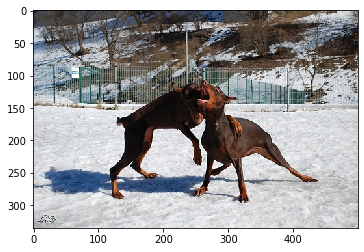

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


Referance Captions: 
The dogs are in the snow in front of a fence .
কুকুরগুলি একটি বেড়ার সামনের দিকে তুষারে রয়েছে।
The dogs play on the snow .
কুকুর বরফে খেলা করে।
Two brown dogs playfully fight in the snow .
দুটি বাদামী কুকুর খেলায় বরফের সাথে লড়াই করে।
Two brown dogs wrestle in the snow .
দুটি বাদামী কুকুর তুষার কুস্তি।
Two dogs playing in the snow .
তুষার খেলছে দুটি কুকুর।
Predicted Caption for Greedy Search : 
একটি বাদামী কুকুর একটি বাদামী কুকুরের সাথে চলছে।
bleu score:  0.26726124191242434
Predicted Caption for Beam Search, k=3: 
A brown dog is running through the snow .
bleu score:  0.33333333333333337
Predicted Caption for Beam Search, k=5: 
A brown dog is running through the snow .
bleu score:  0.33333333333333337
Predicted Caption for Beam Search, k=7: 
A brown dog is running through the snow .
bleu score:  0.33333333333333337


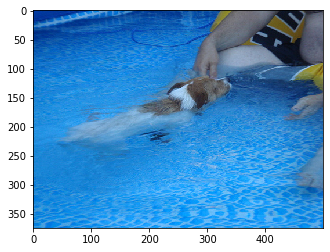

Referance Captions: 
a brown and white dog swimming towards some in the pool
একটি বাদামী এবং সাদা কুকুর পুলের মধ্যে কিছু দিকে সাঁতার কাটছে
A dog in a swimming pool swims toward sombody we cannot see .
একটি সুইমিং পুলের একটি কুকুর সাম্বোডির দিকে সাঁতার কাটছে যা আমরা দেখতে পাই না।
A dog swims in a pool near a person .
একটি কুকুর একটি ব্যক্তির কাছাকাছি একটি পুল সাঁতার কাটা।
Small dog is paddling through the water in a pool .
ছোট কুকুরটি একটি পুলের জলে প্যাড করছে।
The small brown and white dog is in the pool .
ছোট ব্রাউন এবং সাদা কুকুরটি পুলটিতে রয়েছে।
Predicted Caption for Greedy Search : 
A boy is jumping into a pool .
bleu score:  0.42257712736425823
Predicted Caption for Beam Search, k=3: 
A girl in a red shirt is sitting on a pool .
bleu score:  0.39886201760873286
Predicted Caption for Beam Search, k=5: 
A girl in a red shirt is sitting on a pool .
bleu score:  0.39886201760873286
Predicted Caption for Beam Search, k=7: 
A girl in a red shirt is sitting on a pool .
bleu score:  0.39

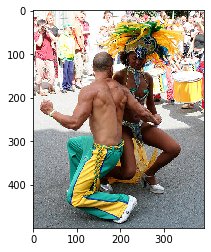

Referance Captions: 
A man and a woman in festive costumes dancing .
উত্সব পোশাক নৃত্যে একজন পুরুষ এবং একজন মহিলা।
A man and a woman with feathers on her head dance .
একজন পুরুষ এবং একজন মহিলা যার মাথায় পালক রয়েছে dance
A man and a woman wearing decorative costumes and dancing in a crowd of onlookers .
এক ব্যক্তি এবং এক মহিলা সজ্জাসংক্রান্ত পোশাক পরা এবং দর্শকদের ভিড়ে নাচছিলেন।
one performer wearing a feathered headdress dancing with another performer in the streets
একজন শিল্পী রাস্তায় অন্য একজন অভিনয়কারীর সাথে নৃত্যের নৃত্যের নৃত্য পরিবেশন করছে
Two people are dancing with drums on the right and a crowd behind them .
দু'জন লোক ডানদিকে withোল নিয়ে নেচেছেন এবং তাদের পিছনে একটি ভিড় করছে।
Predicted Caption for Greedy Search : 
A girl in a red shirt is playing in the grass .
bleu score:  0.27524094128159016
Predicted Caption for Beam Search, k=3: 
A man in a red shirt is sitting in a red shirt in a red shirt .
bleu score:  0.21004201260420147
Predicted Caption for Beam Search, k=5: 


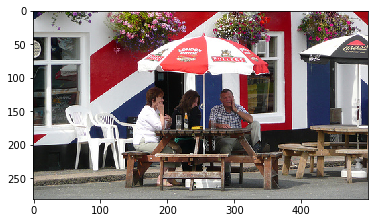

Referance Captions: 
A couple of people sit outdoors at a table with an umbrella and talk .
কয়েকজন লোক ছাতা নিয়ে কথা বলার জন্য বাইরে টেবিলে বসে।
Three people are sitting at an outside picnic bench with an umbrella .
তিন জন ছাতা নিয়ে বাইরের পিকনিক বেঞ্চে বসে আছেন।
Three people sit at an outdoor cafe .
একটি বহিরঙ্গন ক্যাফেতে তিনজন লোক বসে।
Three people sit at an outdoor table in front of a building painted like the Union Jack .
ইউনিয়ন জ্যাকের মতো আঁকা একটি ভবনের সামনে একটি বহিরঙ্গন টেবিলের উপরে তিনজন লোক বসে।
Three people sit at a picnic table outside of a building painted like a union jack .
ইউনিয়ন জ্যাকের মতো আঁকা একটি ভবনের বাইরে তিনজন লোক পিকনিকের টেবিলে বসে।
Predicted Caption for Greedy Search : 
A man is standing in front of a white and white and white and white and white and white and white and white and white and white and white and white and white and white and white and graffiti
bleu score:  0.11020775375559676
Predicted Caption for Beam Search, k=3: 
A group of people are

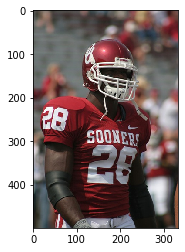

Referance Captions: 
A man is wearing a Sooners red football shirt and helmet .
একজন ব্যক্তি সোনার্স লাল ফুটবল শার্ট এবং হেলমেট পরেছেন।
A Oklahoma Sooners football player wearing his jersey number 28 .
ওকলাহোমা সোনার্স 28 এর জার্সি পরা ফুটবল খেলোয়াড়।
A Sooners football player weas the number 28 and black armbands .
একজন সোনার্স ফুটবল খেলোয়াড় 28 নম্বর এবং কালো আর্মব্যান্ডগুলি ছাড়িয়েছেন।
Guy in red and white football uniform
লাল এবং সাদা ফুটবল ইউনিফর্মের লোক
The American footballer is wearing a red and white strip .
আমেরিকান ফুটবলার একটি লাল এবং সাদা স্ট্রিপ পরেছেন।
Predicted Caption for Greedy Search : 
A football player in the Sooners is preparing to stop the during the football .
bleu score:  0.1951800145897066
Predicted Caption for Beam Search, k=3: 
A football player in a red jersey is challenging the puck .
bleu score:  0.3892494720807615
Predicted Caption for Beam Search, k=5: 
A football player in a red jersey is challenging the puck .
bleu score:  0.3892494720807615
Predic

In [49]:
i=0
for img_id in test_features:
  i+=1
  img=cv2.imread(img_dir+ "/" + img_id)
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  photo=test_features[img_id]
  plt.show()
  reference=[]
  for caps in test_captions[img_id]:
    list_caps=caps.split(" ")
    list_caps=list_caps[1:-1]
    reference.append(list_caps)
  candidate_greedy=greedy_search(photo)
  candidate3=beam_search(photo,3)
  candidate5=beam_search(photo,5)
  candidate7=beam_search(photo,7)
  weights = (0.5, 0.5, 0, 0)
# sentence_bleu([reference1, reference2, reference3], hypothesis1, weights)
# , smoothing_function=SmoothingFunction().method1
  score_greedy = sentence_bleu(reference, candidate_greedy, weights)
  score3 = sentence_bleu(reference, candidate3, weights)
  score5 = sentence_bleu(reference, candidate5, weights)
  score7 = sentence_bleu(reference, candidate7, weights)
  print("Referance Captions: ")
  for cap in reference:
    print(" ".join(cap))
  print("Predicted Caption for Greedy Search : ")
  print(" ".join(candidate_greedy))
  print("bleu score: ",score_greedy)
  print("Predicted Caption for Beam Search, k=3: ")
  print(" ".join(candidate3))
  print("bleu score: ",score3)
  print("Predicted Caption for Beam Search, k=5: ")
  print(" ".join(candidate5))
  print("bleu score: ",score5)
  print("Predicted Caption for Beam Search, k=7: ")
  print(" ".join(candidate7))
  print("bleu score: ",score7)
  if(i==5):
    break

In [50]:
i=0
tot_score_greedy=0
tot_score3=0
tot_score5=0
tot_score7=0
for img_id in tqdm(test_features):
  i+=1
  photo=test_features[img_id]
  reference=[]
  for caps in test_captions[img_id]:
    list_caps=caps.split(" ")
    list_caps=list_caps[1:-1]
    reference.append(list_caps)
  candidate_greedy=greedy_search(photo)
  candidate3=beam_search(photo,3)
  candidate5=beam_search(photo,5)
  candidate7=beam_search(photo,7)
  score_greedy = sentence_bleu(reference, candidate_greedy,smoothing_function=SmoothingFunction().method1)
  score3 = sentence_bleu(reference, candidate3,smoothing_function=SmoothingFunction().method1)
  score5 = sentence_bleu(reference, candidate5,smoothing_function=SmoothingFunction().method1)
  score7 = sentence_bleu(reference, candidate7,smoothing_function=SmoothingFunction().method1)
  tot_score_greedy+=score_greedy
  tot_score3+=score3
  tot_score5+=score5
  tot_score7+=score7
avg_score_greedy=tot_score_greedy/i
avg_score_k3=tot_score3/i
avg_score_k5=tot_score5/i
avg_score_k7=tot_score7/i
avg_score = (tot_score3+tot_score5+tot_score7+tot_score_greedy)/(i*4)
print()
print("Average Bleu score on Greedy search : ",avg_score_greedy)
print("Average Bleu score on Beam search with k=3 : ",avg_score_k3)
print("Average Bleu score on Beam search with k=5 : ",avg_score_k5)
print("Average Bleu score on Beam search with k=7 : ",avg_score_k7)
print("Average score of all average scores of greedy search and beam search k=3,5,7 is "+str(avg_score))

100%|██████████| 1000/1000 [1:24:46<00:00,  4.80s/it]


Average Bleu score on Greedy search :  0.1210495887414192
Average Bleu score on Beam search with k=3 :  0.14283311473814003
Average Bleu score on Beam search with k=5 :  0.14210683608782104
Average Bleu score on Beam search with k=7 :  0.14210683608782104
Average score of all average scores of greedy search and beam search k=3,5,7 is 0.13702409391380035


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Creating an instance of NLGEVAL() Class from <b>nlgeval</b> Library</h3>

In [61]:
n = NLGEval()

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


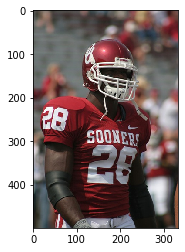

Reference Captions: 
['A man is wearing a Sooners red football shirt and helmet .', 'একজন ব্যক্তি সোনার্স লাল ফুটবল শার্ট এবং হেলমেট পরেছেন।', 'A Oklahoma Sooners football player wearing his jersey number 28 .', 'ওকলাহোমা সোনার্স 28 এর জার্সি পরা ফুটবল খেলোয়াড়।', 'A Sooners football player weas the number 28 and black armbands .', 'একজন সোনার্স ফুটবল খেলোয়াড় 28 নম্বর এবং কালো আর্মব্যান্ডগুলি ছাড়িয়েছেন।', 'Guy in red and white football uniform', 'লাল এবং সাদা ফুটবল ইউনিফর্মের লোক', 'The American footballer is wearing a red and white strip .', 'আমেরিকান ফুটবলার একটি লাল এবং সাদা স্ট্রিপ পরেছেন।']
hypothesis in greedy: 
A football player in the Sooners is preparing to stop the during the football .
['A football player in the Sooners is preparing to stop the during the football .']
hypothesis in beam with k=3
A football player in a red jersey is challenging the puck .
Results of pycocoevalcap : 
<class 'dict'>
{'testlen': 15, 'reflen': 12, 'guess': [15, 14, 13, 12], 'correct': [8, 1,

In [57]:
i=0
for img_id in test_features:
  i+=1
  if(i<5):
    continue
  img=cv2.imread(img_dir+ "/" + img_id)
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  photo=test_features[img_id]
  plt.show()
  reference=[]
  for caps in test_captions[img_id]:
    list_caps=caps.split(" ")
    list_caps=list_caps[1:-1]
    reference.append(list_caps)

  #generating reference captions  
  ref_caps=[]
  print("Reference Captions: ")
  for cap in reference:
    ref_caps.append(" ".join(cap))

  print(ref_caps)

  candidate_greedy = greedy_search(photo)
  candidate3 = beam_search(photo,3)
  candidate5 = beam_search(photo,5)
  candidate7 = beam_search(photo,7)

  #generating hypothesis captions
  hypo_greedy = " ".join(candidate_greedy)
  hypo_3 = " ".join(candidate3)
  hypo_5 = " ".join(candidate5)
  hypo_7 = " ".join(candidate7)

  print("hypothesis in greedy: ")
  print(hypo_greedy)
  print([hypo_greedy])
  print("hypothesis in beam with k=3")
  print(hypo_3)
  scores_greedy = n.compute_individual_metrics(ref_caps, hypo_greedy)
  scores3 = n.compute_individual_metrics(ref_caps, hypo_3)
  scores5 = n.compute_individual_metrics(ref_caps, hypo_5)
  scores7 = n.compute_individual_metrics(ref_caps, hypo_7)

  print("Results of pycocoevalcap : ")
  ref={}
  hyp={}
  ref[0] = ref_caps
  hyp[0] = [hypo_greedy]
  pycoco_score={}
  pycoco_score = calc_scores(ref,hyp)
  # print(type(calc_scores(ref, hyp)))
  print(pycoco_score)
  for key in pycoco_score:
    print(key," : ",pycoco_score[key])



  print("Referance Captions: ")
  print(ref_caps[0])
  print(ref_caps[1])
  print("Predicted Caption for Greedy Search : ")
  print(hypo_greedy)
  print("Bleu_1 score : ",scores_greedy['Bleu_1'])
  print("Bleu_2 score : ",scores_greedy['Bleu_2'])
  print("Bleu_3 score : ",scores_greedy['Bleu_3'])
  print("Bleu_4 score : ",scores_greedy['Bleu_4'])
  print("METEOR score : ",scores_greedy['METEOR'])
  print("ROUGE_L score : ",scores_greedy['ROUGE_L'])
  print("CIDEr score : ",scores_greedy['CIDEr'])
  print("SkipThoughtCS score : ",scores_greedy['SkipThoughtCS'])
  print("EmbeddingAverageCosineSimilarity score : ",scores_greedy['EmbeddingAverageCosineSimilarity'])
  print("VectorExtremaCosineSimilarity score : ",scores_greedy['VectorExtremaCosineSimilarity'])
  print("GreedyMatchingScore score : ",scores_greedy['GreedyMatchingScore'])
  if(i==5):
    break

In [62]:
scores = {}
final_scores = {}
metrics = ['Bleu_1','Bleu_2','Bleu_3','Bleu_4','METEOR','ROUGE_L','CIDEr','SkipThoughtCS','EmbeddingAverageCosineSimilarity','VectorExtremaCosineSimilarity','GreedyMatchingScore']
search_type = ['greedy','beam_k3','beam_k5','beam_k7']
i=0

for img_id in tqdm(test_features):
  i+=1
  photo=test_features[img_id]
  reference=[]
  for caps in test_captions[img_id]:
    list_caps=caps.split(" ")
    list_caps=list_caps[1:-1]
    reference.append(list_caps)

  #generating reference captions  
  ref_caps=[]
  print("Referance Captions: ")
  for cap in reference:
    ref_caps.append(" ".join(cap))


  #generating hypothesis captions
  hypo_greedy = " ".join(candidate_greedy)
  hypo_3 = " ".join(candidate3)
  hypo_5 = " ".join(candidate5)
  hypo_7 = " ".join(candidate7)


  candidate_greedy=greedy_search(photo)
  candidate3=beam_search(photo,3)
  candidate5=beam_search(photo,5)
  candidate7=beam_search(photo,7)
  
  
  
  scores['greedy'] = n.compute_individual_metrics(ref_caps, hypo_greedy)
  scores['beam_k3'] = n.compute_individual_metrics(ref_caps, hypo_3)
  scores['beam_k5'] = n.compute_individual_metrics(ref_caps, hypo_5)
  scores['beam_k7'] = n.compute_individual_metrics(ref_caps, hypo_7)



  

  for s_type in search_type:
    final_scores[s_type] = {}

  for s_type in search_type:
    for metric in metrics:
      final_scores[s_type][metric] = 0.0


  for s_type in search_type:
    for metric in metrics:
      final_scores[s_type][metric] += scores[s_type][metric]
  
  if(i==5):
    break


for s_type in search_type:
  print()
  print()
  print(s_type, " : ")
  for metric in metrics:
    print(metric,"  :  ",final_scores[s_type][metric]/i)






  0%|          | 0/1000 [00:00<?, ?it/s]

Referance Captions: 







  0%|          | 1/1000 [00:46<12:56:57, 46.66s/it]

Referance Captions: 







  0%|          | 2/1000 [01:45<13:55:10, 50.21s/it]

Referance Captions: 







  0%|          | 3/1000 [02:48<15:00:17, 54.18s/it]

Referance Captions: 







  0%|          | 4/1000 [03:52<15:46:49, 57.04s/it]

Referance Captions: 


greedy  : 
Bleu_1   :   0.03589743589651546
Bleu_2   :   0.023807595834181773
Bleu_3   :   0.0145240070593049
Bleu_4   :   2.031172052016213e-06
METEOR   :   0.019066282935636114
ROUGE_L   :   0.04372759856630824
CIDEr   :   0.0
SkipThoughtCS   :   0.07981201410293579
EmbeddingAverageCosineSimilarity   :   0.16818
VectorExtremaCosineSimilarity   :   0.0936032
GreedyMatchingScore   :   0.165684


beam_k3  : 
Bleu_1   :   0.06666666665555557
Bleu_2   :   1.1009637649386964e-09
Bleu_3   :   2.8941787399717213e-12
Bleu_4   :   1.5234944738687403e-13
METEOR   :   0.016807755370599975
ROUGE_L   :   0.05
CIDEr   :   0.0
SkipThoughtCS   :   0.15833687782287598
EmbeddingAverageCosineSimilarity   :   0.1458582
VectorExtremaCosineSimilarity   :   0.0764932
GreedyMatchingScore   :   0.12672540000000002


beam_k5  : 
Bleu_1   :   0.06666666665555557
Bleu_2   :   1.1009637649386964e-09
Bleu_3   :   2.8941787399717213e-12
Bleu_4   :   1.5234944738687403e-13
METEOR   :   0.01680